# Q1. Introduction.

## Problem Statement
*An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

*You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.

*Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.

## Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install termcolor

In [3]:
from termcolor import colored

In [4]:
from IPython.display import display

In [5]:
df_original = pd.read_excel('Customer+Churn+Data.xlsx')

In [6]:
df_original.duplicated().sum()

0

In [7]:
df_original.head(10).T

0             1             2           3  \
AccountID                     20000         20001         20002       20003   
Churn                             1             1             1           1   
Tenure                            4             0             0           0   
City_Tier                       3.0           1.0           1.0         3.0   
CC_Contacted_LY                 6.0           8.0          30.0        15.0   
Payment                  Debit Card           UPI    Debit Card  Debit Card   
Gender                       Female          Male          Male        Male   
Service_Score                   3.0           3.0           2.0         2.0   
Account_user_count                3             4             4           4   
account_segment               Super  Regular Plus  Regular Plus       Super   
CC_Agent_Score                  2.0           3.0           3.0         5.0   
Marital_Status               Single        Single        Single      Single   
rev_per_month                     9             7             6           8   
Complain_ly                     1.0           1.0           1.0         0.0   
rev_growth_yoy                   11            15            14          23   
coupon_used_for_payment           1             0             0           0   
Day_Since_CC_connect              5             0             3           3   
cashback                     159.93         120.9           NaN      134.07   
Login_device                 Mobile        Mobile        Mobile      Mobile   

                                    4             5                 6  \
AccountID                       20004         20005             20006   
Churn                               1             1                 1   
Tenure                              0             0                 2   
City_Tier                         1.0           1.0               3.0   
CC_Contacted_LY                  12.0          22.0              11.0   
Payment                   Credit Card    Debit Card  Cash on Delivery   
Gender                           Male        Female              Male   
Service_Score                     2.0           3.0               2.0   
Account_user_count                  3           NaN                 3   
account_segment          Regular Plus  Regular Plus             Super   
CC_Agent_Score                    5.0           5.0               2.0   
Marital_Status                 Single        Single          Divorced   
rev_per_month                       3             2                 4   
Complain_ly                       0.0           1.0               0.0   
rev_growth_yoy                     11            22                14   
coupon_used_for_payment             1             4                 0   
Day_Since_CC_connect                3             7                 0   
cashback                        129.6        139.19            120.86   
Login_device                   Mobile      Computer            Mobile   

                                    7             8             9  
AccountID                       20007         20008         20009  
Churn                               1             1             1  
Tenure                              0            13             0  
City_Tier                         1.0           3.0           1.0  
CC_Contacted_LY                   6.0           9.0          31.0  
Payment                   Credit Card      E wallet    Debit Card  
Gender                           Male          Male          Male  
Service_Score                     3.0           2.0           2.0  
Account_user_count                  3             4             5  
account_segment          Regular Plus  Regular Plus  Regular Plus  
CC_Agent_Score                    2.0           3.0           3.0  
Marital_Status               Divorced      Divorced        Single  
rev_per_month                       3             2             2  
Complain_ly                       1.0   

In [8]:
df=df_original.drop('AccountID',axis=1)

In [9]:
df.head(10)

Churn Tenure  City_Tier  CC_Contacted_LY           Payment  Gender  \
0      1      4        3.0              6.0        Debit Card  Female   
1      1      0        1.0              8.0               UPI    Male   
2      1      0        1.0             30.0        Debit Card    Male   
3      1      0        3.0             15.0        Debit Card    Male   
4      1      0        1.0             12.0       Credit Card    Male   
5      1      0        1.0             22.0        Debit Card  Female   
6      1      2        3.0             11.0  Cash on Delivery    Male   
7      1      0        1.0              6.0       Credit Card    Male   
8      1     13        3.0              9.0          E wallet    Male   
9      1      0        1.0             31.0        Debit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   
5            3.0                NaN    Regular Plus             5.0   
6            2.0                  3           Super             2.0   
7            3.0                  3    Regular Plus             2.0   
8            2.0                  4    Regular Plus             3.0   
9            2.0                  5    Regular Plus             3.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   
5         Single             2          1.0             22   
6       Divorced             4          0.0             14   
7       Divorced             3          1.0             16   
8       Divorced             2          1.0             14   
9         Single             2          0.0             12   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile  
5                       4                    7   139.19     Computer  
6                       0                    0   120.86       Mobile  
7                       2                    0   122.93       Mobile  
8                       0                    2   126.83       Mobile  
9                       1                    1   122.93       Mobile

In [10]:
df.shape

(11260, 18)

In [11]:
df.columns = [str(x).lower() for x in df.columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    11260 non-null  int64  
 1   tenure                   11158 non-null  object 
 2   city_tier                11148 non-null  float64
 3   cc_contacted_ly          11158 non-null  float64
 4   payment                  11151 non-null  object 
 5   gender                   11152 non-null  object 
 6   service_score            11162 non-null  float64
 7   account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   cc_agent_score           11144 non-null  float64
 10  marital_status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [13]:
df.describe()

churn     city_tier  cc_contacted_ly  service_score  \
count  11260.000000  11148.000000     11158.000000   11162.000000   
mean       0.168384      1.653929        17.867091       2.902526   
std        0.374223      0.915015         8.853269       0.725584   
min        0.000000      1.000000         4.000000       0.000000   
25%        0.000000      1.000000        11.000000       2.000000   
50%        0.000000      1.000000        16.000000       3.000000   
75%        0.000000      3.000000        23.000000       3.000000   
max        1.000000      3.000000       132.000000       5.000000   

       cc_agent_score   complain_ly  
count    11144.000000  10903.000000  
mean         3.066493      0.285334  
std          1.379772      0.451594  
min          1.000000      0.000000  
25%          2.000000      0.000000  
50%          3.000000      0.000000  
75%          4.000000      1.000000  
max          5.000000      1.000000

### List Unique Entries in Each Feature

In [14]:
for i in df.columns:
    print('Feature:',i)
    print('List of Unique Entries:',df[i].unique())
    print('-----------------------------------------------------')

Feature: churn
List of Unique Entries: [1 0]
-----------------------------------------------------
Feature: tenure
List of Unique Entries: [4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
-----------------------------------------------------
Feature: city_tier
List of Unique Entries: [ 3.  1. nan  2.]
-----------------------------------------------------
Feature: cc_contacted_ly
List of Unique Entries: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]
-----------------------------------------------------
Feature: payment
List of Unique Entries: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
-----------------------------------------------------
Feature: gender
List of Unique Entries: ['Female' 'Male' 'F' nan 'M']
-------------

In [15]:
df=df.replace(['#','@','+','$','*','&&&&'],np.NaN)

In [16]:
df.gender=df.gender.replace(['F','M'],['Female','Male'])

In [17]:
df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [18]:
df.account_segment=df.account_segment.replace(['Regular +','Super +'],['Regular Plus','Super Plus'])

In [19]:
df.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [20]:
for i in df.columns:
    print('Feature:',i)
    print('List of Unique Entries:',df[i].unique())
    print('------------------------------------------------------------------')

Feature: churn
List of Unique Entries: [1 0]
------------------------------------------------------------------
Feature: tenure
List of Unique Entries: [ 4.  0.  2. 13. 11. nan  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1.
 23.  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31.
 51. 61.]
------------------------------------------------------------------
Feature: city_tier
List of Unique Entries: [ 3.  1. nan  2.]
------------------------------------------------------------------
Feature: cc_contacted_ly
List of Unique Entries: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]
------------------------------------------------------------------
Feature: payment
List of Unique Entries: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
-----------------------------------------

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    11260 non-null  int64  
 1   tenure                   11042 non-null  float64
 2   city_tier                11148 non-null  float64
 3   cc_contacted_ly          11158 non-null  float64
 4   payment                  11151 non-null  object 
 5   gender                   11152 non-null  object 
 6   service_score            11162 non-null  float64
 7   account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   cc_agent_score           11144 non-null  float64
 10  marital_status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [22]:
pd.DataFrame(df.nunique(),columns=['No.of Unique Entries']).rename_axis(index='Features')

No.of Unique Entries
Features                                     
churn                                       2
tenure                                     37
city_tier                                   3
cc_contacted_ly                            44
payment                                     5
gender                                      2
service_score                               6
account_user_count                          6
account_segment                             5
cc_agent_score                              5
marital_status                              3
rev_per_month                              58
complain_ly                                 2
rev_growth_yoy                             19
coupon_used_for_payment                    17
day_since_cc_connect                       23
cashback                                 5692
login_device                                2

In [23]:
num=['tenure','cc_contacted_ly','rev_per_month','rev_growth_yoy','coupon_used_for_payment','day_since_cc_connect',
     'cashback']
num

['tenure',
 'cc_contacted_ly',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'day_since_cc_connect',
 'cashback']

In [24]:
cat=df.columns.drop(num)
cat=cat.drop('churn')
cat

Index(['city_tier', 'payment', 'gender', 'service_score', 'account_user_count',
       'account_segment', 'cc_agent_score', 'marital_status', 'complain_ly',
       'login_device'],
      dtype='object')

In [25]:
df[num].describe().round(1)

tenure  cc_contacted_ly  rev_per_month  rev_growth_yoy  \
count  11042.0          11158.0        10469.0         11257.0   
mean      11.0             17.9            6.4            16.2   
std       12.9              8.9           11.9             3.8   
min        0.0              4.0            1.0             4.0   
25%        2.0             11.0            3.0            13.0   
50%        9.0             16.0            5.0            15.0   
75%       16.0             23.0            7.0            19.0   
max       99.0            132.0          140.0            28.0   

       coupon_used_for_payment  day_since_cc_connect  cashback  
count                  11257.0               10902.0   10787.0  
mean                       1.8                   4.6     196.2  
std                        2.0                   3.7     178.7  
min                        0.0                   0.0       0.0  
25%                        1.0                   2.0     147.2  
50%                        1.0                   3.0     165.2  
75%                        2.0                   8.0     200.0  
max                       16.0                  47.0    1997.0

In [26]:
#df[num].describe().to_excel('num_describe.xlsx')

In [27]:
df[cat].astype('object').describe().T

count unique           top    freq
city_tier           11148.0    3.0           1.0  7263.0
payment               11151      5    Debit Card    4587
gender                11152      2          Male    6704
service_score       11162.0    6.0           3.0  5490.0
account_user_count  10816.0    6.0           4.0  4569.0
account_segment       11163      5  Regular Plus    4124
cc_agent_score      11144.0    5.0           3.0  3360.0
marital_status        11048      3       Married    5860
complain_ly         10903.0    2.0           0.0  7792.0
login_device          10500      2        Mobile    7482

In [29]:
# cat_describe = df[cat].astype('object').describe().T
# cat_describe.to_excel('cat_describe.xlsx')

In [28]:
df.churn.value_counts(normalize=True)*100

0    83.161634
1    16.838366
Name: churn, dtype: float64

# Q2. EDA and Business Implication

## Univariate Analysis

In [30]:
sns.set(font_scale = 1.5);
sns.set_palette("tab10")

### Continous Variables

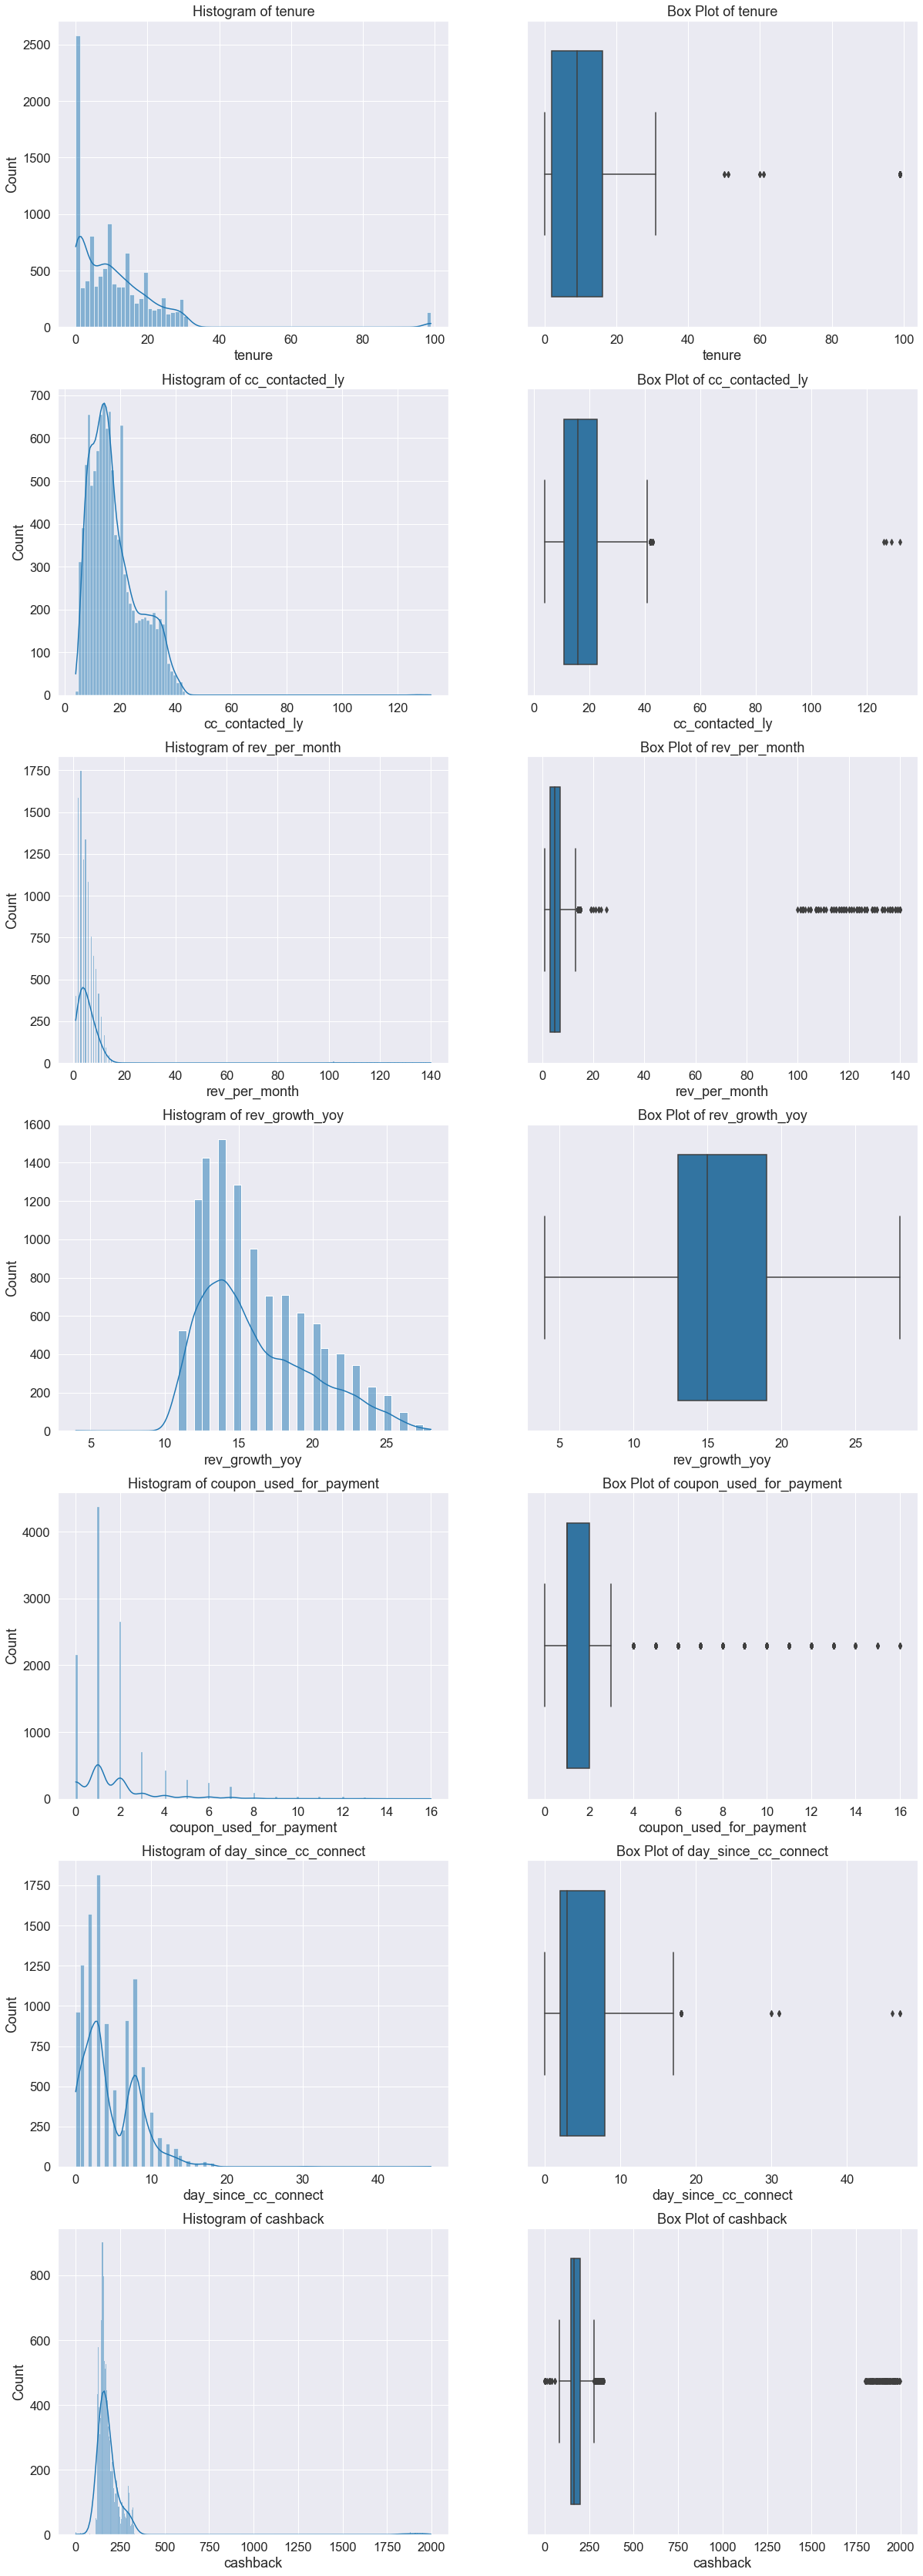

In [31]:
plt.figure(figsize=(20,60))
j=1
for i in num:
    plt.subplot(len(num),2,j)
    sns.histplot(df[i],kde=True);
    plt.title('Histogram of '+i)
    k=j+1
    plt.subplot(len(num),2,k)
    sns.boxplot(df[i]);
    plt.title('Box Plot of '+i)
    j=k+1

### Skewness and Kurtosis

In [32]:
pd.DataFrame([df[num].skew(),df[num].kurtosis()],index=['Skewness','kurtosis']).rename_axis(index='Feature').T.round(2)

Feature                  Skewness  kurtosis
tenure                       3.90     23.37
cc_contacted_ly              1.42      8.23
rev_per_month                9.09     86.96
rev_growth_yoy               0.75     -0.22
coupon_used_for_payment      2.58      9.10
day_since_cc_connect         1.27      5.33
cashback                     8.77     81.11

In [34]:
# skew = pd.DataFrame([df[num].skew(),df[num].kurtosis()],index=['Skewness','kurtosis']).rename_axis(index='Feature').T
# skew.to_excel('skew.xlsx')

### Categorical Variables

In [35]:
len(cat)

10

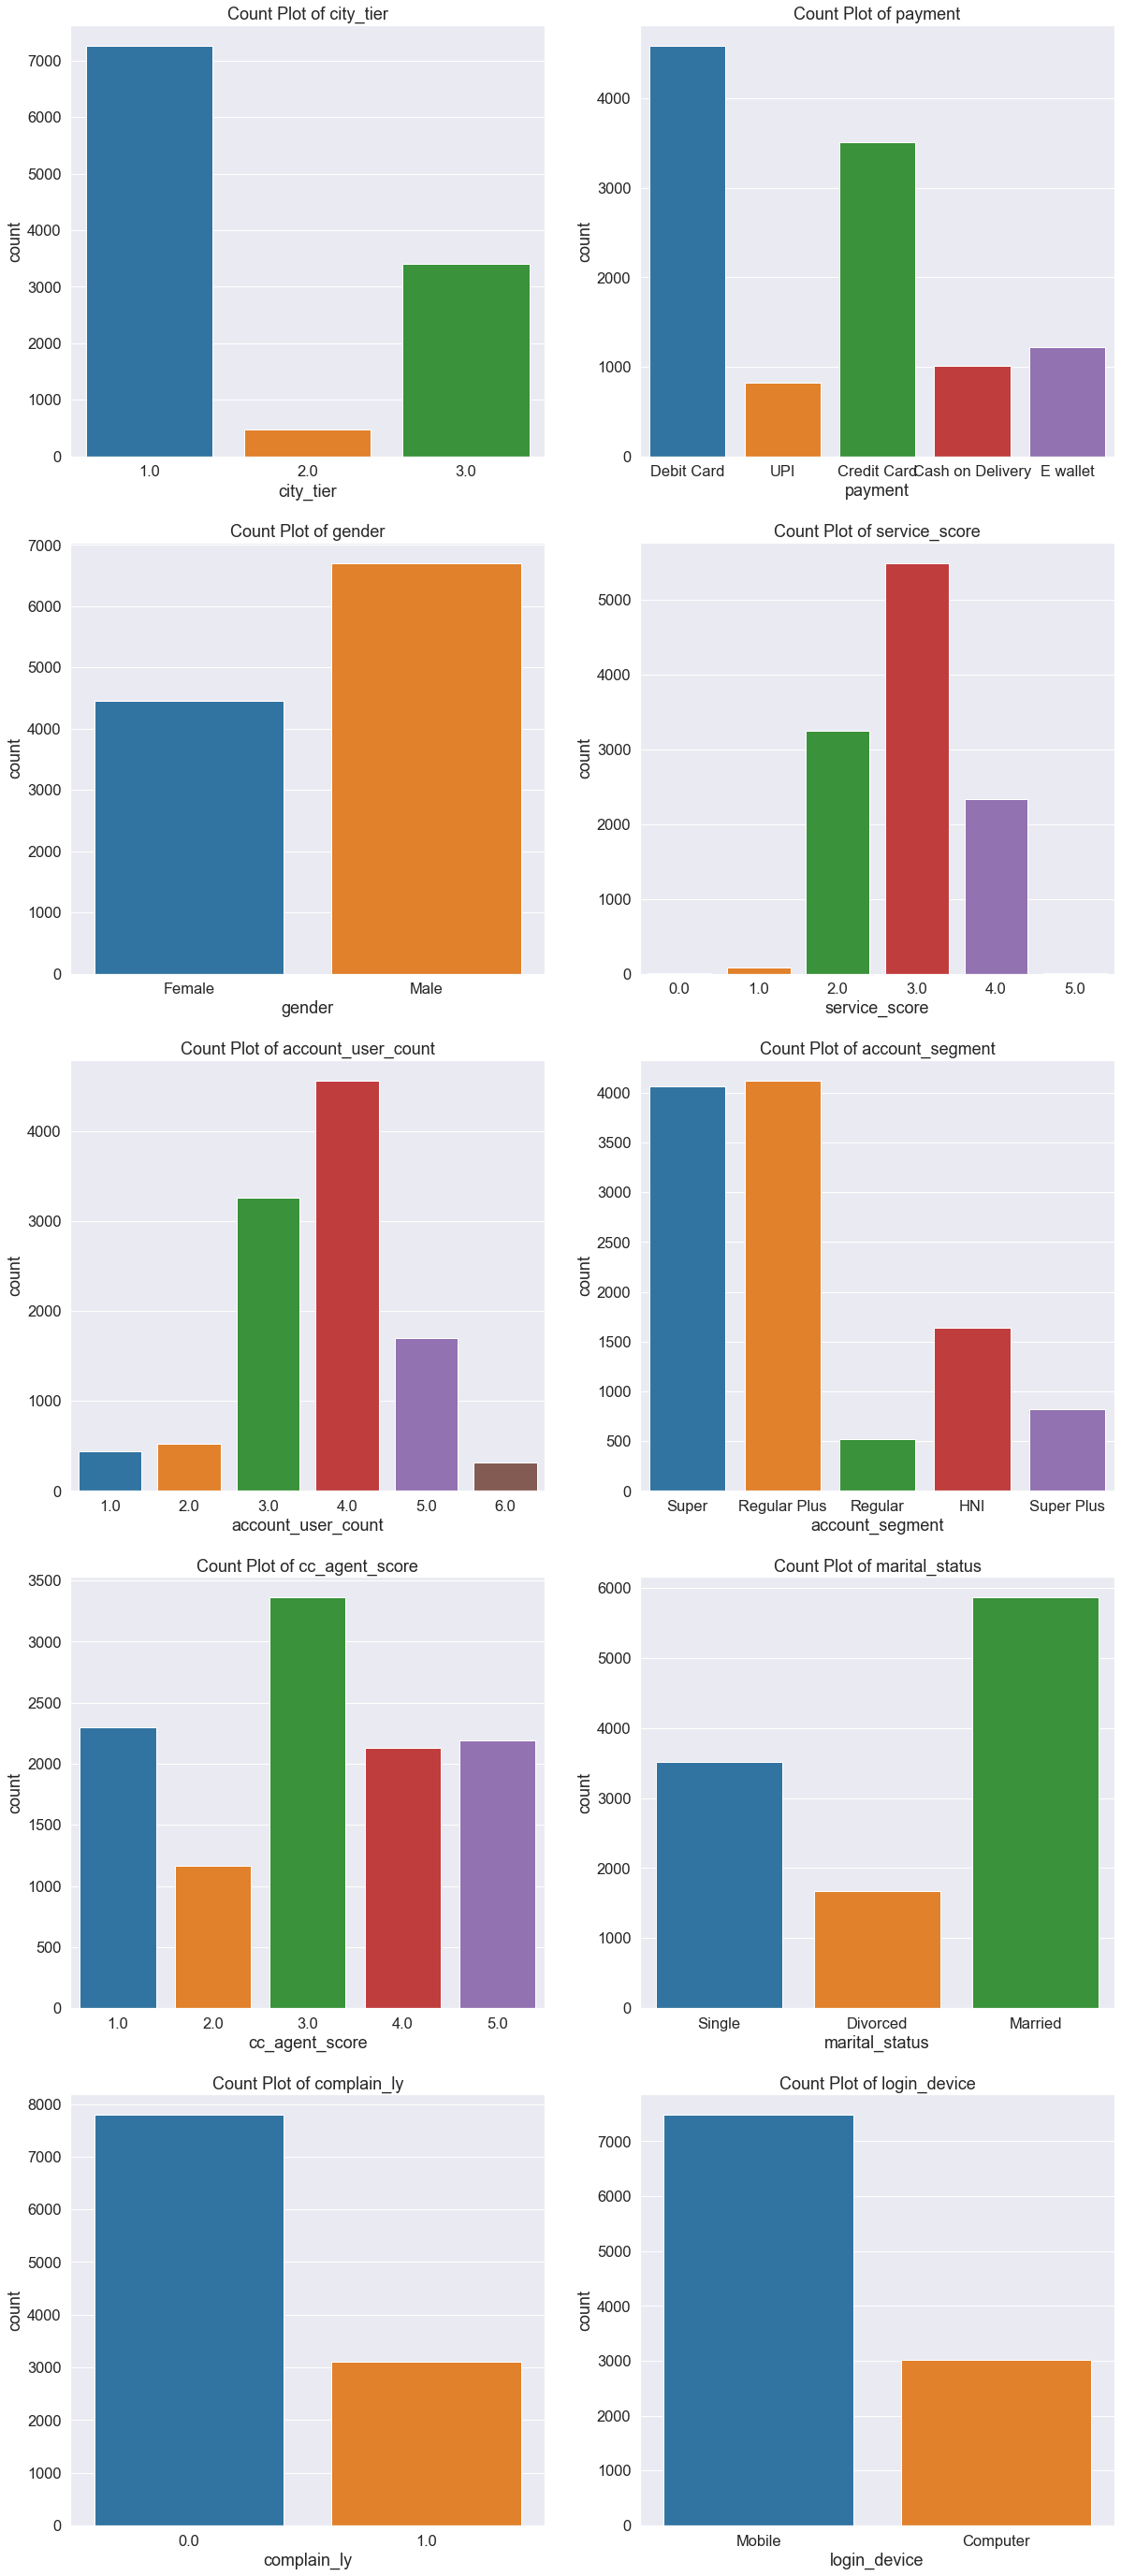

In [36]:
plt.figure(figsize=(20,100))
j=1
for i in cat:
    plt.subplot(10,2,j)
    sns.countplot(df[i]);
    plt.title('Count Plot of '+i)
    j=j+1

In [37]:
for i in cat:
    print('Feature:',i)
    display(pd.DataFrame(df[i].value_counts(normalize=True).round(2))*100)
    print('-------------------------------')

Feature: city_tier


city_tier
1.0       65.0
3.0       31.0
2.0        4.0

-------------------------------
Feature: payment


payment
Debit Card           41.0
Credit Card          31.0
E wallet             11.0
Cash on Delivery      9.0
UPI                   7.0

-------------------------------
Feature: gender


gender
Male      60.0
Female    40.0

-------------------------------
Feature: service_score


service_score
3.0           49.0
2.0           29.0
4.0           21.0
1.0            1.0
0.0            0.0
5.0            0.0

-------------------------------
Feature: account_user_count


account_user_count
4.0                42.0
3.0                30.0
5.0                16.0
2.0                 5.0
1.0                 4.0
6.0                 3.0

-------------------------------
Feature: account_segment


account_segment
Regular Plus             37.0
Super                    36.0
HNI                      15.0
Super Plus                7.0
Regular                   5.0

-------------------------------
Feature: cc_agent_score


cc_agent_score
3.0            30.0
1.0            21.0
5.0            20.0
4.0            19.0
2.0            10.0

-------------------------------
Feature: marital_status


marital_status
Married             53.0
Single              32.0
Divorced            15.0

-------------------------------
Feature: complain_ly


complain_ly
0.0         71.0
1.0         29.0

-------------------------------
Feature: login_device


login_device
Mobile            71.0
Computer          29.0

-------------------------------


## Bivariate analysis

### Count of Categorical Features with Churn as Hue

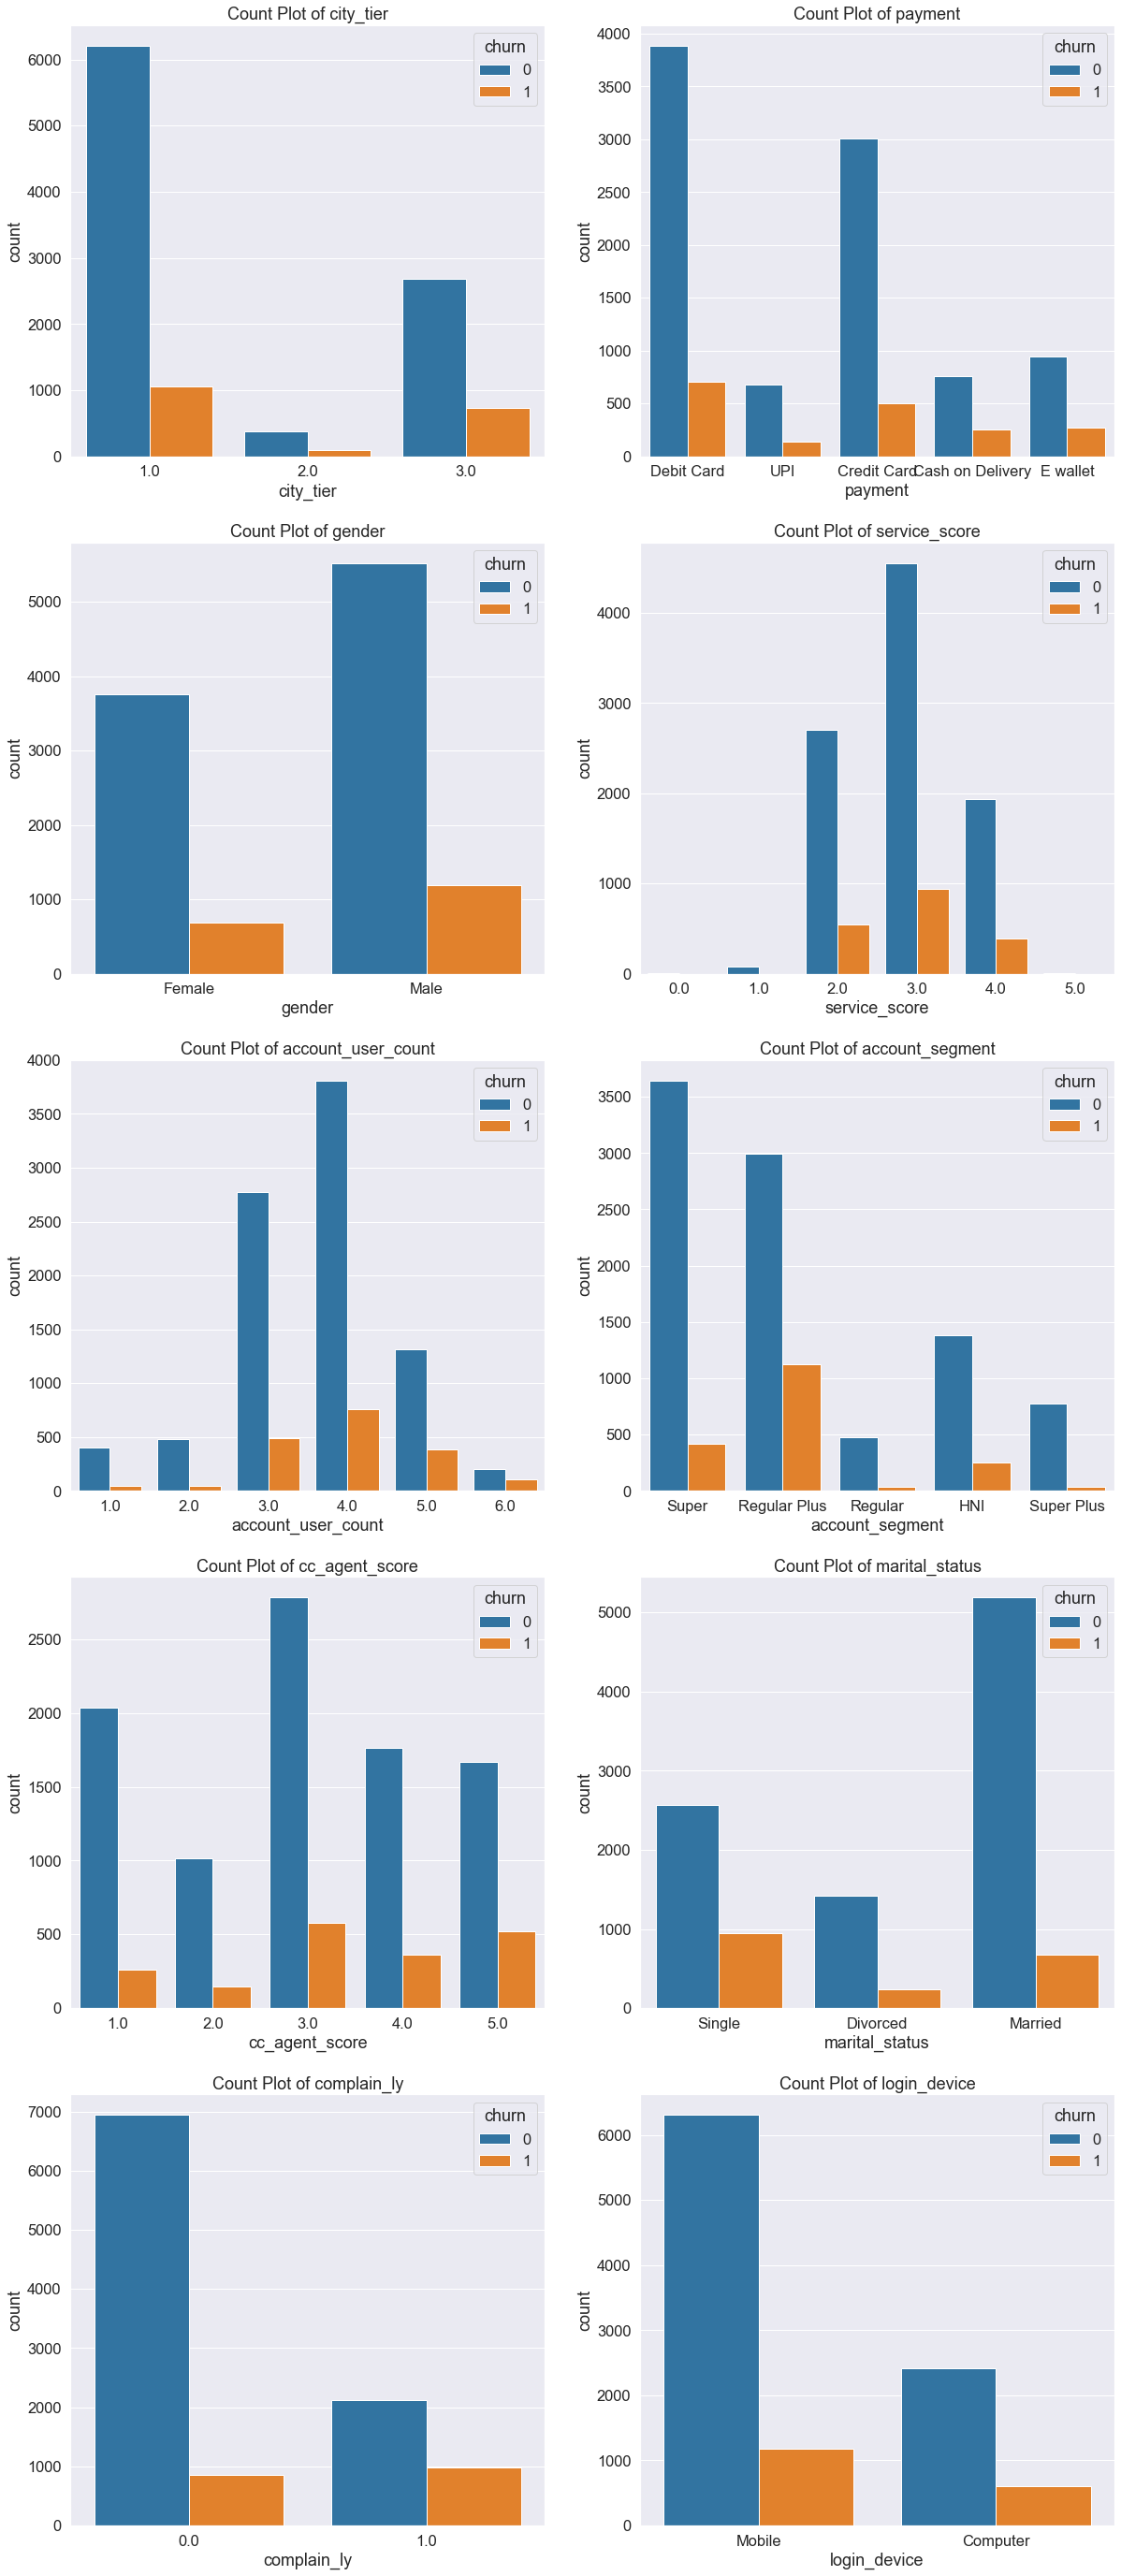

In [38]:
plt.figure(figsize=(20,100))
j=1
for i in cat:
    plt.subplot(10,2,j)
    sns.countplot(df[i],hue=df.churn);
    plt.title('Count Plot of '+i)
    j=j+1

In [39]:
for i in cat:
    print('Churn Percentage in Sub Levels of',i)
    display(pd.crosstab(columns=df[i],index=df.churn,normalize=1).round(3)*100)
    print('-------------------------------')

Churn Percentage in Sub Levels of city_tier


city_tier   1.0   2.0   3.0
churn                      
0          85.5  80.0  78.6
1          14.5  20.0  21.4

-------------------------------
Churn Percentage in Sub Levels of payment


payment  Cash on Delivery  Credit Card  Debit Card  E wallet   UPI
churn                                                             
0                    75.0         85.8        84.7      77.3  82.6
1                    25.0         14.2        15.3      22.7  17.4

-------------------------------
Churn Percentage in Sub Levels of gender


gender  Female  Male
churn               
0         84.5  82.3
1         15.5  17.7

-------------------------------
Churn Percentage in Sub Levels of service_score


service_score    0.0    1.0   2.0   3.0   4.0    5.0
churn                                               
0              100.0  100.0  83.1  83.0  83.1  100.0
1                0.0    0.0  16.9  17.0  16.9    0.0

-------------------------------
Churn Percentage in Sub Levels of account_user_count


account_user_count   1.0   2.0   3.0   4.0   5.0   6.0
churn                                                 
0                   90.1  90.9  85.0  83.4  77.5  65.4
1                    9.9   9.1  15.0  16.6  22.5  34.6

-------------------------------
Churn Percentage in Sub Levels of account_segment


account_segment   HNI  Regular  Regular Plus  Super  Super Plus
churn                                                          
0                84.4     92.3          72.7   89.8        95.1
1                15.6      7.7          27.3   10.2         4.9

-------------------------------
Churn Percentage in Sub Levels of cc_agent_score


cc_agent_score   1.0   2.0   3.0   4.0   5.0
churn                                       
0               88.5  87.4  82.8  82.9  76.2
1               11.5  12.6  17.2  17.1  23.8

-------------------------------
Churn Percentage in Sub Levels of marital_status


marital_status  Divorced  Married  Single
churn                                    
0                   85.4     88.5    73.1
1                   14.6     11.5    26.9

-------------------------------
Churn Percentage in Sub Levels of complain_ly


complain_ly   0.0   1.0
churn                  
0            89.1  68.2
1            10.9  31.8

-------------------------------
Churn Percentage in Sub Levels of login_device


login_device  Computer  Mobile
churn                         
0                 80.2    84.3
1                 19.8    15.7

-------------------------------


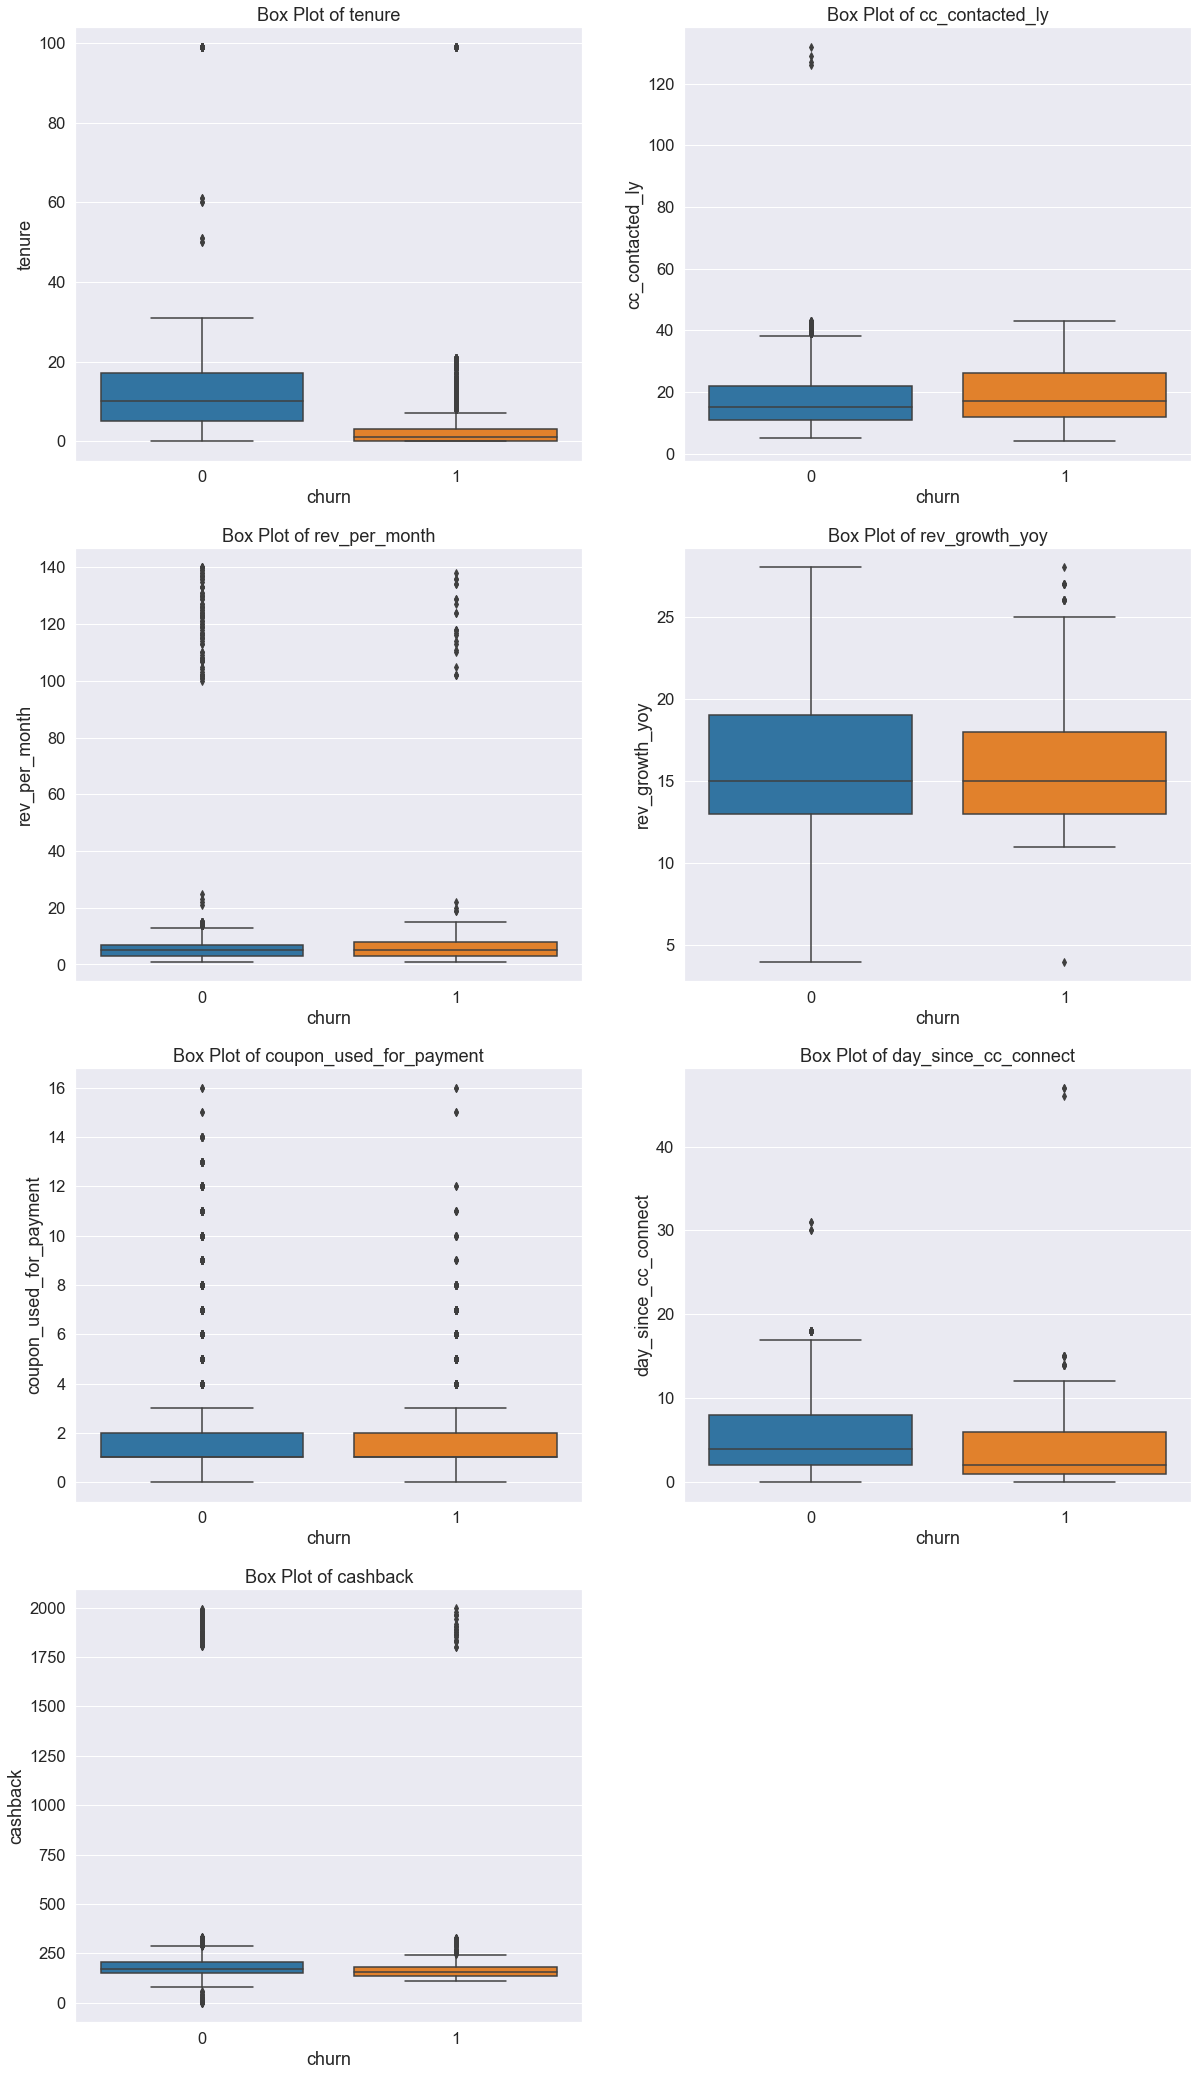

In [40]:
plt.figure(figsize=(20,75));
j=1
for i in num:
    plt.subplot(8,2,j);
    sns.boxplot(x=df.churn, y=df[i]);
    plt.title('Box Plot of '+i);
    j=j+1

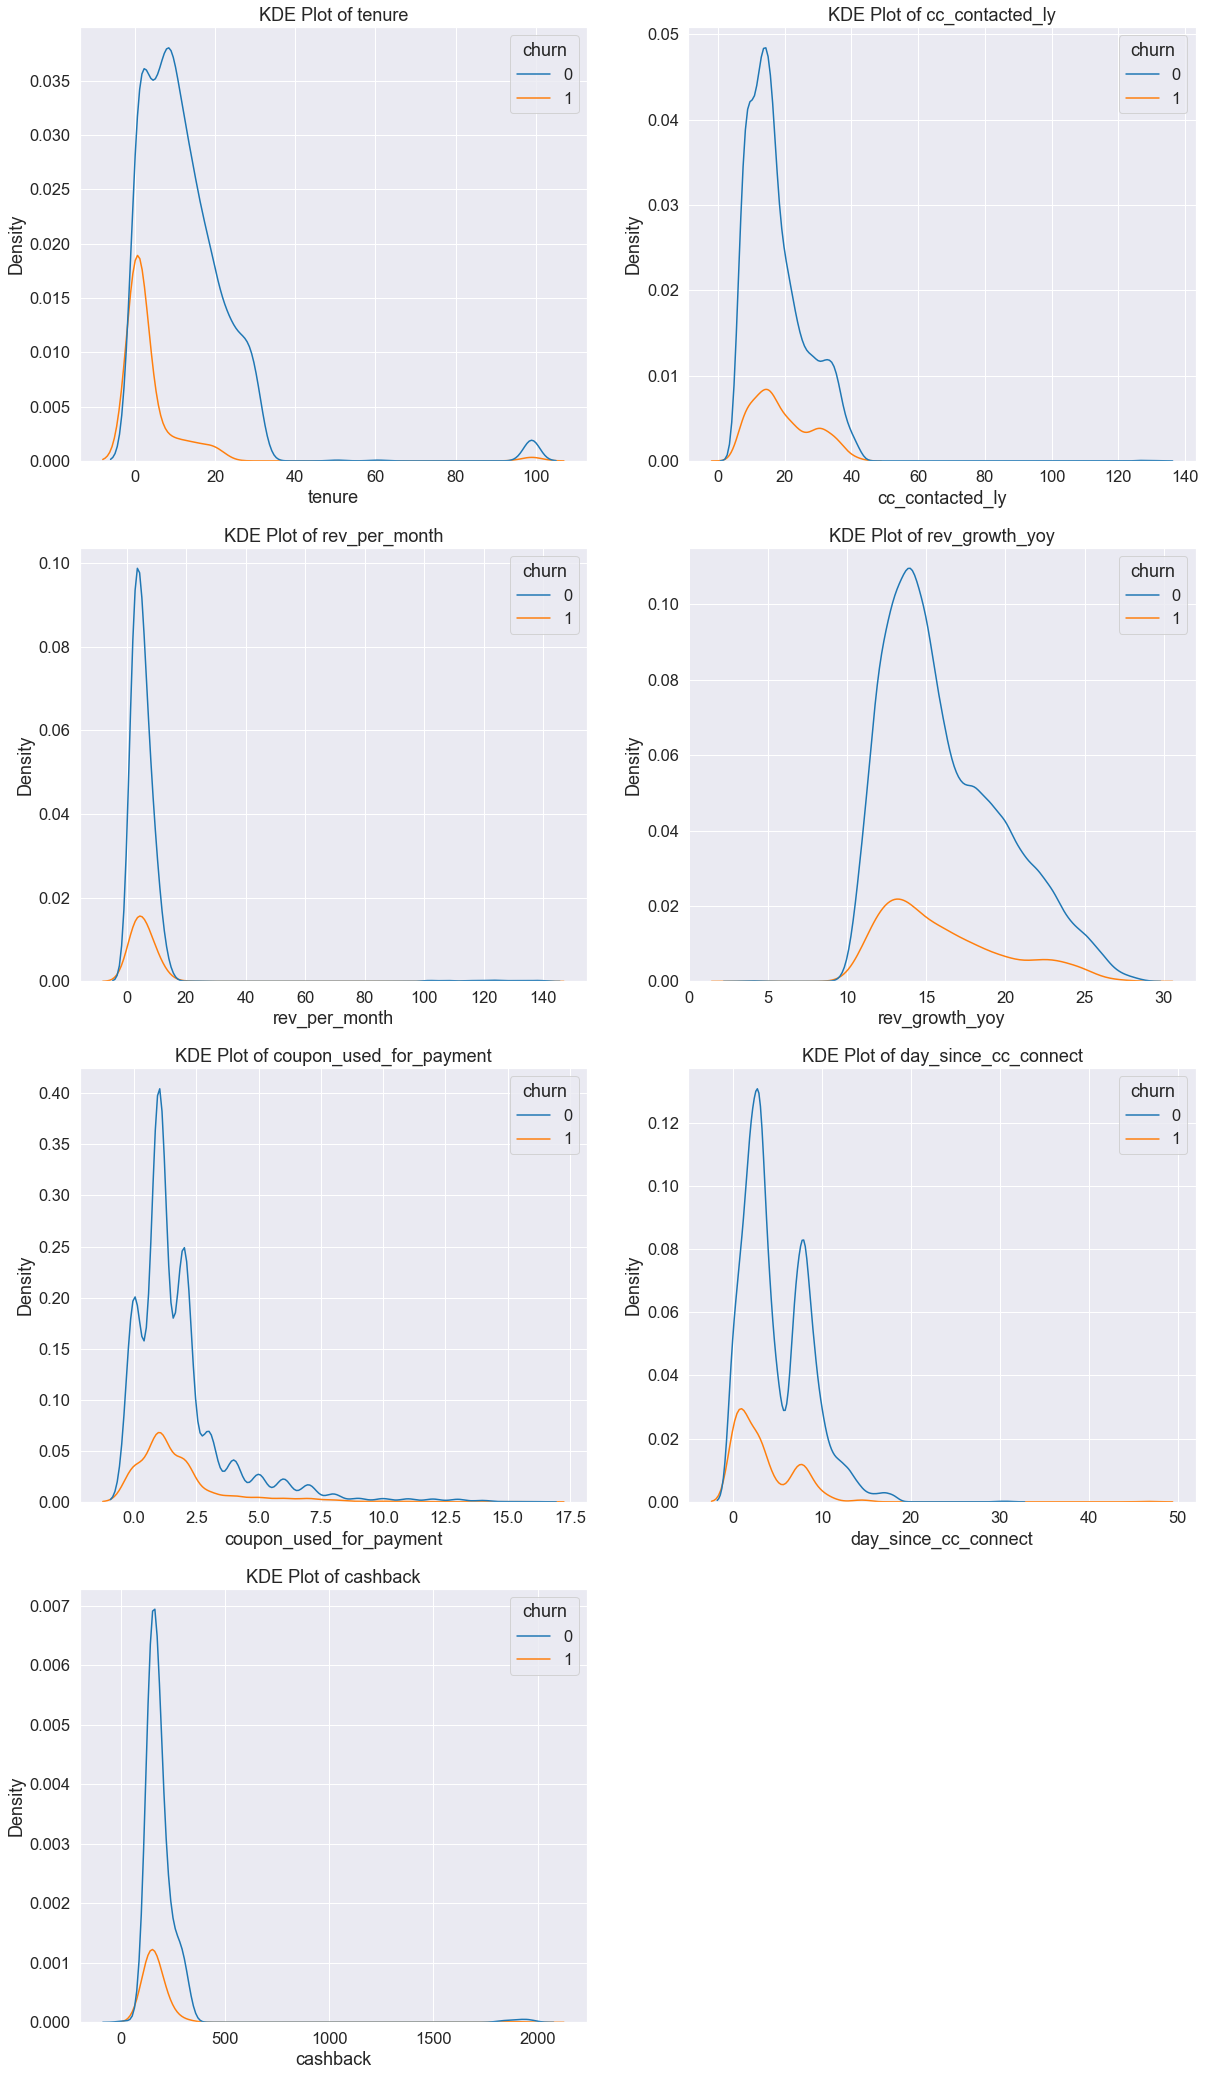

In [41]:
plt.figure(figsize=(20,75));
j=1
for i in num:
    plt.subplot(8,2,j);
    sns.kdeplot(hue=df.churn, x=df[i]);
    plt.title('KDE Plot of '+i);
    j=j+1

In [42]:
df[df.churn==0].describe()['tenure']

count    9194.000000
mean       12.371329
std        12.614520
min         0.000000
25%         5.000000
50%        10.000000
75%        17.000000
max        99.000000
Name: tenure, dtype: float64

In [43]:
df[df.churn==1].describe()['tenure']

count    1848.000000
mean        4.327381
std        12.071994
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        99.000000
Name: tenure, dtype: float64

In [44]:
df[df.churn==0].describe()['day_since_cc_connect']

count    9070.000000
mean        4.879052
std         3.664481
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        31.000000
Name: day_since_cc_connect, dtype: float64

In [45]:
df[df.churn==1].describe()['day_since_cc_connect']

count    1832.000000
mean        3.415939
std         3.620369
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        47.000000
Name: day_since_cc_connect, dtype: float64

In [46]:
num1 = ['tenure',
 'cc_contacted_ly',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'day_since_cc_connect',
 'cashback','churn']

In [47]:
df[num1].groupby('churn').median().round(1).T

churn                        0      1
tenure                    10.0    1.0
cc_contacted_ly           15.0   17.0
rev_per_month              5.0    5.0
rev_growth_yoy            15.0   15.0
coupon_used_for_payment    1.0    1.0
day_since_cc_connect       4.0    2.0
cashback                 168.3  152.7

In [48]:
#df.groupby('churn').median().round(1).T.to_excel('medians.xlsx')

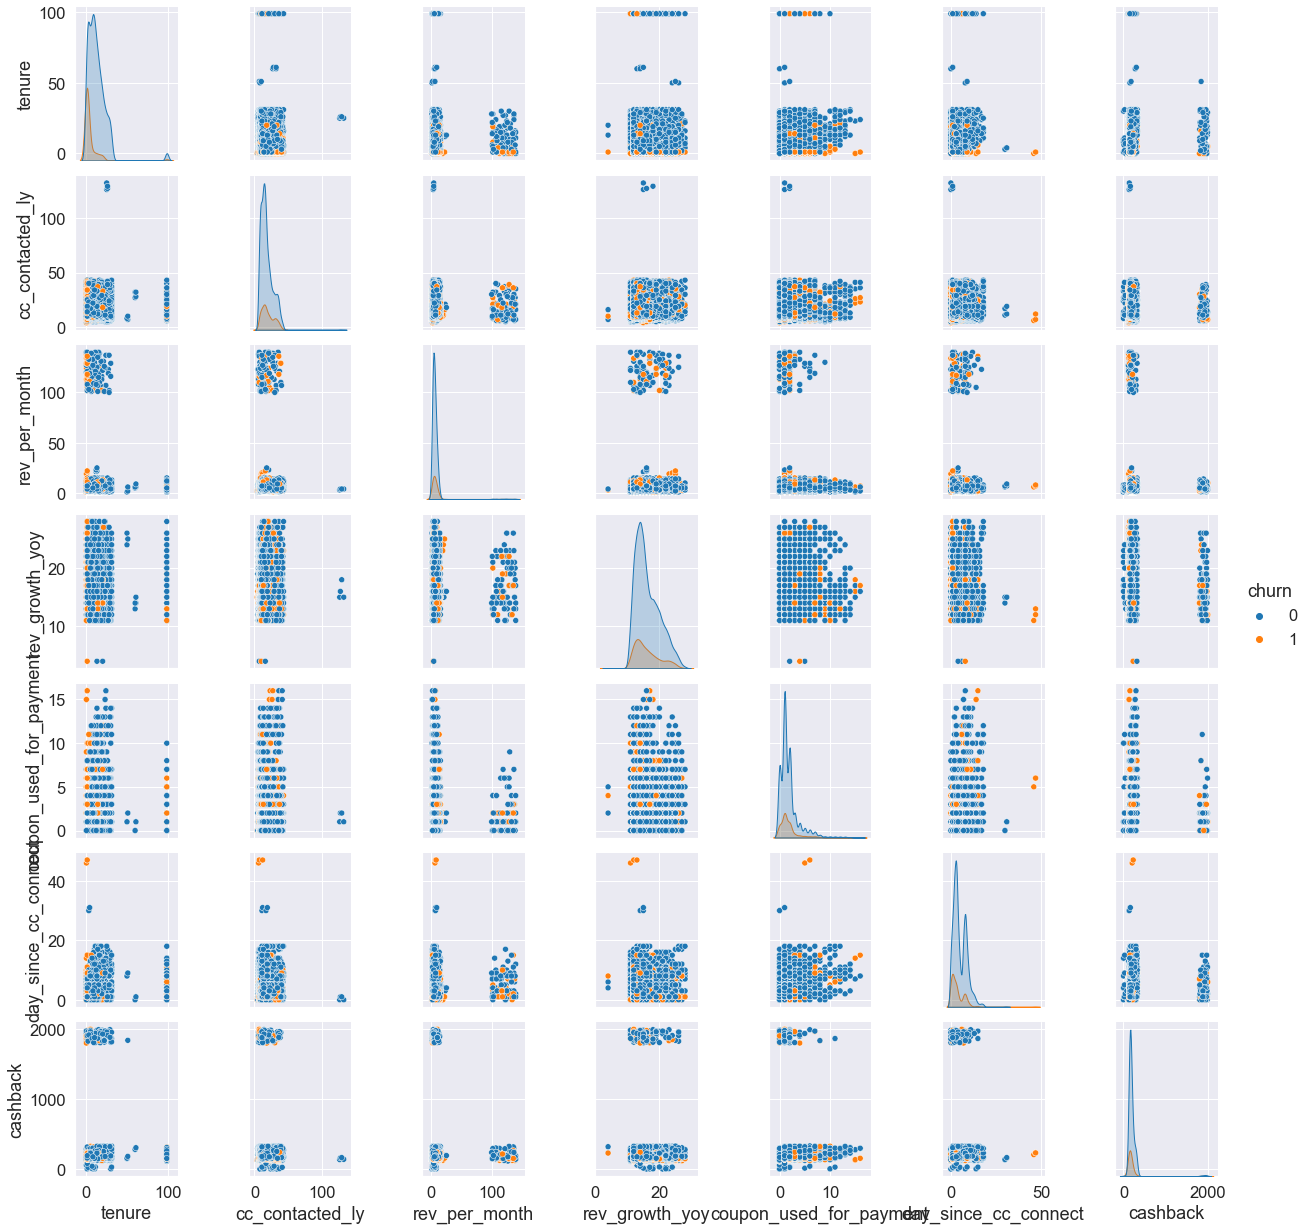

In [49]:
sns.pairplot(df[num1],hue='churn');

In [50]:
df[num].corr().round(2)

tenure  cc_contacted_ly  rev_per_month  \
tenure                     1.00            -0.00           0.03   
cc_contacted_ly           -0.00             1.00           0.02   
rev_per_month              0.03             0.02           1.00   
rev_growth_yoy             0.02             0.07           0.02   
coupon_used_for_payment    0.09             0.00           0.02   
day_since_cc_connect       0.12             0.01          -0.00   
cashback                   0.08             0.00           0.00   

                         rev_growth_yoy  coupon_used_for_payment  \
tenure                             0.02                     0.09   
cc_contacted_ly                    0.07                     0.00   
rev_per_month                      0.02                     0.02   
rev_growth_yoy                     1.00                     0.02   
coupon_used_for_payment            0.02                     1.00   
day_since_cc_connect               0.00                     0.36   
cashback                          -0.00                     0.07   

                         day_since_cc_connect  cashback  
tenure                                   0.12      0.08  
cc_contacted_ly                          0.01      0.00  
rev_per_month                           -0.00      0.00  
rev_growth_yoy                           0.00     -0.00  
coupon_used_for_payment                  0.36      0.07  
day_since_cc_connect                     1.00      0.08  
cashback                                 0.08      1.00

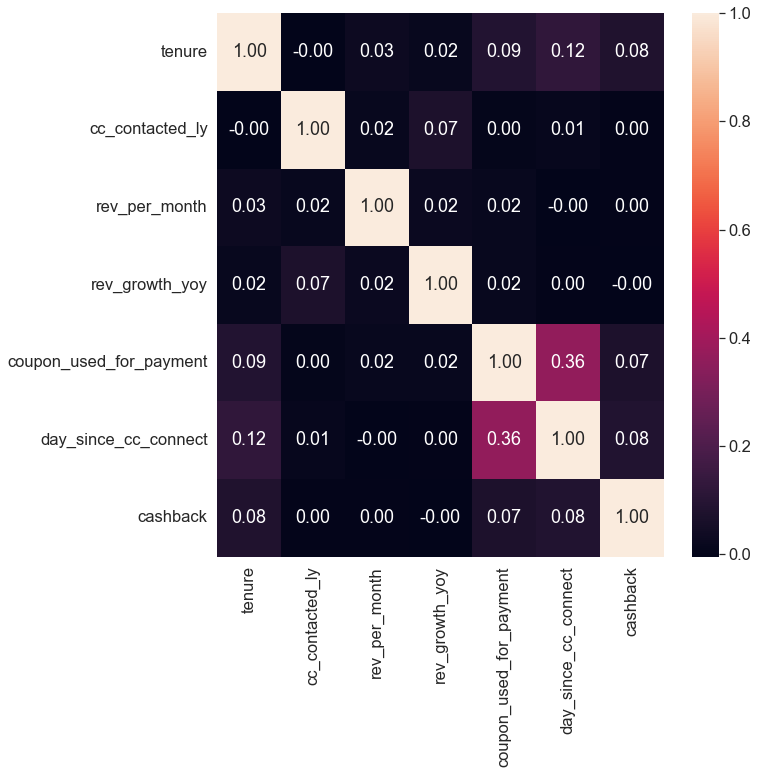

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(),annot=True,fmt='.2f');

## Multivariate Analysis

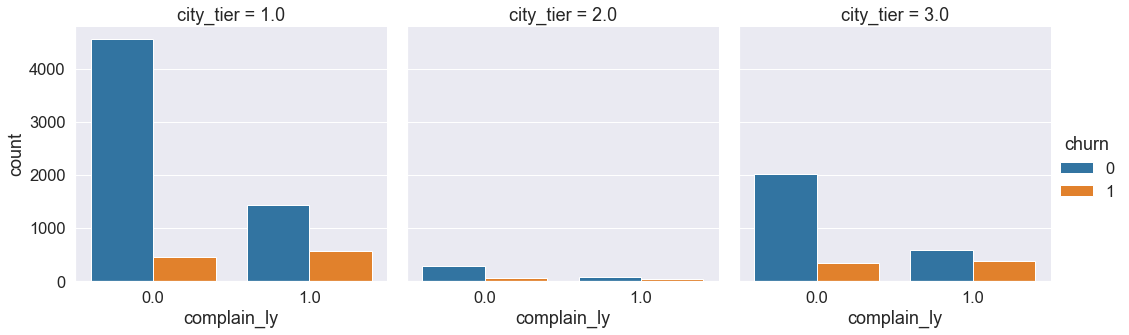

In [52]:
sns.catplot(x='complain_ly',col='city_tier',kind="count",hue='churn',data=df);

In [53]:
pd.crosstab(columns=[df.city_tier,df.complain_ly],index=df.churn,normalize=1).round(2)*100

city_tier     1.0         2.0         3.0      
complain_ly   0.0   1.0   0.0   1.0   0.0   1.0
churn                                          
0            91.0  72.0  85.0  67.0  86.0  61.0
1             9.0  28.0  15.0  33.0  14.0  39.0

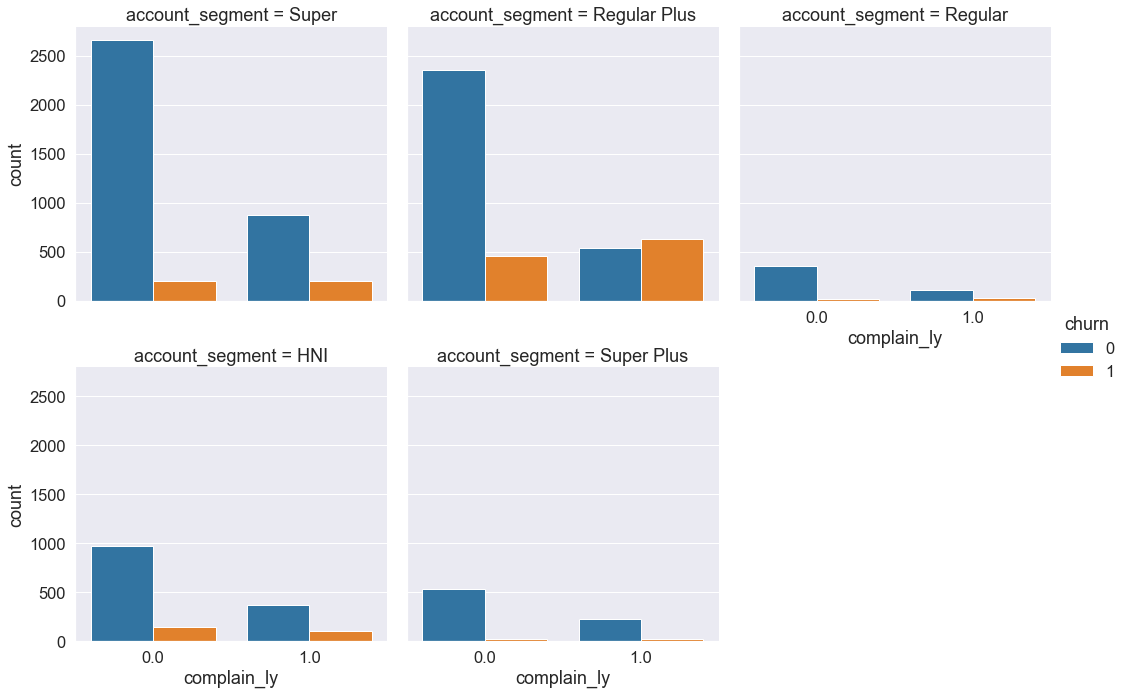

In [54]:
sns.catplot(x='complain_ly',col='account_segment',kind="count",hue='churn',data=df,col_wrap=3);

In [55]:
pd.crosstab(columns=[df.account_segment,df.complain_ly],index=df.churn,normalize=1).round(2)*100

account_segment   HNI       Regular       Regular Plus       Super        \
complain_ly       0.0   1.0     0.0   1.0          0.0   1.0   0.0   1.0   
churn                                                                      
0                87.0  79.0    96.0  81.0         84.0  46.0  93.0  81.0   
1                13.0  21.0     4.0  19.0         16.0  54.0   7.0  19.0   

account_segment Super Plus        
complain_ly            0.0   1.0  
churn                             
0                     97.0  90.0  
1                      3.0  10.0

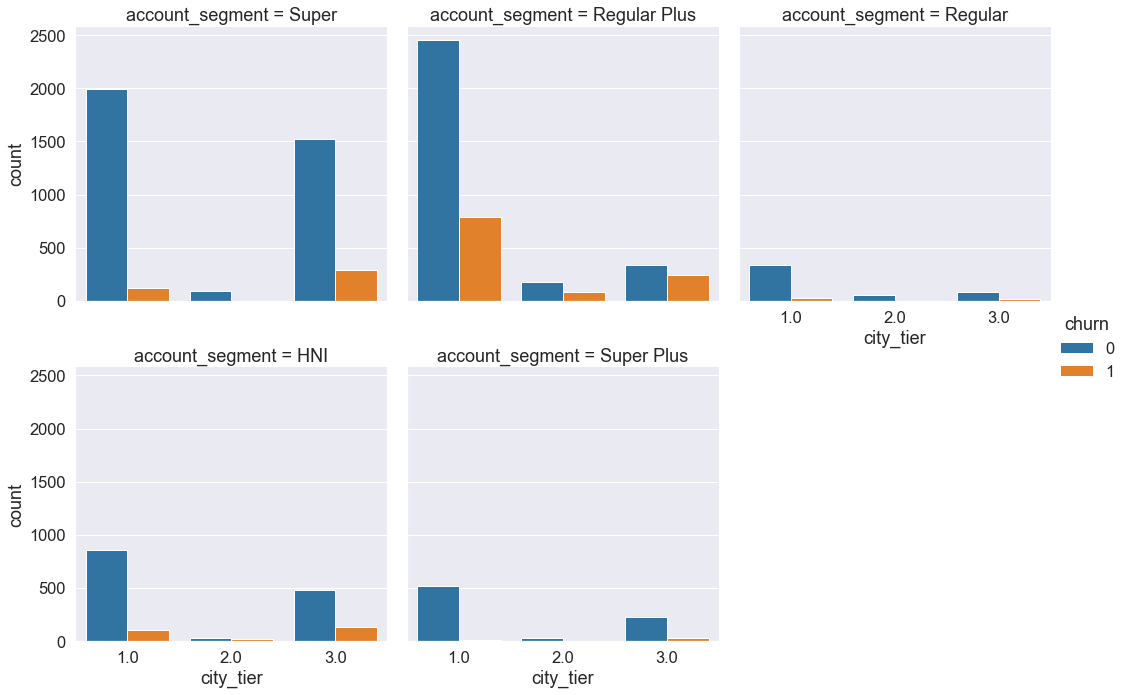

In [56]:
sns.catplot(x='city_tier',col='account_segment',kind="count",hue='churn',data=df,col_wrap=3);

In [57]:
pd.crosstab(columns=[df.account_segment,df.city_tier],index=df.churn,normalize=1).round(3)*100

account_segment   HNI             Regular              Regular Plus        \
city_tier         1.0   2.0   3.0     1.0    2.0   3.0          1.0   2.0   
churn                                                                       
0                89.2  66.0  78.4    93.7  100.0  83.8         75.6  69.0   
1                10.8  34.0  21.6     6.3    0.0  16.2         24.4  31.0   

account_segment       Super              Super Plus               
city_tier         3.0   1.0    2.0   3.0        1.0    2.0   3.0  
churn                                                             
0                57.8  94.4  100.0  83.9       98.5  100.0  87.5  
1                42.2   5.6    0.0  16.1        1.5    0.0  12.5

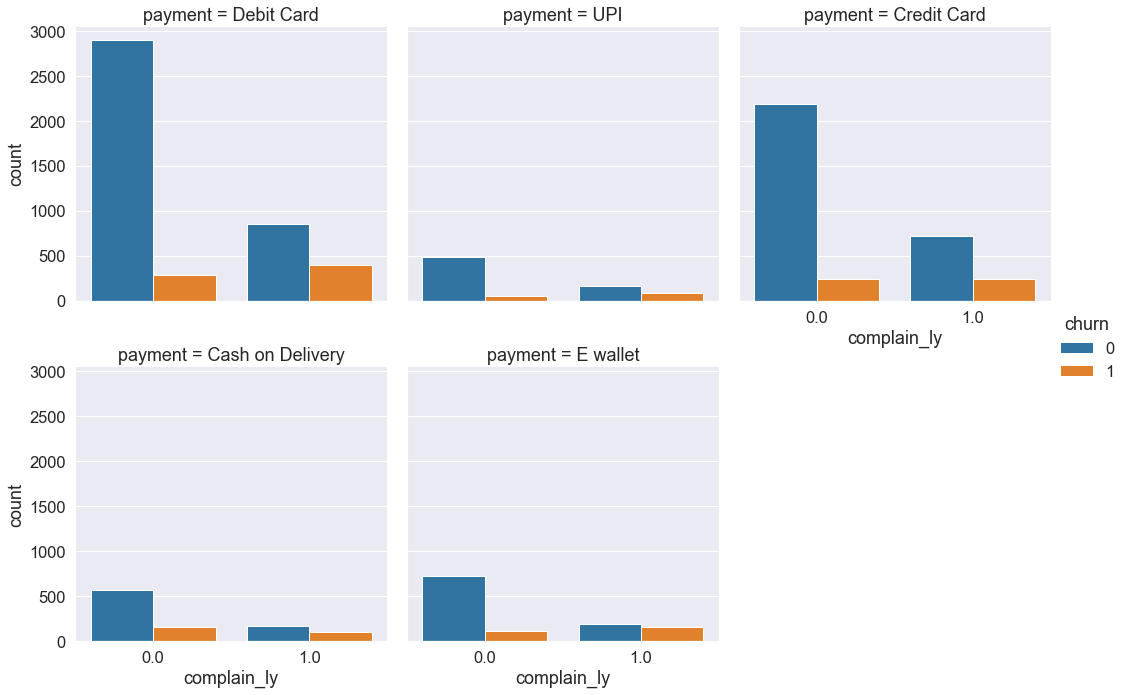

In [58]:
sns.catplot(x='complain_ly',col='payment',kind="count",hue='churn',data=df,col_wrap=3);

In [59]:
pd.crosstab(columns=[df.payment,df.complain_ly],index=df.churn,normalize=1).round(3)*100

payment     Cash on Delivery       Credit Card       Debit Card        \
complain_ly              0.0   1.0         0.0   1.0        0.0   1.0   
churn                                                                   
0                       78.8  63.5        90.2  74.7       91.0  68.4   
1                       21.2  36.5         9.8  25.3        9.0  31.6   

payment     E wallet         UPI        
complain_ly      0.0   1.0   0.0   1.0  
churn                                   
0               87.1  54.3  90.5  66.1  
1               12.9  45.7   9.5  33.9

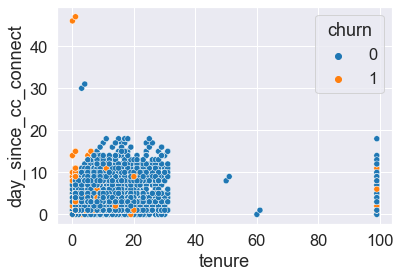

In [60]:
sns.scatterplot(df.tenure,df.day_since_cc_connect,hue=df.churn);

# Q3. Data Cleaning and Pre-processing

## Missing Value treatment

In [61]:
a = pd.DataFrame(df.isnull().sum().sort_values(ascending = False),columns=['Number_of_Null_Values'])
a = a.rename_axis(index='Features')
a['Percentage_of_Null_Values']=a['Number_of_Null_Values']/df.shape[0]*100
a[a.Number_of_Null_Values>0].round(1)

Number_of_Null_Values  Percentage_of_Null_Values
Features                                                                 
rev_per_month                              791                        7.0
login_device                               760                        6.7
cashback                                   473                        4.2
account_user_count                         444                        3.9
day_since_cc_connect                       358                        3.2
complain_ly                                357                        3.2
tenure                                     218                        1.9
marital_status                             212                        1.9
cc_agent_score                             116                        1.0
city_tier                                  112                        1.0
payment                                    109                        1.0
gender                                     108                        1.0
cc_contacted_ly                            102                        0.9
service_score                               98                        0.9
account_segment                             97                        0.9
rev_growth_yoy                               3                        0.0
coupon_used_for_payment                      3                        0.0

In [62]:
# a.to_excel('null.xlsx')

In [63]:
for i in cat:
    df[i]=df[i].fillna(df[i].mode()[0])

In [64]:
for i in num:
    df[i]=df[i].fillna(df[i].median())

In [65]:
a = pd.DataFrame(df.isnull().sum().sort_values(ascending = False),columns=['Number_of_Null_Values'])
a = a.rename_axis(index='Features')
a['Percentage_of_Null_Values']=a['Number_of_Null_Values']/df.shape[0]*100
a.round(1)

Number_of_Null_Values  Percentage_of_Null_Values
Features                                                                 
churn                                        0                        0.0
tenure                                       0                        0.0
cashback                                     0                        0.0
day_since_cc_connect                         0                        0.0
coupon_used_for_payment                      0                        0.0
rev_growth_yoy                               0                        0.0
complain_ly                                  0                        0.0
rev_per_month                                0                        0.0
marital_status                               0                        0.0
cc_agent_score                               0                        0.0
account_segment                              0                        0.0
account_user_count                           0                        0.0
service_score                                0                        0.0
gender                                       0                        0.0
payment                                      0                        0.0
cc_contacted_ly                              0                        0.0
city_tier                                    0                        0.0
login_device                                 0                        0.0

## Outlier Treatment

### Checking Outliers

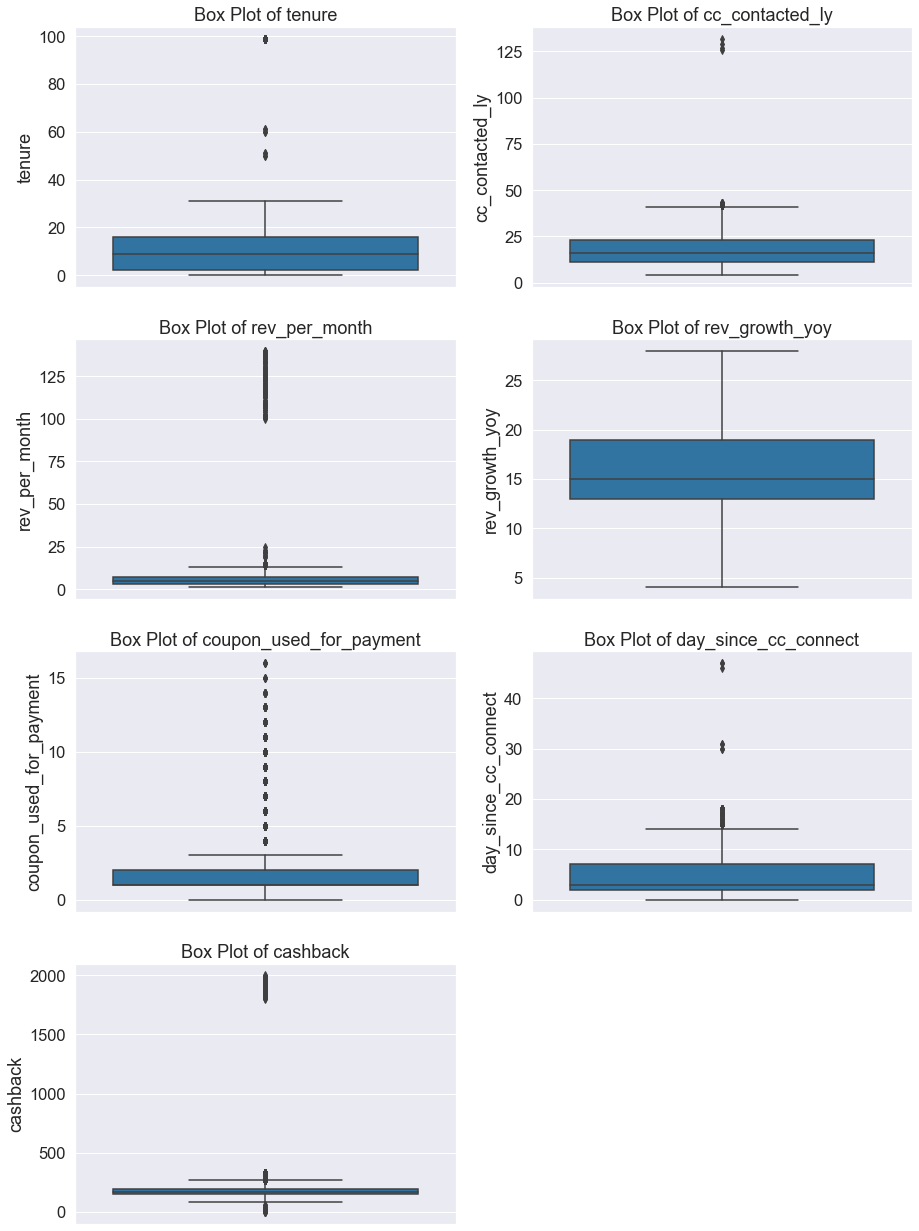

In [66]:
plt.figure(figsize=(15,45))
j=1
for i in num:
    plt.subplot(8,2,j);
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i);
    j=j+1

In [67]:
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
a=pd.DataFrame(df[num][(df[num]<lr)|(df[num]>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
a['Percentage of Outliers']=a['No. of Outliers']/df.shape[0]*100
a = a.rename_axis(index='Feature')
round(a,1)

No. of Outliers  Percentage of Outliers
Feature                                                         
coupon_used_for_payment             1380                    12.3
cashback                             986                     8.8
rev_per_month                        185                     1.6
tenure                               139                     1.2
day_since_cc_connect                 130                     1.2
cc_contacted_ly                       42                     0.4
rev_growth_yoy                         0                     0.0

In [68]:
# a.to_excel('outliers.xlsx')

### Outliers Treatment by Capping and Flooring Technique

In [69]:
for i in df[num].columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

In [70]:
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
a=pd.DataFrame(df[num][(df[num]<lr)|(df[num]>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
a['Percentage of Outliers']=a['No. of Outliers']/df.shape[0]*100
a = a.rename_axis(index='Feature')
round(a,1)

No. of Outliers  Percentage of Outliers
Feature                                                         
tenure                                 0                     0.0
cc_contacted_ly                        0                     0.0
rev_per_month                          0                     0.0
rev_growth_yoy                         0                     0.0
coupon_used_for_payment                0                     0.0
day_since_cc_connect                   0                     0.0
cashback                               0                     0.0

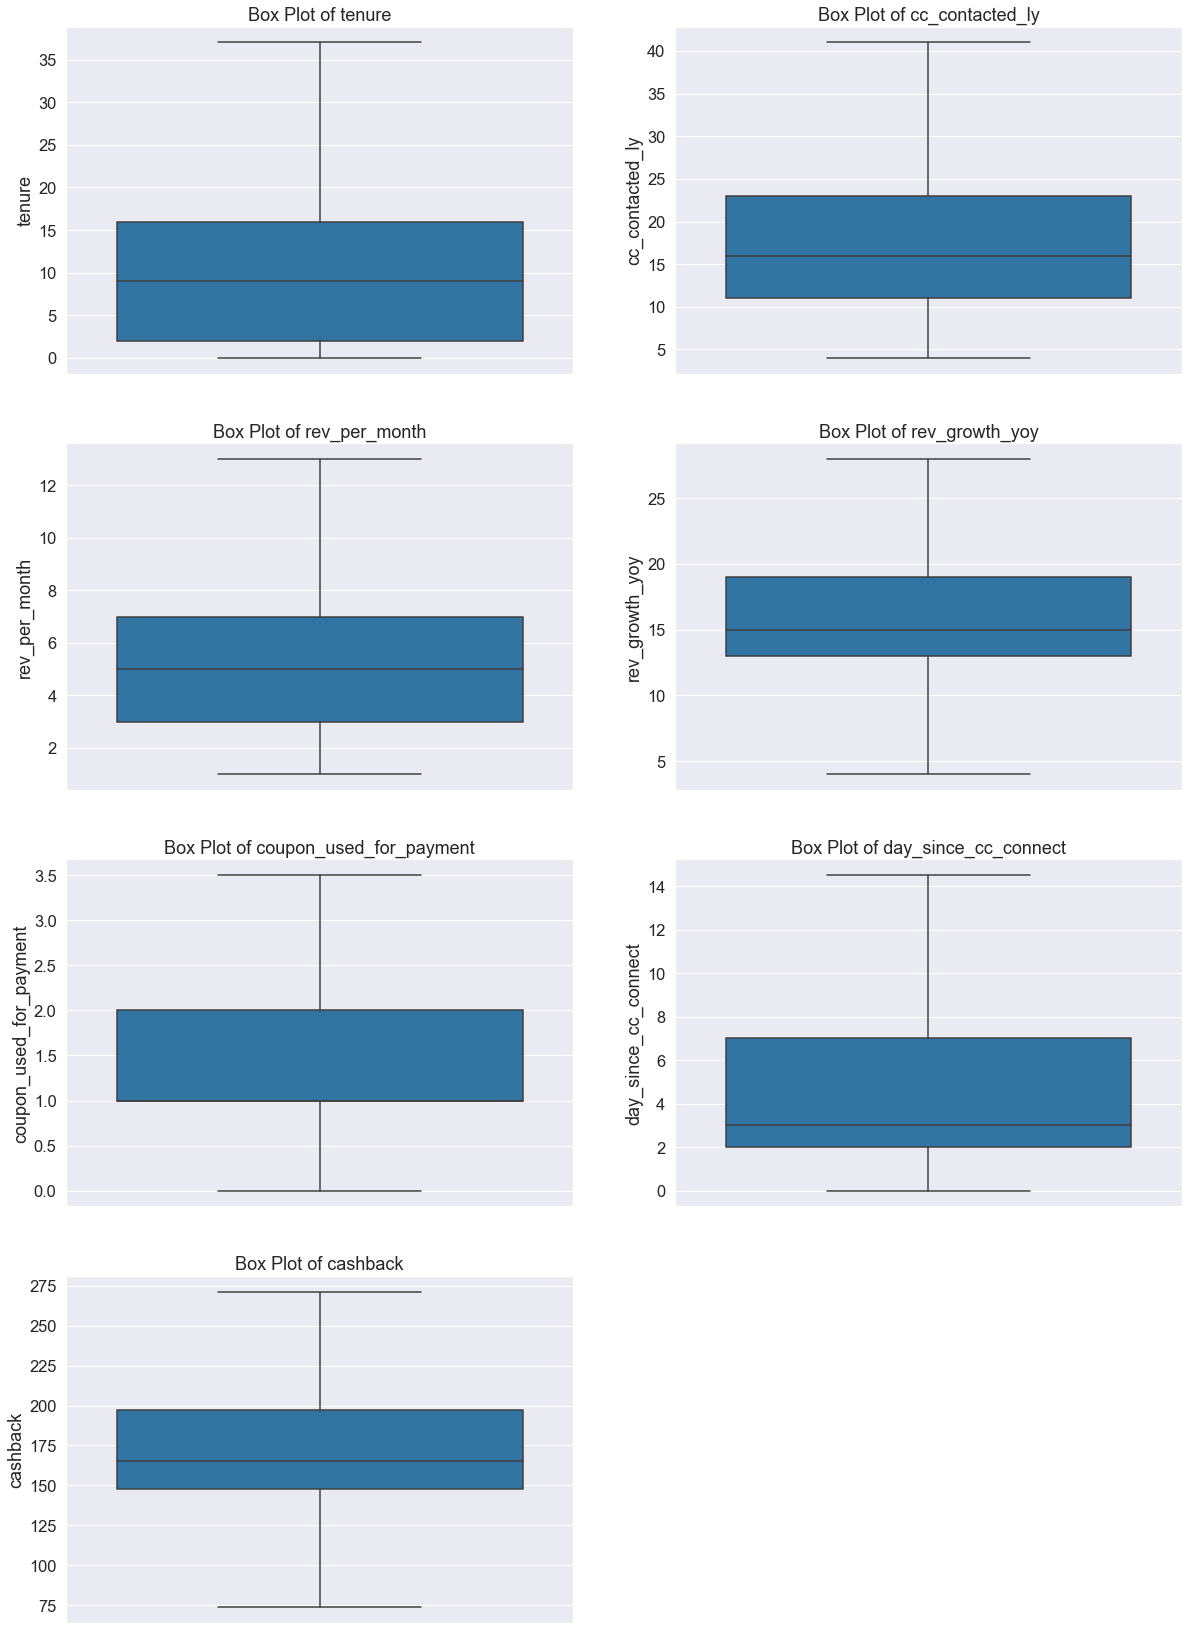

In [71]:
plt.figure(figsize=(20,60))
j=1
for i in num:
    plt.subplot(8,2,j);
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i);
    j=j+1

## Need for variable transformation (if any)

In [72]:
df.sample(10).T

4414          2126        6215          6162  \
churn                           0             0           0             0   
tenure                        3.0           0.0         6.0           2.0   
city_tier                     3.0           1.0         3.0           1.0   
cc_contacted_ly              27.0           6.0        28.0          18.0   
payment                  E wallet   Credit Card  Debit Card   Credit Card   
gender                       Male          Male        Male        Female   
service_score                 3.0           2.0         2.0           3.0   
account_user_count            4.0           4.0         4.0           4.0   
account_segment             Super  Regular Plus  Super Plus  Regular Plus   
cc_agent_score                1.0           5.0         3.0           2.0   
marital_status            Married       Married      Single       Married   
rev_per_month                 4.0           5.0         5.0          10.0   
complain_ly                   0.0           0.0         0.0           0.0   
rev_growth_yoy               15.0          16.0        13.0          15.0   
coupon_used_for_payment       2.0           1.0         3.5           1.0   
day_since_cc_connect          3.0           3.0         0.0           3.0   
cashback                   194.31        139.55      271.44        130.32   
login_device               Mobile        Mobile      Mobile        Mobile   

                               7785        2462      8948          4051  \
churn                             0           0         0             0   
tenure                         19.0         7.0      11.0           1.0   
city_tier                       3.0         1.0       3.0           1.0   
cc_contacted_ly                11.0         7.0      29.0          13.0   
payment                    E wallet  Debit Card  E wallet           UPI   
gender                         Male        Male      Male          Male   
service_score                   2.0         2.0       4.0           4.0   
account_user_count              3.0         3.0       5.0           2.0   
account_segment          Super Plus       Super     Super  Regular Plus   
cc_agent_score                  3.0         1.0       3.0           1.0   
marital_status              Married     Married   Married       Married   
rev_per_month                   6.0        10.0      10.0           2.0   
complain_ly                     0.0         0.0       0.0           0.0   
rev_growth_yoy                 12.0        17.0      20.0          19.0   
coupon_used_for_payment         3.5         0.0       2.0           3.0   
day_since_cc_connect            9.0         1.0       1.0           8.0   
cashback                     271.44      154.84    191.34        150.44   
login_device                 Mobile      Mobile    Mobile      Computer   

                                 6167        8381  
churn                               1           0  
tenure                            0.0        27.0  
city_tier                         3.0         1.0  
cc_contacted_ly                  14.0        23.0  
payment                   Credit Card  Debit Card  
gender                         Female      Female  
service_score                     2.0         3.0  
account_user_count                4.0         3.0  
account_segment          Regular Plus       Super  
cc_agent_score                    3.0         5.0  
marital_status                 Single      Single  
rev_per_month                     6.0         9.0  
complain_ly                       0.0         1.0  
rev_growth_yoy                   13.0        21.0  
coupon_used_for_payment           0.0         0.0  
day_since_cc_connect              2.0         4.0  
cashback                       120.44       146.4  
login_device                   Mobile      Mobile

In [73]:
df.account_segment=df.account_segment.replace(['Regular', 'Regular Plus','Super', 'Super Plus', 'HNI'],
                                             [0,1,2,3,4])

In [74]:
df.iloc[:,[4,5,8,10,17]].sample(10).T

2172         4960              8784         179   \
payment          Debit Card  Credit Card  Cash on Delivery  Credit Card   
gender                 Male         Male            Female         Male   
account_segment           1            1                 4            4   
marital_status      Married      Married            Single      Married   
login_device       Computer     Computer            Mobile       Mobile   

                       2490        5795        5993         537         2289  \
payment          Debit Card  Debit Card  Debit Card  Credit Card  Debit Card   
gender               Female      Female      Female       Female      Female   
account_segment           2           0           2            1           2   
marital_status      Married      Single    Divorced       Single     Married   
login_device         Mobile    Computer      Mobile       Mobile    Computer   

                        9976  
payment          Credit Card  
gender                Female  
account_segment            0  
marital_status       Married  
login_device          Mobile

In [75]:
x=df.drop('churn',axis=1)
y=df.churn

In [76]:
x.sample(10).T

5318        1954         2923        4809   \
tenure                         11.0        16.0         24.0        27.0   
city_tier                       1.0         1.0          3.0         1.0   
cc_contacted_ly                26.0        20.0          7.0        30.0   
payment                  Debit Card  Debit Card  Credit Card  Debit Card   
gender                         Male        Male       Female      Female   
service_score                   3.0         3.0          4.0         4.0   
account_user_count              4.0         3.0          4.0         4.0   
account_segment                   2           3            0           3   
cc_agent_score                  3.0         5.0          2.0         3.0   
marital_status              Married     Married      Married      Single   
rev_per_month                   5.0         7.0          5.0         8.0   
complain_ly                     0.0         0.0          0.0         0.0   
rev_growth_yoy                 18.0        24.0         12.0        19.0   
coupon_used_for_payment         1.0         1.0          2.0         3.5   
day_since_cc_connect            3.0         3.0          7.0         9.0   
cashback                     182.68      271.44       271.44      267.75   
login_device                 Mobile      Mobile       Mobile      Mobile   

                               2197        3840        10984  \
tenure                           2.0         9.0        21.0   
city_tier                        1.0         1.0         3.0   
cc_contacted_ly                 12.0        25.0        12.0   
payment                  Credit Card  Debit Card  Debit Card   
gender                        Female        Male      Female   
service_score                    2.0         3.0         3.0   
account_user_count               4.0         2.0         2.0   
account_segment                    1           2           3   
cc_agent_score                   1.0         5.0         4.0   
marital_status               Married     Married     Married   
rev_per_month                    5.0         3.0        11.0   
complain_ly                      0.0         0.0         0.0   
rev_growth_yoy                  13.0        12.0        17.0   
coupon_used_for_payment          0.0         1.0         2.0   
day_since_cc_connect             8.0        11.0         3.0   
cashback                      131.31      177.08      271.44   
login_device                  Mobile      Mobile      Mobile   

                                    4940         10274       6596   
tenure                                1.0          5.0         6.0  
city_tier                             1.0          3.0         1.0  
cc_contacted_ly                      31.0         17.0        37.0  
payment                  Cash on Delivery  Credit Card  Debit Card  
gender                               Male         Male        Male  
service_score                         4.0          4.0         2.0  
account_user_count                    5.0          2.0         4.0  
account_segment                         4            2           2  
cc_agent_score                        5.0          1.0         4.0  
marital_status                     Single      Married      Single  
rev_per_month                         3.0          7.0         5.0  
complain_ly                           0.0          0.0         0.0  
rev_growth_yoy                       13.0         25.0        14.0  
coupon_used_for_payment               2.0          3.5         0.0  
day_since_cc_connect                 10.0          8.0         2.0  
cashback                           212.22        184.6       144.2  
login_device                     Computer       Mobile      Mobile

In [77]:
y.sample(10)

8092     0
6994     0
10748    0
10486    0
7874     0
10031    0
3778     0
9547     0
1003     0
8719     0
Name: churn, dtype: int64

## For Tree Based Models

In [78]:
xencoded = x.copy()

In [79]:
for i in xencoded.columns:
    if xencoded[i].dtype == 'object': 
        xencoded[i] = pd.Categorical(xencoded[i]).codes

In [80]:
xencoded = xencoded.drop(['service_score','account_user_count'],axis=1)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
xtrain_tree, xtest_tree, ytrain, ytest = train_test_split(xencoded, y, test_size=0.3, random_state=1)

In [83]:
xtrain_tree.head(5).T

7580    5198    1929    3427    6249
tenure                    11.00   22.00   15.00   15.00    0.00
city_tier                  1.00    3.00    1.00    1.00    1.00
cc_contacted_ly           22.00   14.00   14.00   14.00   22.00
payment                    2.00    3.00    2.00    1.00    1.00
gender                     1.00    1.00    1.00    0.00    0.00
account_segment            2.00    2.00    0.00    2.00    2.00
cc_agent_score             5.00    5.00    1.00    3.00    4.00
marital_status             1.00    1.00    1.00    2.00    0.00
rev_per_month              7.00    6.00    2.00    8.00    6.00
complain_ly                0.00    0.00    0.00    0.00    0.00
rev_growth_yoy            15.00   12.00   13.00   15.00   15.00
coupon_used_for_payment    1.00    1.00    3.50    2.00    1.00
day_since_cc_connect       2.00    3.00    9.00    2.00    0.00
cashback                 163.88  179.86  271.44  175.03  149.77
login_device               1.00    1.00    0.00    1.00    1.00

In [84]:
xtest_tree.head(5).T

784    6943    3709    6439    5310
tenure                     0.00    0.0   10.00    0.00    9.00
city_tier                  1.00    3.0    3.00    1.00    1.00
cc_contacted_ly           31.00   22.0   23.00   10.00   25.00
payment                    2.00    3.0    3.00    1.00    2.00
gender                     0.00    1.0    0.00    0.00    1.00
account_segment            1.00    1.0    2.00    1.00    2.00
cc_agent_score             2.00    5.0    5.00    4.00    5.00
marital_status             2.00    1.0    0.00    2.00    1.00
rev_per_month              2.00    5.0    6.00    4.00    3.00
complain_ly                1.00    0.0    0.00    0.00    0.00
rev_growth_yoy            12.00   20.0   14.00   19.00   12.00
coupon_used_for_payment    1.00    1.0    2.00    1.00    2.00
day_since_cc_connect       1.00    0.0    3.00    1.00   11.00
cashback                 129.94  119.9  181.47  120.96  177.08
login_device               1.00    0.0    1.00    1.00    1.00

## For Distance and Weights Based Models

In [85]:
xdummies = pd.get_dummies(x,drop_first=True)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
xtrain_dummies, xtest_dummies = train_test_split(xdummies, test_size=0.3, random_state=1)

In [88]:
xtrain_dummies.head().T

7580    5198    1929    3427    6249
tenure                    11.00   22.00   15.00   15.00    0.00
city_tier                  1.00    3.00    1.00    1.00    1.00
cc_contacted_ly           22.00   14.00   14.00   14.00   22.00
service_score              0.00    4.00    3.00    3.00    3.00
account_user_count         4.00    4.00    3.00    4.00    5.00
account_segment            2.00    2.00    0.00    2.00    2.00
cc_agent_score             5.00    5.00    1.00    3.00    4.00
rev_per_month              7.00    6.00    2.00    8.00    6.00
complain_ly                0.00    0.00    0.00    0.00    0.00
rev_growth_yoy            15.00   12.00   13.00   15.00   15.00
coupon_used_for_payment    1.00    1.00    3.50    2.00    1.00
day_since_cc_connect       2.00    3.00    9.00    2.00    0.00
cashback                 163.88  179.86  271.44  175.03  149.77
payment_Credit Card        0.00    0.00    0.00    1.00    1.00
payment_Debit Card         1.00    0.00    1.00    0.00    0.00
payment_E wallet           0.00    1.00    0.00    0.00    0.00
payment_UPI                0.00    0.00    0.00    0.00    0.00
gender_Male                1.00    1.00    1.00    0.00    0.00
marital_status_Married     1.00    1.00    1.00    0.00    0.00
marital_status_Single      0.00    0.00    0.00    1.00    0.00
login_device_Mobile        1.00    1.00    0.00    1.00    1.00

In [89]:
xtest_dummies.head().T

784    6943    3709    6439    5310
tenure                     0.00    0.0   10.00    0.00    9.00
city_tier                  1.00    3.0    3.00    1.00    1.00
cc_contacted_ly           31.00   22.0   23.00   10.00   25.00
service_score              2.00    2.0    4.00    2.00    3.00
account_user_count         1.00    3.0    5.00    3.00    2.00
account_segment            1.00    1.0    2.00    1.00    2.00
cc_agent_score             2.00    5.0    5.00    4.00    5.00
rev_per_month              2.00    5.0    6.00    4.00    3.00
complain_ly                1.00    0.0    0.00    0.00    0.00
rev_growth_yoy            12.00   20.0   14.00   19.00   12.00
coupon_used_for_payment    1.00    1.0    2.00    1.00    2.00
day_since_cc_connect       1.00    0.0    3.00    1.00   11.00
cashback                 129.94  119.9  181.47  120.96  177.08
payment_Credit Card        0.00    0.0    0.00    1.00    0.00
payment_Debit Card         1.00    0.0    0.00    0.00    1.00
payment_E wallet           0.00    1.0    1.00    0.00    0.00
payment_UPI                0.00    0.0    0.00    0.00    0.00
gender_Male                0.00    1.0    0.00    0.00    1.00
marital_status_Married     0.00    1.0    0.00    0.00    1.00
marital_status_Single      1.00    0.0    0.00    1.00    0.00
login_device_Mobile        1.00    0.0    1.00    1.00    1.00

In [90]:
xtrain_dummies.columns = xtrain_dummies.columns.str.replace(' ','_')

In [91]:
xtest_dummies.columns = xtest_dummies.columns.str.replace(' ','_')

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
ss=StandardScaler()

In [94]:
xtrain_scaled = xtrain_dummies.copy()

In [95]:
xtrain_scaled[num]=ss.fit_transform(xtrain_scaled[num])

In [96]:
xtrain_scaled.head().T

7580      5198      1929      3427      6249
tenure                   0.085906  1.319059  0.534326  0.534326 -1.147247
city_tier                1.000000  3.000000  1.000000  1.000000  1.000000
cc_contacted_ly          0.497497 -0.441786 -0.441786 -0.441786  0.497497
service_score            0.000000  4.000000  3.000000  3.000000  3.000000
account_user_count       4.000000  4.000000  3.000000  4.000000  5.000000
account_segment          2.000000  2.000000  0.000000  2.000000  2.000000
cc_agent_score           5.000000  5.000000  1.000000  3.000000  4.000000
rev_per_month            0.596296  0.249534 -1.137511  0.943057  0.249534
complain_ly              0.000000  0.000000  0.000000  0.000000  0.000000
rev_growth_yoy          -0.317924 -1.124191 -0.855436 -0.317924 -0.317924
coupon_used_for_payment -0.434493 -0.434493  1.843459  0.476688 -0.434493
day_since_cc_connect    -0.723805 -0.436752  1.285565 -0.723805 -1.297911
cashback                -0.303254  0.061574  2.152373 -0.048696 -0.625389
payment_Credit_Card      0.000000  0.000000  0.000000  1.000000  1.000000
payment_Debit_Card       1.000000  0.000000  1.000000  0.000000  0.000000
payment_E_wallet         0.000000  1.000000  0.000000  0.000000  0.000000
payment_UPI              0.000000  0.000000  0.000000  0.000000  0.000000
gender_Male              1.000000  1.000000  1.000000  0.000000  0.000000
marital_status_Married   1.000000  1.000000  1.000000  0.000000  0.000000
marital_status_Single    0.000000  0.000000  0.000000  1.000000  0.000000
login_device_Mobile      1.000000  1.000000  0.000000  1.000000  1.000000

In [97]:
xtest_scaled = xtest_dummies.copy()

In [98]:
xtest_scaled[num]=ss.transform(xtest_scaled[num])

In [99]:
xtest_scaled.head().T

784       6943      3709      6439      5310
tenure                  -1.147247 -1.147247 -0.026199 -1.147247 -0.138303
city_tier                1.000000  3.000000  3.000000  1.000000  1.000000
cc_contacted_ly          1.554191  0.497497  0.614908 -0.911428  0.849728
service_score            2.000000  2.000000  4.000000  2.000000  3.000000
account_user_count       1.000000  3.000000  5.000000  3.000000  2.000000
account_segment          1.000000  1.000000  2.000000  1.000000  2.000000
cc_agent_score           2.000000  5.000000  5.000000  4.000000  5.000000
rev_per_month           -1.137511 -0.097227  0.249534 -0.443988 -0.790750
complain_ly              1.000000  0.000000  0.000000  0.000000  0.000000
rev_growth_yoy          -1.124191  1.025854 -0.586680  0.757099 -1.124191
coupon_used_for_payment -0.434493 -0.434493  0.476688 -0.434493  0.476688
day_since_cc_connect    -1.010858 -1.297911 -0.436752 -1.010858  1.859671
cashback                -1.078114 -1.307330  0.098331 -1.283130 -0.001894
payment_Credit_Card      0.000000  0.000000  0.000000  1.000000  0.000000
payment_Debit_Card       1.000000  0.000000  0.000000  0.000000  1.000000
payment_E_wallet         0.000000  1.000000  1.000000  0.000000  0.000000
payment_UPI              0.000000  0.000000  0.000000  0.000000  0.000000
gender_Male              0.000000  1.000000  0.000000  0.000000  1.000000
marital_status_Married   0.000000  1.000000  0.000000  0.000000  1.000000
marital_status_Single    1.000000  0.000000  0.000000  1.000000  0.000000
login_device_Mobile      1.000000  0.000000  1.000000  1.000000  1.000000

### Distribution of Target Variable Classes in Train and Test Datasets  

In [100]:
y.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: churn, dtype: float64

In [101]:
ytrain.value_counts(normalize=True)

0    0.831769
1    0.168231
Name: churn, dtype: float64

In [102]:
ytest.value_counts(normalize=True)

0    0.831261
1    0.168739
Name: churn, dtype: float64

## Variables removed or added and why (if any)

### Chi-Square Test

In [103]:
from scipy.stats import chi2_contingency

In [104]:
p_values_chi_square=[]
for i in cat:
    chi2, p_value, dof, exp_freq = chi2_contingency(pd.crosstab(index=df[i],columns=df.churn), 
                                                correction = False)
    p_values_chi_square.append(p_value)
results_chi_square = pd.DataFrame(p_values_chi_square,index=cat,columns=['p_values of Chi Square Test']).round(6)
results_chi_square

p_values of Chi Square Test
city_tier                              0.000000
payment                                0.000000
gender                                 0.002006
service_score                          0.002483
account_user_count                     0.000000
account_segment                        0.000000
cc_agent_score                         0.000000
marital_status                         0.000000
complain_ly                            0.000000
login_device                           0.000000

In [105]:
#results_chi_square.to_excel('results_chi_square.xlsx')

### Building Logistic Regression Model in Stats Library

In [106]:
import statsmodels.formula.api as SM

In [107]:
xtrain_scaled.columns

Index(['tenure', 'city_tier', 'cc_contacted_ly', 'service_score',
       'account_user_count', 'account_segment', 'cc_agent_score',
       'rev_per_month', 'complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'day_since_cc_connect', 'cashback',
       'payment_Credit_Card', 'payment_Debit_Card', 'payment_E_wallet',
       'payment_UPI', 'gender_Male', 'marital_status_Married',
       'marital_status_Single', 'login_device_Mobile'],
      dtype='object')

In [108]:
f1 = 'churn ~ tenure + city_tier + cc_contacted_ly + service_score + account_user_count + account_segment + cc_agent_score + rev_per_month + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + cashback + payment_Credit_Card + payment_Debit_Card + payment_E_wallet + payment_UPI + gender_Male + marital_status_Married + marital_status_Single + login_device_Mobile'

In [109]:
df_train_scaled = pd.concat([xtrain_scaled,ytrain],axis=1)

In [110]:
df_train_scaled

tenure  city_tier  cc_contacted_ly  service_score  \
7580   0.085906        1.0         0.497497            0.0   
5198   1.319059        3.0        -0.441786            4.0   
1929   0.534326        1.0        -0.441786            3.0   
3427   0.534326        1.0        -0.441786            3.0   
6249  -1.147247        1.0         0.497497            3.0   
...         ...        ...              ...            ...   
7813  -0.586723        3.0         0.262676            2.0   
10955  0.870640        2.0        -0.911428            3.0   
905   -0.698828        3.0        -0.441786            2.0   
5192  -0.810932        1.0        -1.028838            3.0   
235    2.215898        1.0        -1.381069            2.0   

       account_user_count  account_segment  cc_agent_score  rev_per_month  \
7580                  4.0                2             5.0       0.596296   
5198                  4.0                2             5.0       0.249534   
1929                  3.0                0             1.0      -1.137511   
3427                  4.0                2             3.0       0.943057   
6249                  5.0                2             4.0       0.249534   
...                   ...              ...             ...            ...   
7813                  3.0                3             5.0      -0.097227   
10955                 4.0                2             1.0       1.636580   
905                   3.0                4             2.0      -1.137511   
5192                  5.0                1             5.0      -0.443988   
235                   3.0                2             3.0      -0.790750   

       complain_ly  rev_growth_yoy  ...  cashback  payment_Credit_Card  \
7580           0.0       -0.317924  ... -0.303254                    0   
5198           0.0       -1.124191  ...  0.061574                    0   
1929           0.0       -0.855436  ...  2.152373                    0   
3427           0.0       -0.317924  ... -0.048696                    1   
6249           0.0       -0.317924  ... -0.625389                    1   
...            ...             ...  ...       ...                  ...   
7813           1.0       -0.586680  ...  1.493491                    0   
10955          1.0       -0.586680  ...  0.280060                    0   
905            0.0        0.488343  ...  0.702421                    0   
5192           1.0        2.100877  ... -0.358503                    0   
235            0.0       -1.392947  ... -0.219467                    1   

       payment_Debit_Card  payment_E_wallet  payment_UPI  gender_Male  \
7580                    1                 0            0            1   
5198                    0                 1            0            1   
1929                    1                 0            0            1   
3427                    0                 0            0            0   
6249                    0                 0            0            0   
...                   ...               ...          ...          ...   
7813                    1                 0            0            1   
10955                   0                 0            1            1   
905                     1                 0            0            1   
5192                    1                 0            0            0   
235                     0                 0            0            1   

       marital_status_Married  marital_status_Single  login_device_Mobile  \
7580                        1                      0                    1   
5198                        1                      0                    1   
1929                        1                      0                    0   
3427                        0                      1                    1   
6249                        0                      0                    1   
...                       ...                    ...                  ...   
7813                        0     

In [111]:
model1 = SM.logit(formula = f1, data=df_train_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.304523
         Iterations 8


In [112]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7860
Method:                           MLE   Df Model:                           21
Date:                Sun, 05 Jun 2022   Pseudo R-squ.:                  0.3279
Time:                        21:58:45   Log-Likelihood:                -2400.3
converged:                       True   LL-Null:                       -3571.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.9963      0.309    -12.931      0.000      -4.602      -3.391
tenure                     -1.5404      0.067    -22.890      0.000      -1.672      -1.409
city_tier                   0.2113      0.046      4.560      0.000       0.120       0.302
cc_contacted_ly             0.2285      0.037      6.143      0.000       0.156       0.301
service_score              -0.1205      0.057     -2.099      0.036      -0.233      -0.008
account_user_count          0.3198      0.041      7.813      0.000       0.240       0.400
account_segment            -0.1890      0.048     -3.927      0.000      -0.283      -0.095
cc_agent_score              0.2819      0.028     10.179      0.000       0.228       0.336
rev_per_month               0.3803      0.037     10.154      0.000       0.307       0.454
complain_ly                 1.6788      0.078     21.505      0.000       1.526       1.832
rev_growth_yoy             -0.0700      0.038     -1.835      0.066      -0.145       0.005
coupon_used_for_payment     0.1829      0.044      4.139      0.000       0.096       0.269
day_since_cc_connect       -0.3246      0.049     -6.681      0.000      -0.420      -0.229
cashback                    0.0326      0.062      0.529      0.597      -0.088       0.153
payment_Credit_Card        -0.8945      0.131     -6.851      0.000      -1.150      -0.639
payment_Debit_Card         -0.6955      0.124     -5.590      0.000      -0.939      -0.452
payment_E_wallet           -0.2313      0.164     -1.412      0.158      -0.553       0.090
payment_UPI                -0.8360      0.172     -4.865      0.000      -1.173      -0.499
gender_Male                 0.2808      0.077      3.638      0.000       0.130       0.432
marital_status_Married     -0.3099      0.113     -2.752      0.006      -0.531      -0.089
marital_status_Single       0.6811      0.114      5.988      0.000       0.458       0.904
login_device_Mobile        -0.4136      0.081     -5.086      0.000      -0.573      -0.254
===========================================================================================
"""

### Multicollinearity - VIF

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
ss=StandardScaler()

In [115]:
xscaled = x.copy()

In [116]:
xscaled[num]=ss.fit_transform(xscaled[num])

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [118]:
calc_vif(xscaled[num]).sort_values(by = 'VIF', ascending = False).head().round(1)

variables  VIF
6                 cashback  1.4
5     day_since_cc_connect  1.3
0                   tenure  1.3
4  coupon_used_for_payment  1.2
2            rev_per_month  1.1

## Checking class imbalance in the target variable

In [119]:
df.churn.value_counts(normalize=True).round(3)*100

0    83.2
1    16.8
Name: churn, dtype: float64

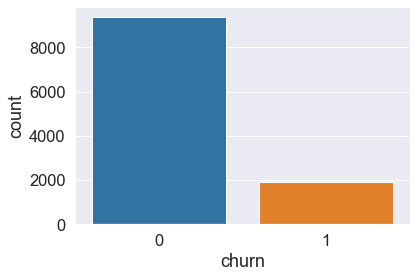

In [120]:
sns.countplot(df.churn);

# Q4. Model building

### Building Various Models - with Default Hyperparameters

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve

Model: DecisionTreeClassifier(random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2732           76
Actual 1           94          476

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.97    0.97      0.97  2808.00
1                  0.86    0.84      0.85   570.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.91    0.90      0.91  3378.00
weighted avg       0.95    0.95      0.95  3378.00

*****************************************************************************************************
Model: RandomForestClassifier(random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2797           11
Actual 1           92          478

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.97    1.00      0.98  2808.00
1                  0.98    0.84      0.90   570.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.97    0.92      0.94  3378.00
weighted avg       0.97    0.97      0.97  3378.00

*****************************************************************************************************
Model: MLPClassifier(random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6505           51
Actual 1          123         1203

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.98    0.99      0.99  6556.00
1                  0.96    0.91      0.93  1326.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.97    0.95      0.96  7882.00
weighted avg       0.98    0.98      0.98  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2748           60
Actual 1          117          453

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.96    0.98      0.97  2808.00
1                  0.88    0.79      0.84   570.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.92    0.89      0.90  3378.00
weighted avg       0.95    0.95      0.95  3378.00

*******************************************************************************************************
Model: LogisticRegression(random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6347          209
Actual 1          726          600

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.90    0.97      0.93  6556.00
1                  0.74    0.45      0.56  1326.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.82    0.71      0.75  7882.00
weighted avg       0.87    0.88      0.87  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2719           89
Actual 1          312          258

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.90    0.97      0.93  2808.00
1                  0.74    0.45      0.56   570.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.82    0.71      0.75  3378.00
weighted avg       0.87    0.88      0.87  3378.00

*******************************************************************************************************
Model: LinearDiscriminantAnalysis() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6349          207
Actual 1          765          561

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.89    0.97      0.93  6556.00
1                  0.73    0.42      0.54  1326.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.81    0.70      0.73  7882.00
weighted avg       0.87    0.88      0.86  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2715           93
Actual 1          320          250

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.89    0.97      0.93  2808.00
1                  0.73    0.44      0.55   570.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.81    0.70      0.74  3378.00
weighted avg       0.87    0.88      0.86  3378.00

*******************************************************************************************************
Model: GaussianNB() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6090          466
Actual 1          595          731

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.91    0.93      0.92  6556.00
1                  0.61    0.55      0.58  1326.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.76    0.74      0.75  7882.00
weighted avg       0.86    0.87      0.86  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2598          210
Actual 1          269          301

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.91    0.93      0.92  2808.00
1                  0.59    0.53      0.56   570.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.75    0.73      0.74  3378.00
weighted avg       0.85    0.86      0.86  3378.00

*****************************************************************************************************
Model: KNeighborsClassifier() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6515           41
Actual 1          119         1207

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.98    0.99      0.99  6556.00
1                  0.97    0.91      0.94  1326.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.97    0.95      0.96  7882.00
weighted avg       0.98    0.98      0.98  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2772           36
Actual 1           97          473

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.97    0.99      0.98  2808.00
1                  0.93    0.83      0.88   570.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.95    0.91      0.93  3378.00
weighted avg       0.96    0.96      0.96  3378.00

*******************************************************************************************************
Model: BaggingClassifier(random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6553            3
Actual 1           17         1309

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0    1.00      1.00   6556.0
1                   1.0    0.99      0.99   1326.0
accuracy            1.0    1.00      1.00      1.0
macro avg           1.0    0.99      1.00   7882.0
weighted avg        1.0    1.00      1.00   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2779           29
Actual 1          113          457

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.96    0.99      0.98  2808.00
1                  0.94    0.80      0.87   570.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.95    0.90      0.92  3378.00
weighted avg       0.96    0.96      0.96  3378.00

*****************************************************************************************************
Model: AdaBoostClassifier(random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6314          242
Actual 1          572          754

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.92    0.96      0.94   6556.0
1                  0.76    0.57      0.65   1326.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.84    0.77      0.79   7882.0
weighted avg       0.89    0.90      0.89   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2709           99
Actual 1          248          322

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.92    0.96      0.94   2808.0
1                  0.76    0.56      0.65    570.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.84    0.76      0.79   3378.0
weighted avg       0.89    0.90      0.89   3378.0

*****************************************************************************************************
Model: GradientBoostingClassifier(random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6385          171
Actual 1          482          844

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.93    0.97      0.95  6556.00
1                  0.83    0.64      0.72  1326.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.88    0.81      0.84  7882.00
weighted avg       0.91    0.92      0.91  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2739           69
Actual 1          225          345

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.92    0.98      0.95  2808.00
1                  0.83    0.61      0.70   570.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.88    0.79      0.83  3378.00
weighted avg       0.91    0.91      0.91  3378.00

*****************************************************************************************************
[21:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tre

Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            3         1323

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2779           29
Actual 1           88          482

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.97    0.99      0.98  2808.00
1                  0.94    0.85      0.89   570.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.96    0.92      0.94  3378.00
weighted avg       0.96    0.97      0.96  3378.00

*****************************************************************************************************


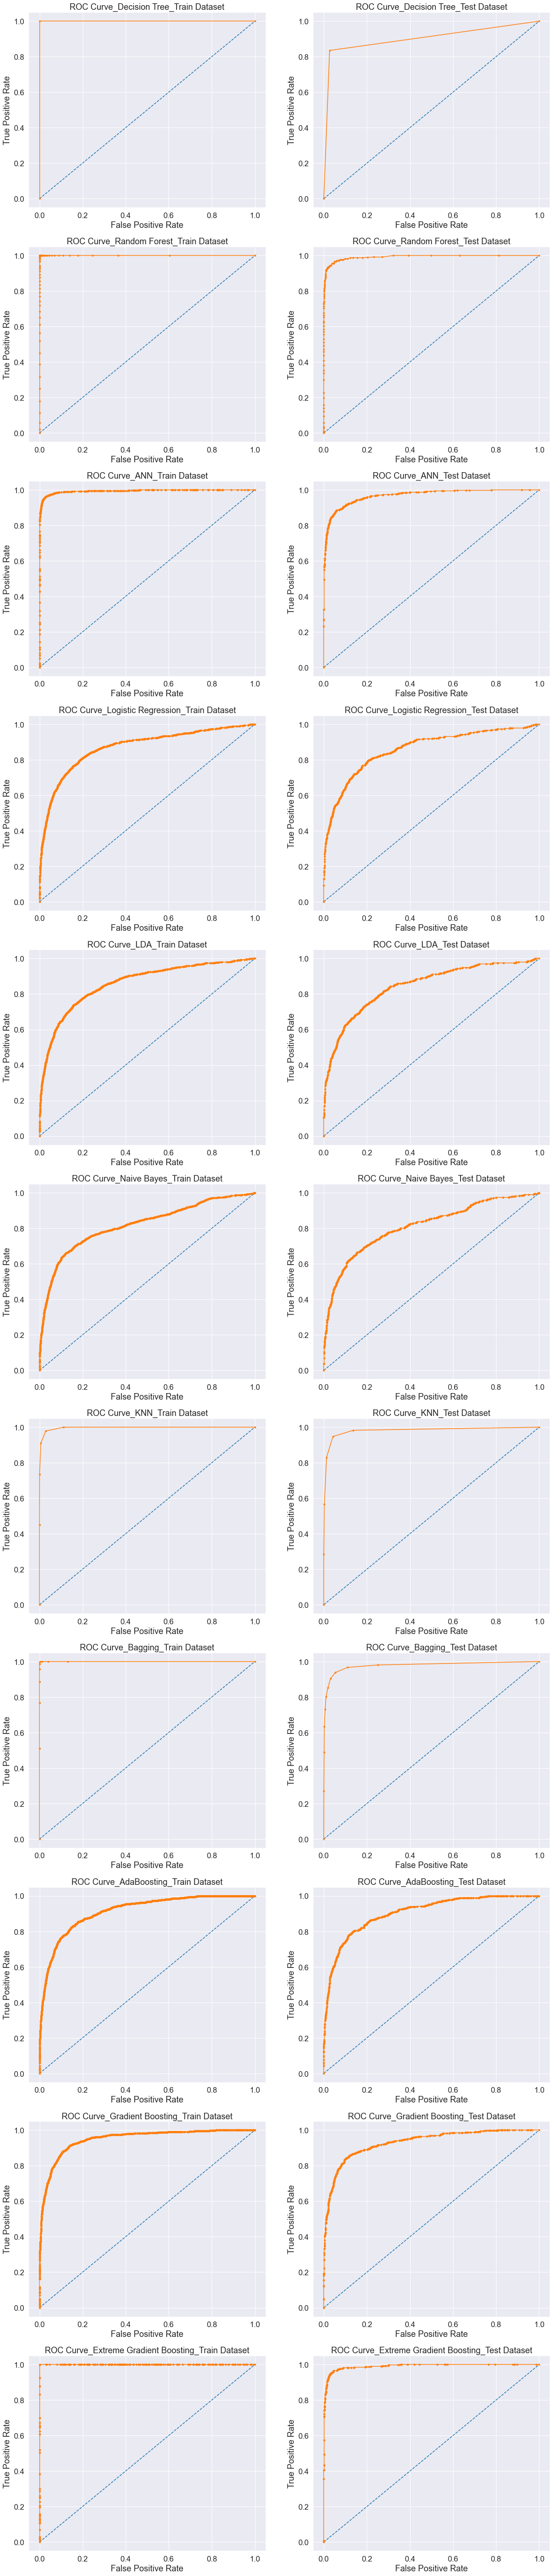

In [122]:
dtm=DecisionTreeClassifier(random_state=1)
rfm = RandomForestClassifier(random_state=1)
annm=MLPClassifier(random_state=1)
lgrm=LogisticRegression(random_state=1)
ldam=LinearDiscriminantAnalysis()
nbm=GaussianNB()
knnm=KNeighborsClassifier()
bgm=BaggingClassifier(random_state=1)
abm=AdaBoostClassifier(random_state=1)
gbm=GradientBoostingClassifier(random_state=1)
xgbm=XGBClassifier(random_state=1)

models=[dtm, rfm, annm, lgrm, ldam, nbm, knnm, bgm, abm, gbm, xgbm]

titles=['ROC Curve_Decision Tree_Train Dataset', 'ROC Curve_Decision Tree_Test Dataset', 
        'ROC Curve_Random Forest_Train Dataset','ROC Curve_Random Forest_Test Dataset',
        'ROC Curve_ANN_Train Dataset', 'ROC Curve_ANN_Test Dataset', 
        'ROC Curve_Logistic Regression_Train Dataset', 'ROC Curve_Logistic Regression_Test Dataset',
        'ROC Curve_LDA_Train Dataset', 'ROC Curve_LDA_Test Dataset',
        'ROC Curve_Naive Bayes_Train Dataset','ROC Curve_Naive Bayes_Test Dataset',
        'ROC Curve_KNN_Train Dataset','ROC Curve_KNN_Test Dataset',
        'ROC Curve_Bagging_Train Dataset', 'ROC Curve_Bagging_Test Dataset', 
        'ROC Curve_AdaBoosting_Train Dataset','ROC Curve_AdaBoosting_Test Dataset',
        'ROC Curve_Gradient Boosting_Train Dataset','ROC Curve_Gradient Boosting_Test Dataset',
       'ROC Curve_Extreme Gradient Boosting_Train Dataset','ROC Curve_Extreme Gradient Boosting_Test Dataset']

accuracy_train=[]
auc_train=[]
precision_train=[]
recall_train=[]
f1score_train=[]

accuracy_test=[]
auc_test=[]
precision_test=[]
recall_test=[]
f1score_test=[]

def performance_metrics_train(xtrue, ytrue, y_pred, y_prob1):
    accuracy_train.append(i.score(xtrue, ytrue))
    auc_train.append(roc_auc_score(ytrue,y_prob1))
    a=pd.DataFrame(classification_report(ytrue,y_pred,output_dict=True)).T
    precision_train.append(a.iloc[1,0])
    recall_train.append(a.iloc[1,1])
    f1score_train.append(a.iloc[1,2])

def performance_metrics_test(xtrue, ytrue, y_pred, y_prob1):
    accuracy_test.append(i.score(xtrue, ytrue))
    auc_test.append(roc_auc_score(ytrue,y_prob1))
    a=pd.DataFrame(classification_report(ytrue,y_pred,output_dict=True)).T
    precision_test.append(a.iloc[1,0])
    recall_test.append(a.iloc[1,1])
    f1score_test.append(a.iloc[1,2])

def ROC(true,prob,m):    
    fpr_train,tpr_train,thr_train=roc_curve(true,prob)
    plt.title(titles[m])
    plt.plot([0, 1], [0, 1], linestyle='--');
    plt.plot(fpr_train,tpr_train,marker='.');
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize=(20,100))
j=1
for i in models:
    if i in [dtm,nbm,bgm,rfm,abm,gbm,xgbm]:
        i.fit(xtrain_tree,ytrain)
        
        # Predictions_train
        ytrain_pred=i.predict(xtrain_tree)
        ytrain_prob1=i.predict_proba(xtrain_tree)[:,1]
        
        # Performance metrics_train
        performance_metrics_train(xtrain_tree, ytrain, ytrain_pred, ytrain_prob1)

        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs=['bold']))
        display(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs=['bold']))
        display(pd.DataFrame(classification_report(ytrain,ytrain_pred,output_dict=True)).round(2).T)
        print(" ")
        
        # ROC-AUC curve_train
        plt.subplot(11,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        
        # Predictions_test
        ytest_pred=i.predict(xtest_tree)
        ytest_prob1=i.predict_proba(xtest_tree)[:,1]
        
        # Performance metrics_test
        performance_metrics_test(xtest_tree, ytest, ytest_pred, ytest_prob1)
        
        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs=['bold']))
        display(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs=['bold']))
        display(pd.DataFrame(classification_report(ytest,ytest_pred,output_dict=True)).round(2).T)
        print('*****************************************************************************************************')
        
        # ROC-AUC curve_test
        k=j+1
        plt.subplot(11,2,k)
        ROC(ytest,ytest_prob1,(k-1))
      
        j=k+1

    else:
        i.fit(xtrain_scaled,ytrain)
        
        # Predictions_train
        ytrain_pred=i.predict(xtrain_scaled)
        ytrain_prob1=i.predict_proba(xtrain_scaled)[:,1]
        
        # Performance metrics_train
        performance_metrics_train(xtrain_scaled, ytrain, ytrain_pred, ytrain_prob1)        
        
        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs=['bold']))
        display(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']))
        print(" ")
        
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs=['bold']))
        display(pd.DataFrame(classification_report(ytrain,ytrain_pred,output_dict=True)).round(2).T)
        print(" ")
        
        # ROC-AUC curve_train
        plt.subplot(11,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        
        # Predictions_test
        ytest_pred=i.predict(xtest_scaled)
        ytest_prob1=i.predict_proba(xtest_scaled)[:,1]
        
        # Performance metrics_test
        performance_metrics_test(xtest_scaled, ytest, ytest_pred, ytest_prob1)

        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs=['bold']))
        display(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs=['bold']))
        display(pd.DataFrame(classification_report(ytest,ytest_pred,output_dict=True)).round(2).T)
        print('*******************************************************************************************************')
        
        # ROC-AUC curve_test
        k=j+1
        plt.subplot(11,2,k)
        ROC(ytest,ytest_prob1,(k-1))
        j=k+1

Performance_Metrics_Before_Tuning=pd.DataFrame(
    {'Accuracy_Train':accuracy_train,
     'Accuracy_Test':accuracy_test,
    'AUC_Train': auc_train,
     'AUC_Test': auc_test,
    'Precision_Train': precision_train,
     'Precision_Test': precision_test,
    'Recall_Train': recall_train,
     'Recall_Test': recall_test,
    'F1score_Train': f1score_train,
     'F1score_Test': f1score_test},
               
    index=['Decision Tree','Random Forest','ANN','Logistic Regression', 'LDA','Naive Bayes','KNN',
            'Bagging','AdaBoosting','Gradient Boosting','Extreme Gradient Boosting']).round(2)

In [123]:
Performance_Metrics_Before_Tuning.sort_values(['F1score_Test','Recall_Test','Precision_Test'],
                                              ascending=[False,False,False])

Accuracy_Train  Accuracy_Test  AUC_Train  AUC_Test  \
Random Forest                        1.00           0.97       1.00      0.99   
Extreme Gradient Boosting            1.00           0.97       1.00      0.99   
KNN                                  0.98           0.96       1.00      0.98   
Bagging                              1.00           0.96       1.00      0.98   
Decision Tree                        1.00           0.95       1.00      0.90   
ANN                                  0.98           0.95       0.99      0.97   
Gradient Boosting                    0.92           0.91       0.95      0.93   
AdaBoosting                          0.90           0.90       0.91      0.91   
Naive Bayes                          0.87           0.86       0.82      0.81   
Logistic Regression                  0.88           0.88       0.87      0.86   
LDA                                  0.88           0.88       0.86      0.85   

                           Precision_Train  Precision_Test  Recall_Train  \
Random Forest                         1.00            0.98          1.00   
Extreme Gradient Boosting             1.00            0.94          1.00   
KNN                                   0.97            0.93          0.91   
Bagging                               1.00            0.94          0.99   
Decision Tree                         1.00            0.86          1.00   
ANN                                   0.96            0.88          0.91   
Gradient Boosting                     0.83            0.83          0.64   
AdaBoosting                           0.76            0.76          0.57   
Naive Bayes                           0.61            0.59          0.55   
Logistic Regression                   0.74            0.74          0.45   
LDA                                   0.73            0.73          0.42   

                           Recall_Test  F1score_Train  F1score_Test  
Random Forest                     0.84           1.00          0.90  
Extreme Gradient Boosting         0.85           1.00          0.89  
KNN                               0.83           0.94          0.88  
Bagging                           0.80           0.99          0.87  
Decision Tree                     0.84           1.00          0.85  
ANN                               0.79           0.93          0.84  
Gradient Boosting                 0.61           0.72          0.70  
AdaBoosting                       0.56           0.65          0.65  
Naive Bayes                       0.53           0.58          0.56  
Logistic Regression               0.45           0.56          0.56  
LDA                               0.44           0.54          0.55

In [124]:
Performance_Metrics_Before_Tuning.to_excel('Performance Metrics Before Tuning.xlsx')

## Feature_Importances

### Decision Tree Model

In [125]:
fi_dtm=pd.DataFrame(dtm.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).round(4).head(10)
fi_dtm

Feature_Importances
tenure                             0.3122
day_since_cc_connect               0.0940
cc_agent_score                     0.0726
cashback                           0.0709
complain_ly                        0.0597
rev_growth_yoy                     0.0585
payment                            0.0534
rev_per_month                      0.0523
cc_contacted_ly                    0.0471
city_tier                          0.0451

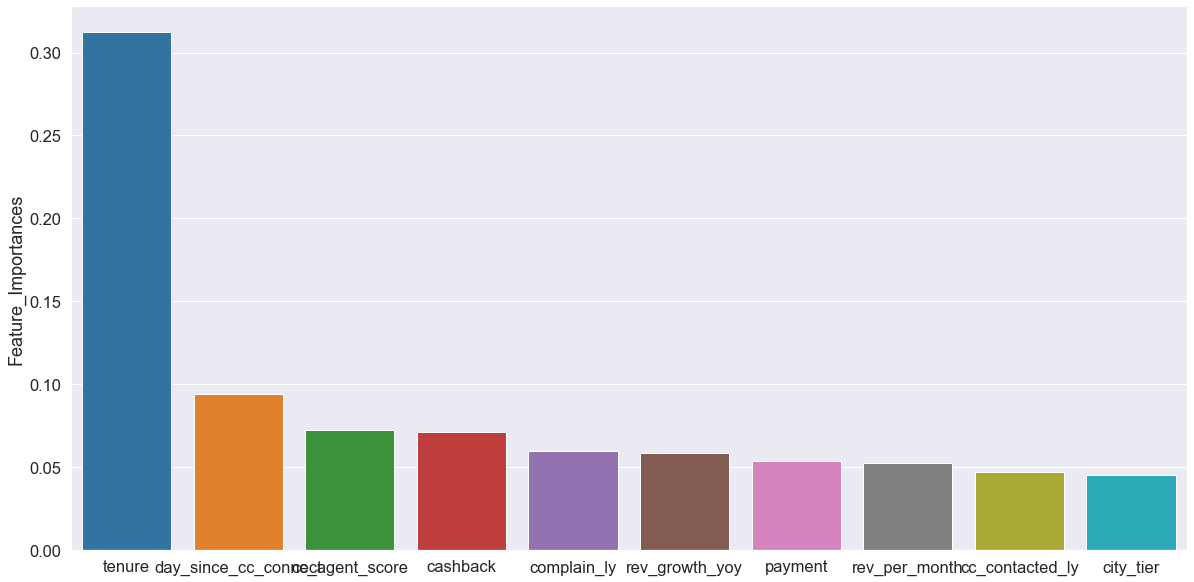

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(fi_dtm.index,fi_dtm.Feature_Importances);

### Random Forest Model

In [127]:
fi_rfm=pd.DataFrame(rfm.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).round(4).head(10)
fi_rfm

Feature_Importances
tenure                             0.2547
cashback                           0.0908
cc_contacted_ly                    0.0782
day_since_cc_connect               0.0740
rev_growth_yoy                     0.0701
complain_ly                        0.0657
rev_per_month                      0.0620
cc_agent_score                     0.0615
payment                            0.0537
account_segment                    0.0430

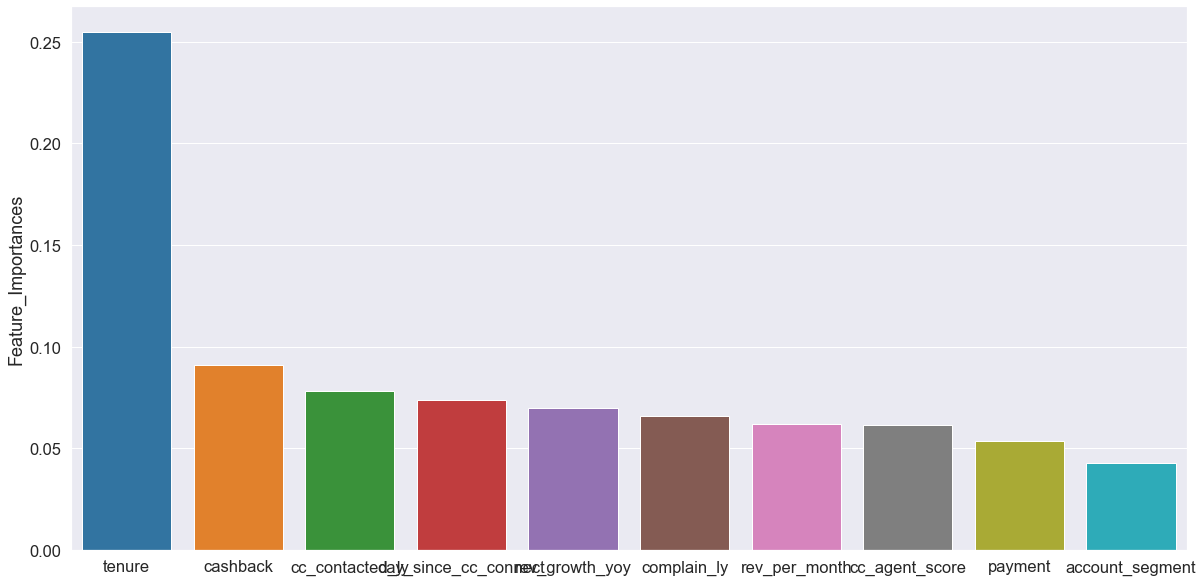

In [128]:
plt.figure(figsize=(20,10))
sns.barplot(fi_rfm.index,fi_rfm.Feature_Importances);

### Logistic Regression Model

In [129]:
fi_lgrm=pd.DataFrame(lgrm.coef_.T,index=xtrain_scaled.columns, 
columns=['Coefficients']).rename_axis(index='Predictor').sort_values(by='Coefficients',ascending=False,
                                                                     key=abs).round(3).head(10)
fi_lgrm

Coefficients
Predictor                          
complain_ly                   1.665
tenure                       -1.532
payment_Credit_Card          -0.859
payment_UPI                  -0.790
marital_status_Single         0.675
payment_Debit_Card           -0.662
login_device_Mobile          -0.410
rev_per_month                 0.378
day_since_cc_connect         -0.323
account_user_count            0.318

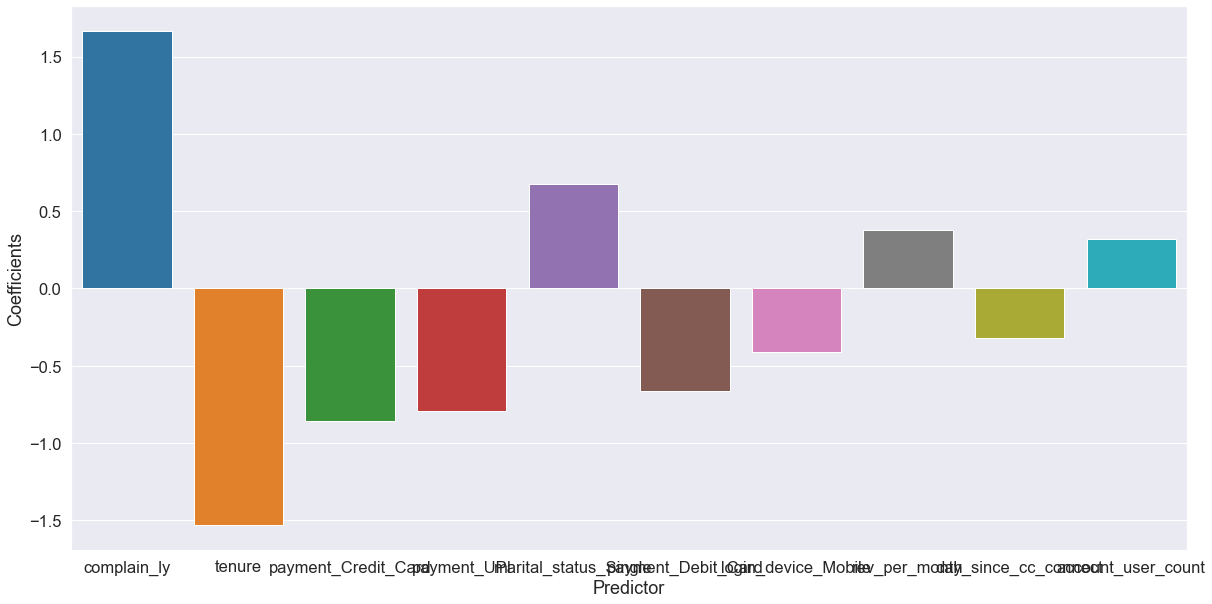

In [130]:
plt.figure(figsize=(20,10))
sns.barplot(fi_lgrm.index,fi_lgrm.Coefficients);

### LDA Model

In [131]:
fi_ldam=pd.DataFrame(ldam.coef_.T,index=xtrain_scaled.columns, 
columns=['Coefficients']).rename_axis(index='Predictor').sort_values(by='Coefficients',ascending=False,
                                                                     key=abs).round(3).head(10)
fi_ldam

Coefficients
Predictor                          
complain_ly                   1.942
payment_Credit_Card          -1.136
tenure                       -1.073
payment_UPI                  -1.069
payment_Debit_Card           -0.935
marital_status_Single         0.931
payment_E_wallet             -0.397
login_device_Mobile          -0.380
rev_per_month                 0.337
account_user_count            0.305

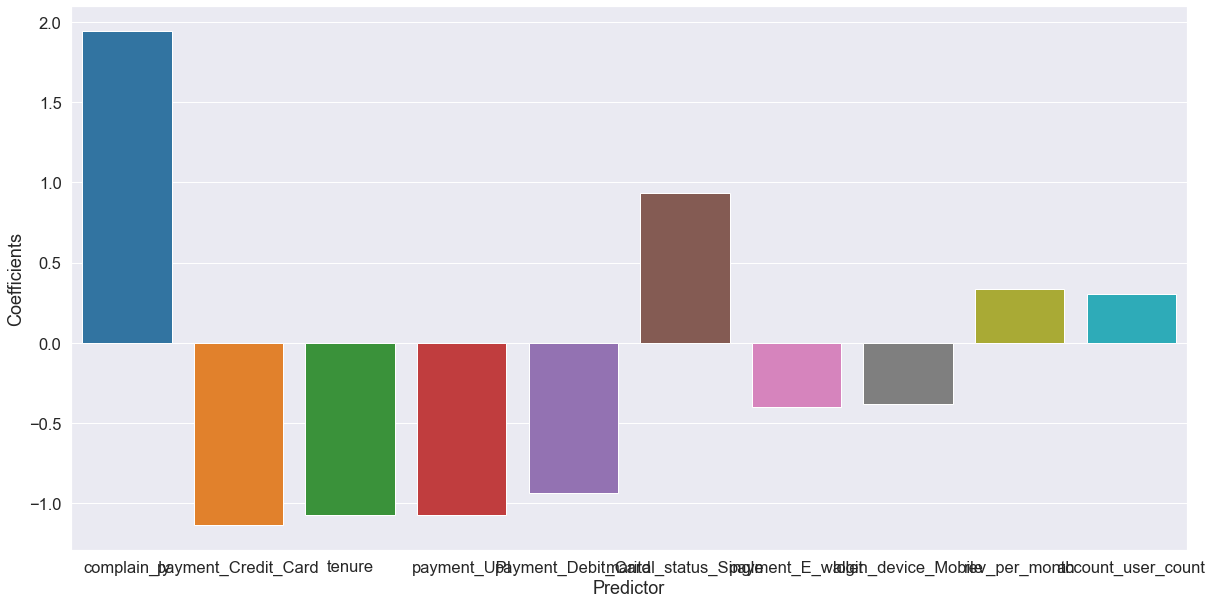

In [132]:
plt.figure(figsize=(20,10))
sns.barplot(fi_ldam.index,fi_ldam.Coefficients);

### AdaBoosting Model

In [133]:
fi_abm = pd.DataFrame(abm.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,
                                             key=abs).round(3).head(10)
fi_abm

Feature_Importances
tenure                               0.28
cashback                             0.16
payment                              0.08
account_segment                      0.08
day_since_cc_connect                 0.08
rev_per_month                        0.06
rev_growth_yoy                       0.06
cc_contacted_ly                      0.04
cc_agent_score                       0.04
complain_ly                          0.04

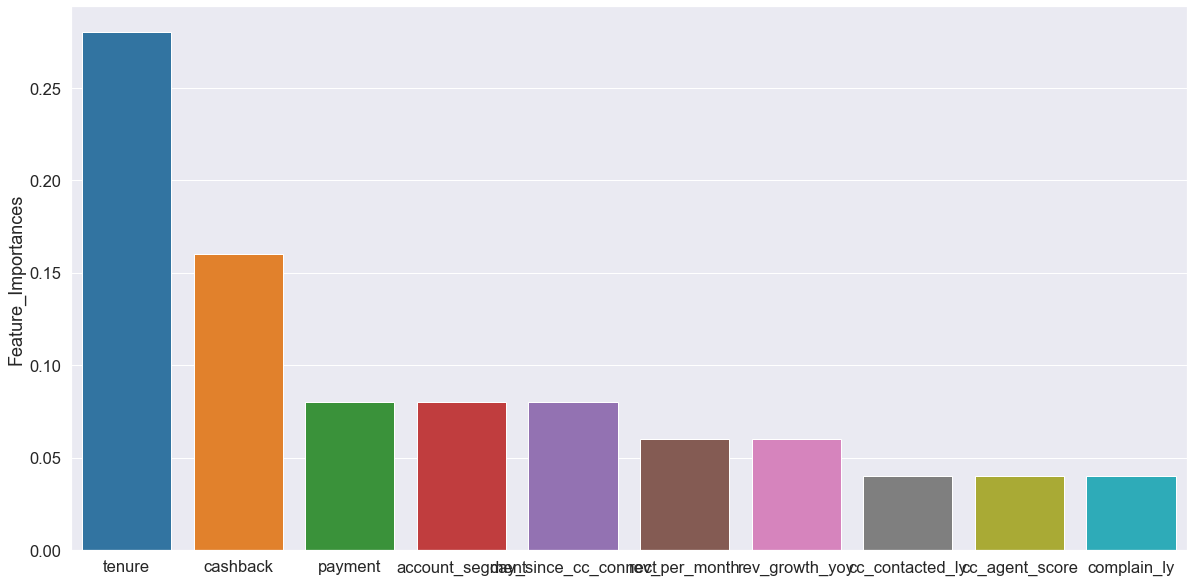

In [134]:
plt.figure(figsize=(20,10))
sns.barplot(fi_abm.index,fi_abm.Feature_Importances);

### Gradient Boosting Model

In [135]:
fi_gbm=pd.DataFrame(gbm.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,
                                             key=abs).round(3).head(10)
fi_gbm

Feature_Importances
tenure                              0.528
complain_ly                         0.134
day_since_cc_connect                0.067
rev_per_month                       0.045
cc_agent_score                      0.040
account_segment                     0.036
marital_status                      0.036
payment                             0.025
cc_contacted_ly                     0.020
cashback                            0.019

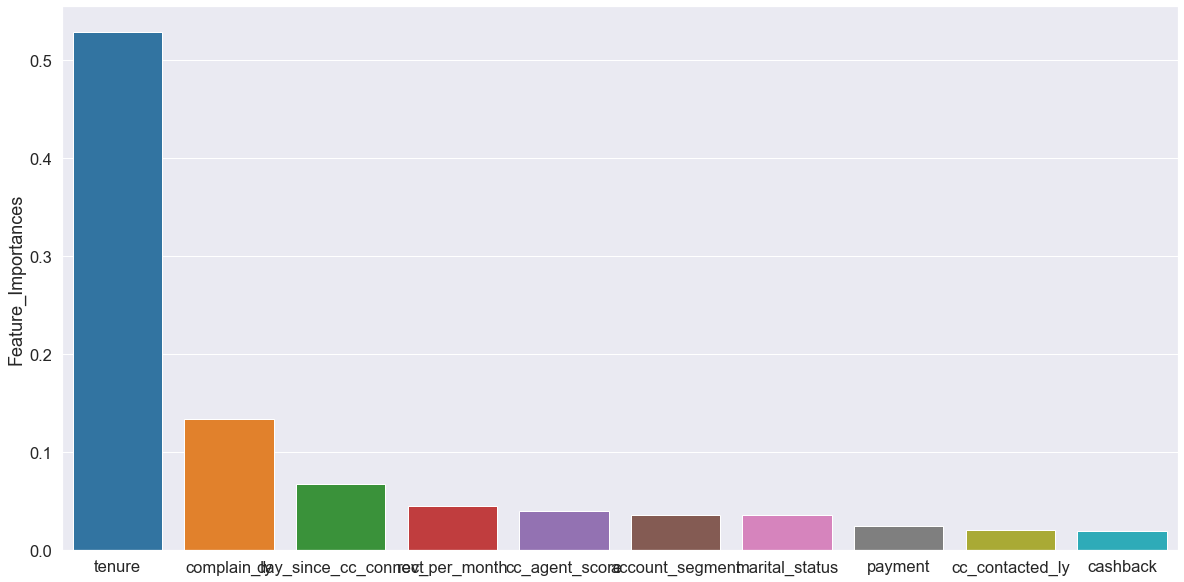

In [136]:
plt.figure(figsize=(20,10))
sns.barplot(fi_gbm.index,fi_gbm.Feature_Importances);

### Extreme Gradient Boosting Model

In [137]:
fi_xgbm=pd.DataFrame(xgbm.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,
                                             key=abs).round(3).head(10)
fi_xgbm

Feature_Importances
tenure                              0.188
complain_ly                         0.156
account_segment                     0.076
cc_agent_score                      0.067
city_tier                           0.061
marital_status                      0.060
day_since_cc_connect                0.058
rev_per_month                       0.057
payment                             0.051
login_device                        0.050

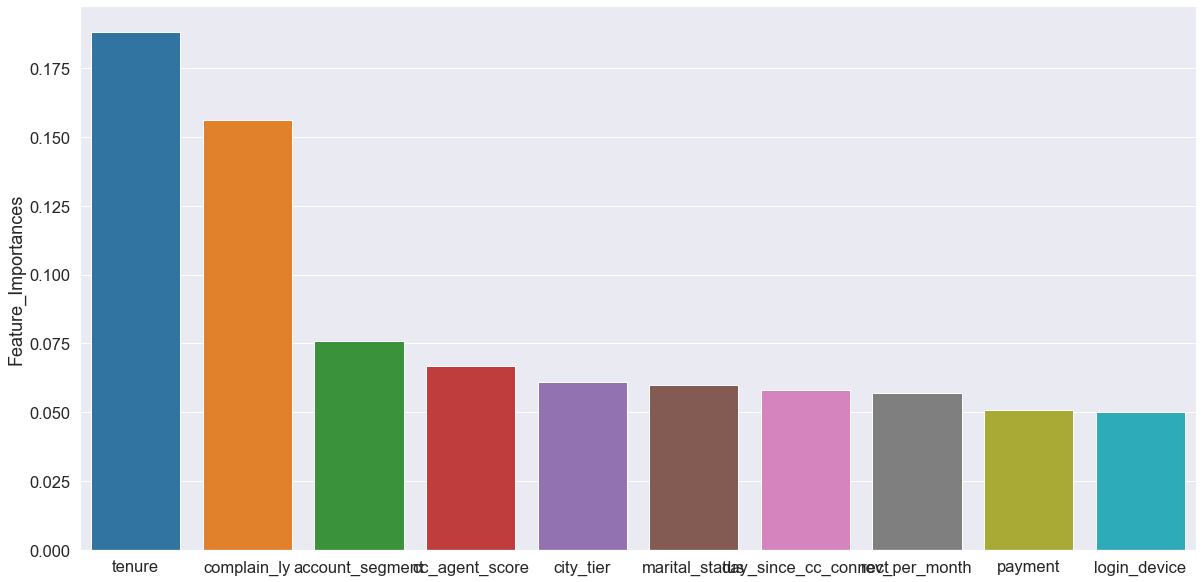

In [138]:
plt.figure(figsize=(20,10))
sns.barplot(fi_xgbm.index,fi_xgbm.Feature_Importances);

# Effort to improve model performance.

## Tuning Hyperparameters using GridsearchCV

### Using GridsearchCV for Decision Tree Model

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
#param_grid = {'max_depth': [13,14,15]}

In [141]:
param_grid = {'max_depth': [14]}
dtm = DecisionTreeClassifier(random_state=1)
gscv_dtm = GridSearchCV(estimator = dtm, param_grid = param_grid)

In [142]:
gscv_dtm.fit(xtrain_tree,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [14]})

In [143]:
gscv_dtm.best_params_

{'max_depth': 14}

### Using GridsearchCV for Random Forest Model

In [144]:
# param_grid = {
#      'max_depth': [15,16,17],
#      'max_features': [8,9,10],
#      'n_estimators': [151,201,251]}

In [145]:
param_grid = {
     'max_depth': [16],
      'max_features': [9],
      'n_estimators': [201]}
rfm = RandomForestClassifier(random_state=1)
gscv_rfm = GridSearchCV(estimator = rfm, param_grid = param_grid)

In [146]:
gscv_rfm.fit(xtrain_tree,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [16], 'max_features': [9],
                         'n_estimators': [201]})

In [147]:
gscv_rfm.best_params_

{'max_depth': 16, 'max_features': 9, 'n_estimators': 201}

### Using GridsearchCV for ANN Model

In [148]:
# param_grid = {'hidden_layer_sizes': [300,350,400]}

In [149]:
param_grid = {'hidden_layer_sizes': [350]}
annm = MLPClassifier(random_state=1)
gscv_annm = GridSearchCV(estimator = annm, param_grid = param_grid)

In [150]:
gscv_annm.fit(xtrain_scaled,ytrain)

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [350]})

In [151]:
gscv_annm.best_params_

{'hidden_layer_sizes': 350}

### Using GridsearchCV for Logistic Regression Model

In [152]:
param_grid_lgrm = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lgrm = LogisticRegression(max_iter=10000, random_state=1)
gscv_lgrm = GridSearchCV(estimator = lgrm, param_grid = param_grid_lgrm)

In [153]:
gscv_lgrm.fit(xtrain_scaled,ytrain)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=1),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [154]:
gscv_lgrm.best_params_

{'solver': 'newton-cg'}

### Using GridsearchCV for LDA Model

In [155]:
param_grid_ldam = {'solver': ['svd', 'lsqr', 'eigen']}
ldam = LinearDiscriminantAnalysis()
gscv_ldam = GridSearchCV(estimator = ldam, param_grid = param_grid_ldam)

In [156]:
gscv_ldam.fit(xtrain_scaled,ytrain)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [157]:
gscv_ldam.best_params_

{'solver': 'svd'}

### Optimization of K in KNN Model

In [158]:
# accuracy_train_knnm=[]
# accuracy_test_knnm=[]
# for i in range(1,200):
#     knnm=KNeighborsClassifier(n_neighbors=i)
#     knnm.fit(xscaled_train,ytrain)
#     accuracy_train_knnm.append(knnm.score(xscaled_train,ytrain))
#     accuracy_test_knnm.append(knnm.score(xscaled_test,ytest))

In [159]:
# plt.figure(figsize=(15,9))
# plt.plot(range(1,200),accuracy_train_knnm,label='Train_Accuracy');
# plt.plot(range(1,200),accuracy_test_knnm,label='Test_Accuracy');
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

In [160]:
#'weights': ['uniform', 'distance']

In [161]:
# param_grid_knnm = {'n_neighbors': [85,91,95,101,105,111,115]}
# knnm = KNeighborsClassifier()
# gscv_knnm = GridSearchCV(estimator = knnm, param_grid = param_grid_knnm)

In [162]:
# gscv_knnm.fit(xscaled_train,ytrain)

In [163]:
# gscv_knnm.best_params_

### Using GridsearchCV for Bagging

In [164]:
# param_grid = {'n_estimators': [15,25,51]}

In [165]:
param_grid = {'n_estimators': [25]}
bgm = BaggingClassifier(random_state=1)
gscv_bgm = GridSearchCV(estimator = bgm, param_grid = param_grid)

In [166]:
gscv_bgm.fit(xtrain_tree,ytrain)

GridSearchCV(estimator=BaggingClassifier(random_state=1),
             param_grid={'n_estimators': [25]})

In [167]:
gscv_bgm.best_params_

{'n_estimators': 25}

### Using GridsearchCV for Ada Boosting

In [168]:
# param_grid = {'n_estimators': [101,151,201]}

In [169]:
param_grid = {'n_estimators': [151]}
abm = AdaBoostClassifier(random_state=1)
gscv_abm = GridSearchCV(estimator = abm, param_grid = param_grid)

In [170]:
gscv_abm.fit(xtrain_tree,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(random_state=1),
             param_grid={'n_estimators': [151]})

In [171]:
gscv_abm.best_params_

{'n_estimators': 151}

### Using GridsearchCV for Gradient Boosting

In [172]:
# param_grid = {'n_estimators': [301,351,401],
#              'max_depth': [9,10,11]}

In [173]:
param_grid = {'n_estimators': [351],
              'max_depth': [10]}
gbm = GradientBoostingClassifier(random_state=1)
gscv_gbm = GridSearchCV(estimator = gbm, param_grid = param_grid)

In [174]:
gscv_gbm.fit(xtrain_tree,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'max_depth': [10], 'n_estimators': [351]})

In [175]:
gscv_gbm.best_params_

{'max_depth': 10, 'n_estimators': 351}

### Using GridsearchCV for Extreme Gradient Boosting

In [176]:
# param_grid = {'n_estimators': [151,201,251],
#     'max_depth': [8,9,10]}

In [177]:
param_grid = {'n_estimators': [201],
     'max_depth': [9]}
xgbm = XGBClassifier(random_state=1)
gscv_xgbm = GridSearchCV(estimator = xgbm, param_grid = param_grid)

In [178]:
gscv_xgbm.fit(xtrain_tree,ytrain)

[22:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
               

In [179]:
gscv_xgbm.best_params_

{'max_depth': 9, 'n_estimators': 201}

In [180]:
gscv_xgbm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=201, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Building Models - After Tuning Hyperparameters

Model: DecisionTreeClassifier(max_depth=14, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6543           13
Actual 1           34         1292

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.99    1.00      1.00  6556.00
1                  0.99    0.97      0.98  1326.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.99    0.99      0.99  7882.00
weighted avg       0.99    0.99      0.99  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2726           82
Actual 1          103          467

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.96    0.97      0.97  2808.00
1                  0.85    0.82      0.83   570.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.91    0.90      0.90  3378.00
weighted avg       0.94    0.95      0.94  3378.00

*****************************************************************************************************
Model: RandomForestClassifier(max_depth=16, max_features=9, n_estimators=201,
                       random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            1         1325

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2791           17
Actual 1           83          487

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.97    0.99      0.98  2808.00
1                  0.97    0.85      0.91   570.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.97    0.92      0.94  3378.00
weighted avg       0.97    0.97      0.97  3378.00

*****************************************************************************************************
Model: MLPClassifier(hidden_layer_sizes=350, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6555            1
Actual 1            5         1321

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2772           36
Actual 1           54          516

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.98    0.99      0.98  2808.00
1                  0.93    0.91      0.92   570.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.96    0.95      0.95  3378.00
weighted avg       0.97    0.97      0.97  3378.00

*******************************************************************************************************
Model: LogisticRegression(max_iter=10000, random_state=1, solver='newton-cg') 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6346          210
Actual 1          726          600

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.90    0.97      0.93  6556.00
1                  0.74    0.45      0.56  1326.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.82    0.71      0.75  7882.00
weighted avg       0.87    0.88      0.87  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2719           89
Actual 1          312          258

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.90    0.97      0.93  2808.00
1                  0.74    0.45      0.56   570.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.82    0.71      0.75  3378.00
weighted avg       0.87    0.88      0.87  3378.00

*******************************************************************************************************
Model: LinearDiscriminantAnalysis() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6349          207
Actual 1          765          561

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.89    0.97      0.93  6556.00
1                  0.73    0.42      0.54  1326.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.81    0.70      0.73  7882.00
weighted avg       0.87    0.88      0.86  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2715           93
Actual 1          320          250

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.89    0.97      0.93  2808.00
1                  0.73    0.44      0.55   570.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.81    0.70      0.74  3378.00
weighted avg       0.87    0.88      0.86  3378.00

*******************************************************************************************************
Model: GaussianNB() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6090          466
Actual 1          595          731

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.91    0.93      0.92  6556.00
1                  0.61    0.55      0.58  1326.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.76    0.74      0.75  7882.00
weighted avg       0.86    0.87      0.86  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2598          210
Actual 1          269          301

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.91    0.93      0.92  2808.00
1                  0.59    0.53      0.56   570.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.75    0.73      0.74  3378.00
weighted avg       0.85    0.86      0.86  3378.00

*****************************************************************************************************
Model: KNeighborsClassifier() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6515           41
Actual 1          119         1207

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.98    0.99      0.99  6556.00
1                  0.97    0.91      0.94  1326.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.97    0.95      0.96  7882.00
weighted avg       0.98    0.98      0.98  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2772           36
Actual 1           97          473

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.97    0.99      0.98  2808.00
1                  0.93    0.83      0.88   570.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.95    0.91      0.93  3378.00
weighted avg       0.96    0.96      0.96  3378.00

*******************************************************************************************************
Model: BaggingClassifier(n_estimators=25, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6555            1
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2777           31
Actual 1           81          489

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.97    0.99      0.98  2808.00
1                  0.94    0.86      0.90   570.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.96    0.92      0.94  3378.00
weighted avg       0.97    0.97      0.97  3378.00

*****************************************************************************************************
Model: AdaBoostClassifier(n_estimators=151, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6317          239
Actual 1          550          776

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.92    0.96      0.94   6556.0
1                  0.76    0.59      0.66   1326.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.84    0.77      0.80   7882.0
weighted avg       0.89    0.90      0.89   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2697          111
Actual 1          238          332

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.92    0.96      0.94   2808.0
1                  0.75    0.58      0.66    570.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.83    0.77      0.80   3378.0
weighted avg       0.89    0.90      0.89   3378.0

*****************************************************************************************************
Model: GradientBoostingClassifier(max_depth=10, n_estimators=351, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2795           13
Actual 1           58          512

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.98    1.00      0.99  2808.00
1                  0.98    0.90      0.94   570.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.98    0.95      0.96  3378.00
weighted avg       0.98    0.98      0.98  3378.00

*****************************************************************************************************
[22:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=201, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tre

Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2785           23
Actual 1           71          499

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.98    0.99      0.98  2808.00
1                  0.96    0.88      0.91   570.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.97    0.93      0.95  3378.00
weighted avg       0.97    0.97      0.97  3378.00

*****************************************************************************************************


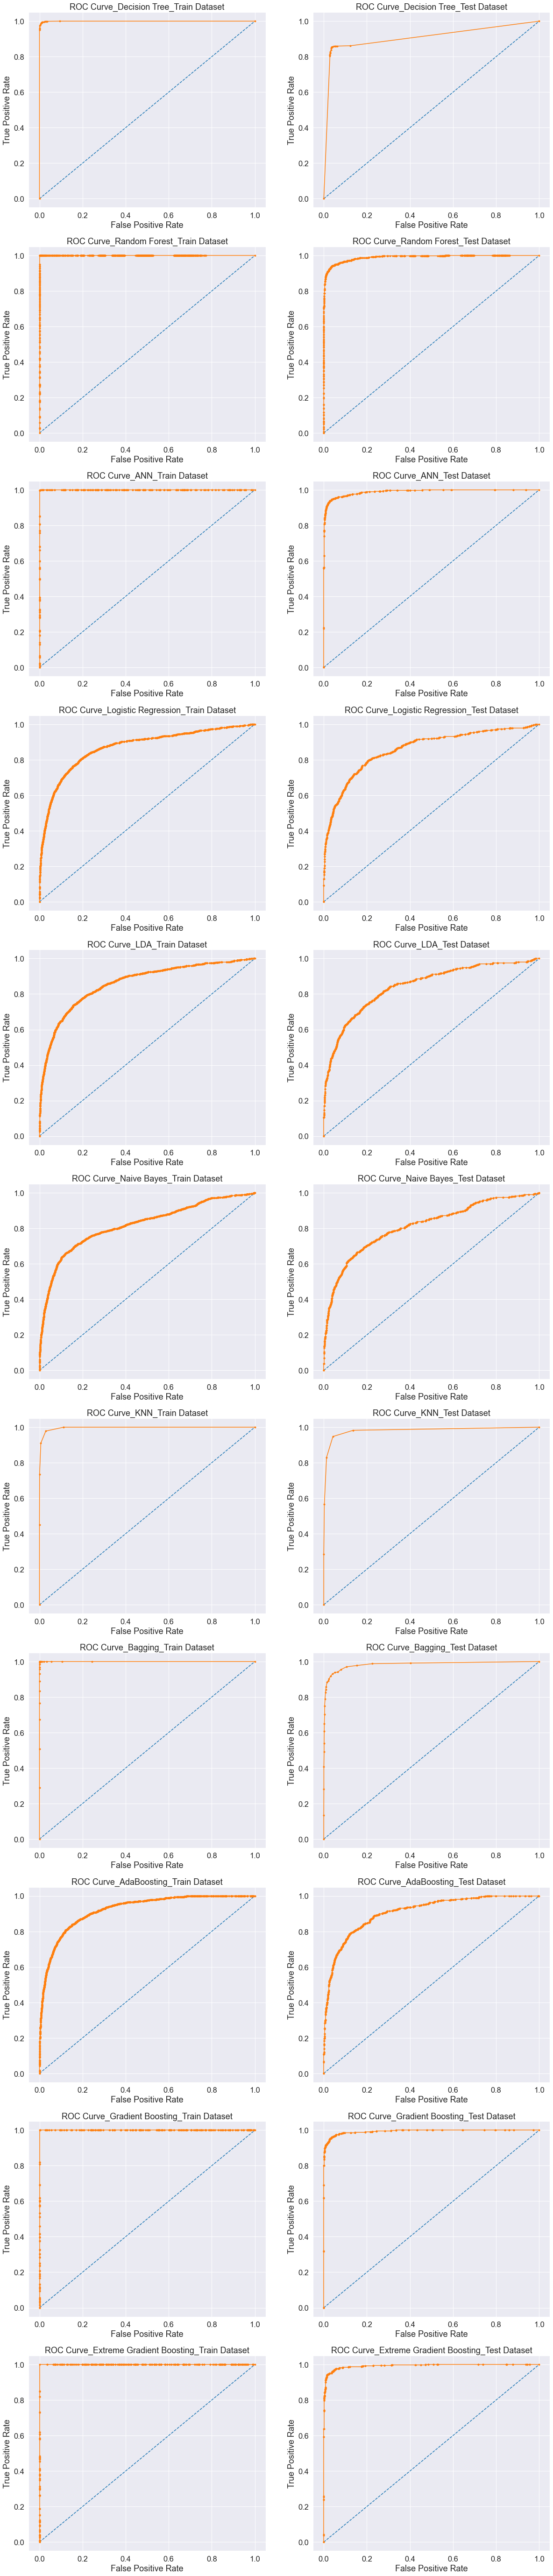

In [181]:
dtmf = gscv_dtm.best_estimator_
rfmf = gscv_rfm.best_estimator_
annmf = gscv_annm.best_estimator_
lgrmf = gscv_lgrm.best_estimator_
ldamf = gscv_ldam.best_estimator_
nbm = GaussianNB()
knnm = KNeighborsClassifier()
bgmf = gscv_bgm.best_estimator_
abmf = gscv_abm.best_estimator_
gbmf = gscv_gbm.best_estimator_
xgbmf = gscv_xgbm.best_estimator_

models = [dtmf, rfmf, annmf, lgrmf, ldamf, nbm, knnm, bgmf, abmf, gbmf, xgbmf]

titles = ['ROC Curve_Decision Tree_Train Dataset', 'ROC Curve_Decision Tree_Test Dataset', 
        'ROC Curve_Random Forest_Train Dataset','ROC Curve_Random Forest_Test Dataset',
        'ROC Curve_ANN_Train Dataset', 'ROC Curve_ANN_Test Dataset', 
        'ROC Curve_Logistic Regression_Train Dataset', 'ROC Curve_Logistic Regression_Test Dataset',
        'ROC Curve_LDA_Train Dataset', 'ROC Curve_LDA_Test Dataset',
        'ROC Curve_Naive Bayes_Train Dataset','ROC Curve_Naive Bayes_Test Dataset',
        'ROC Curve_KNN_Train Dataset','ROC Curve_KNN_Test Dataset',
        'ROC Curve_Bagging_Train Dataset', 'ROC Curve_Bagging_Test Dataset', 
        'ROC Curve_AdaBoosting_Train Dataset','ROC Curve_AdaBoosting_Test Dataset',
        'ROC Curve_Gradient Boosting_Train Dataset','ROC Curve_Gradient Boosting_Test Dataset',
       'ROC Curve_Extreme Gradient Boosting_Train Dataset','ROC Curve_Extreme Gradient Boosting_Test Dataset']

accuracy_train = []
auc_train = []
precision_train = []
recall_train = []
f1score_train = []

accuracy_test = []
auc_test = []
precision_test = []
recall_test = []
f1score_test = []

def performance_metrics_train(xtrue, ytrue, y_pred, y_prob1):
    accuracy_train.append(i.score(xtrue, ytrue))
    auc_train.append(roc_auc_score(ytrue,y_prob1))
    a = pd.DataFrame(classification_report(ytrue,y_pred,output_dict = True)).T
    precision_train.append(a.iloc[1,0])
    recall_train.append(a.iloc[1,1])
    f1score_train.append(a.iloc[1,2])

def performance_metrics_test(xtrue, ytrue, y_pred, y_prob1):
    accuracy_test.append(i.score(xtrue, ytrue))
    auc_test.append(roc_auc_score(ytrue,y_prob1))
    a = pd.DataFrame(classification_report(ytrue,y_pred,output_dict = True)).T
    precision_test.append(a.iloc[1,0])
    recall_test.append(a.iloc[1,1])
    f1score_test.append(a.iloc[1,2])

def ROC(true,prob,m):    
    fpr_train,tpr_train,thr_train = roc_curve(true,prob)
    plt.title(titles[m])
    plt.plot([0, 1], [0, 1], linestyle = '--');
    plt.plot(fpr_train,tpr_train,marker = '.');
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize = (20,100))
j = 1
for i in models:
    if i in [dtmf,nbm,bgmf,rfmf,abmf,gbmf,xgbmf]:
        i.fit(xtrain_tree,ytrain)
        
        # Predictions_train
        ytrain_pred = i.predict(xtrain_tree)
        ytrain_prob1 = i.predict_proba(xtrain_tree)[:,1]
        
        # Performance metrics_train
        performance_metrics_train(xtrain_tree, ytrain, ytrain_pred, ytrain_prob1)

        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index = ['Actual 0','Actual 1'],
                           columns = ['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(classification_report(ytrain,ytrain_pred,output_dict = True)).round(2).T)
        print(" ")
        
        # ROC-AUC curve_train
        plt.subplot(11,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        
        # Predictions_test
        ytest_pred = i.predict(xtest_tree)
        ytest_prob1 = i.predict_proba(xtest_tree)[:,1]
        
        # Performance metrics_test
        performance_metrics_test(xtest_tree, ytest, ytest_pred, ytest_prob1)
        
        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index = ['Actual 0','Actual 1'],
                           columns = ['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(classification_report(ytest,ytest_pred,output_dict = True)).round(2).T)
        print('*****************************************************************************************************')
        
        # ROC-AUC curve_test
        k = j+1
        plt.subplot(11,2,k)
        ROC(ytest,ytest_prob1,(k-1))
      
        j = k+1

    else:
        i.fit(xtrain_scaled,ytrain)
        
        # Predictions_train
        ytrain_pred = i.predict(xtrain_scaled)
        ytrain_prob1 = i.predict_proba(xtrain_scaled)[:,1]
        
        # Performance metrics_train
        performance_metrics_train(xtrain_scaled, ytrain, ytrain_pred, ytrain_prob1)        
        
        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index = ['Actual 0','Actual 1'],
                           columns = ['Predicted 0','Predicted 1']))
        print(" ")
        
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(classification_report(ytrain,ytrain_pred,output_dict = True)).round(2).T)
        print(" ")
        
        # ROC-AUC curve_train
        plt.subplot(11,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        
        # Predictions_test
        ytest_pred = i.predict(xtest_scaled)
        ytest_prob1 = i.predict_proba(xtest_scaled)[:,1]
        
        # Performance metrics_test
        performance_metrics_test(xtest_scaled, ytest, ytest_pred, ytest_prob1)

        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index = ['Actual 0','Actual 1'],
                           columns = ['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(classification_report(ytest,ytest_pred,output_dict = True)).round(2).T)
        print('*******************************************************************************************************')
        
        # ROC-AUC curve_test
        k = j+1
        plt.subplot(11,2,k)
        ROC(ytest,ytest_prob1,(k-1))
        j = k+1

Performance_Metrics_After_Tuning = pd.DataFrame(
    {'Accuracy_Train':accuracy_train,
     'Accuracy_Test':accuracy_test,
    'AUC_Train': auc_train,
     'AUC_Test': auc_test,
    'Precision_Train': precision_train,
     'Precision_Test': precision_test,
    'Recall_Train': recall_train,
     'Recall_Test': recall_test,
    'F1score_Train': f1score_train,
     'F1score_Test': f1score_test},
               
    index = ['Decision Tree','Random Forest','ANN','Logistic Regression', 'LDA','Naive Bayes','KNN',
            'Bagging','AdaBoosting','Gradient Boosting','Extreme Gradient Boosting']).round(2)

## Feature_Importances

### Decision Tree Model

In [182]:
fi_dtmf=pd.DataFrame(dtmf.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).round(4).head(10)
fi_dtmf

Feature_Importances
tenure                             0.3221
day_since_cc_connect               0.0908
cashback                           0.0670
cc_agent_score                     0.0667
complain_ly                        0.0616
rev_growth_yoy                     0.0576
rev_per_month                      0.0533
payment                            0.0519
cc_contacted_ly                    0.0512
city_tier                          0.0453

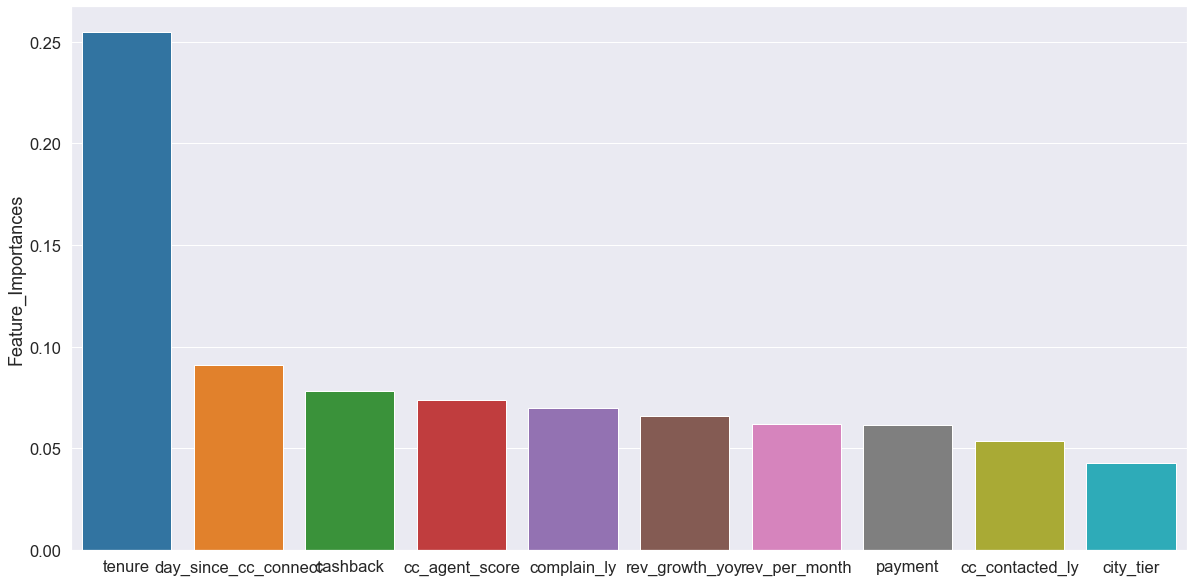

In [183]:
plt.figure(figsize=(20,10))
sns.barplot(fi_dtmf.index,fi_rfm.Feature_Importances);

### Random Forest Model

In [184]:
fi_rfmf=pd.DataFrame(rfmf.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).round(4).head(10)
fi_rfmf

Feature_Importances
tenure                             0.2895
cashback                           0.0793
day_since_cc_connect               0.0773
cc_contacted_ly                    0.0736
rev_growth_yoy                     0.0649
complain_ly                        0.0647
cc_agent_score                     0.0641
rev_per_month                      0.0598
payment                            0.0522
account_segment                    0.0390

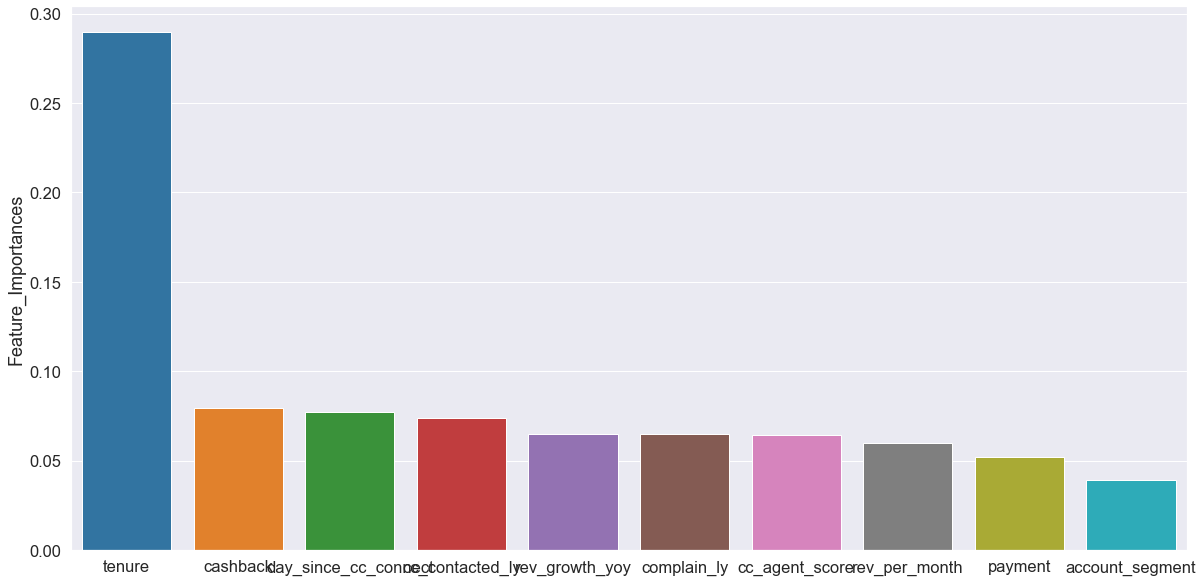

In [185]:
plt.figure(figsize=(20,10))
sns.barplot(fi_rfmf.index,fi_rfmf.Feature_Importances);

### Logistic Regression Model

In [186]:
fi_lgrmf=pd.DataFrame(lgrmf.coef_.T,index=xtrain_scaled.columns, 
columns=['Coefficients']).rename_axis(index='Predictor').sort_values(by='Coefficients',ascending=False,
                                                                     key=abs).round(3).head(10)
fi_lgrmf

Coefficients
Predictor                          
complain_ly                   1.665
tenure                       -1.532
payment_Credit_Card          -0.859
payment_UPI                  -0.790
marital_status_Single         0.675
payment_Debit_Card           -0.662
login_device_Mobile          -0.410
rev_per_month                 0.378
day_since_cc_connect         -0.323
account_user_count            0.319

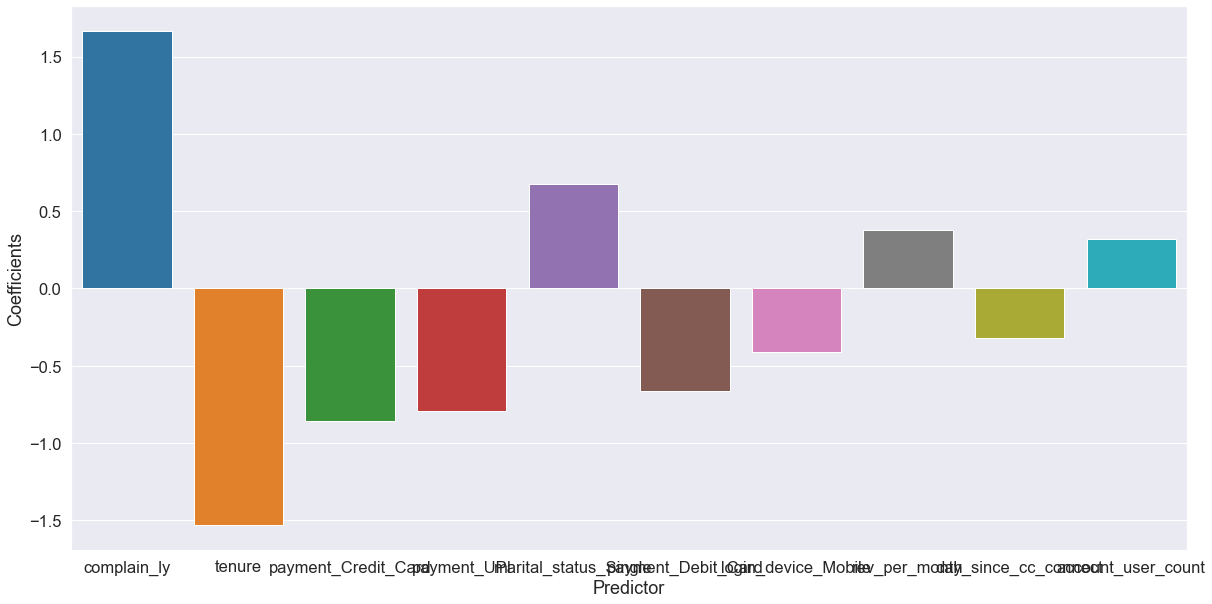

In [187]:
plt.figure(figsize=(20,10))
sns.barplot(fi_lgrmf.index,fi_lgrmf.Coefficients);

### LDA Model

In [188]:
fi_ldamf=pd.DataFrame(ldamf.coef_.T,index=xtrain_scaled.columns, 
columns=['Coefficients']).rename_axis(index='Predictor').sort_values(by='Coefficients',ascending=False,
                                                                     key=abs).round(3).head(10)
fi_ldamf

Coefficients
Predictor                          
complain_ly                   1.942
payment_Credit_Card          -1.136
tenure                       -1.073
payment_UPI                  -1.069
payment_Debit_Card           -0.935
marital_status_Single         0.931
payment_E_wallet             -0.397
login_device_Mobile          -0.380
rev_per_month                 0.337
account_user_count            0.305

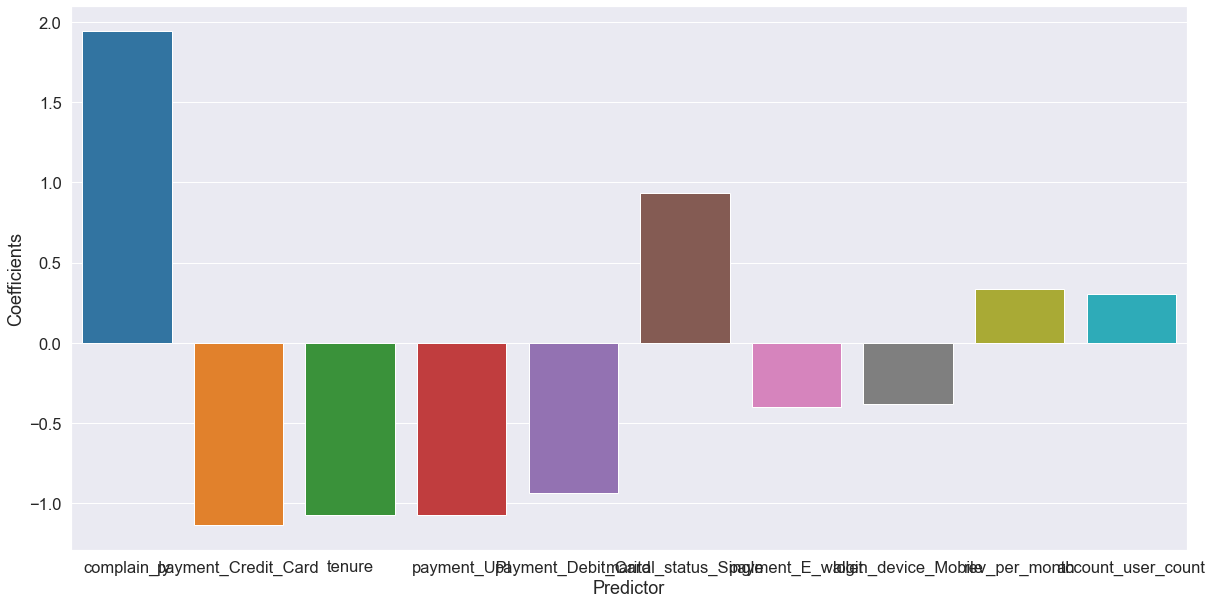

In [189]:
plt.figure(figsize=(20,10))
sns.barplot(fi_ldamf.index,fi_ldamf.Coefficients);

### AdaBoosting Model

In [190]:
fi_abmf = pd.DataFrame(abmf.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,
                                             key=abs).round(3).head(10)
fi_abmf

Feature_Importances
cashback                            0.311
tenure                              0.212
day_since_cc_connect                0.093
cc_contacted_ly                     0.073
account_segment                     0.060
rev_growth_yoy                      0.060
rev_per_month                       0.053
payment                             0.040
cc_agent_score                      0.020
marital_status                      0.020

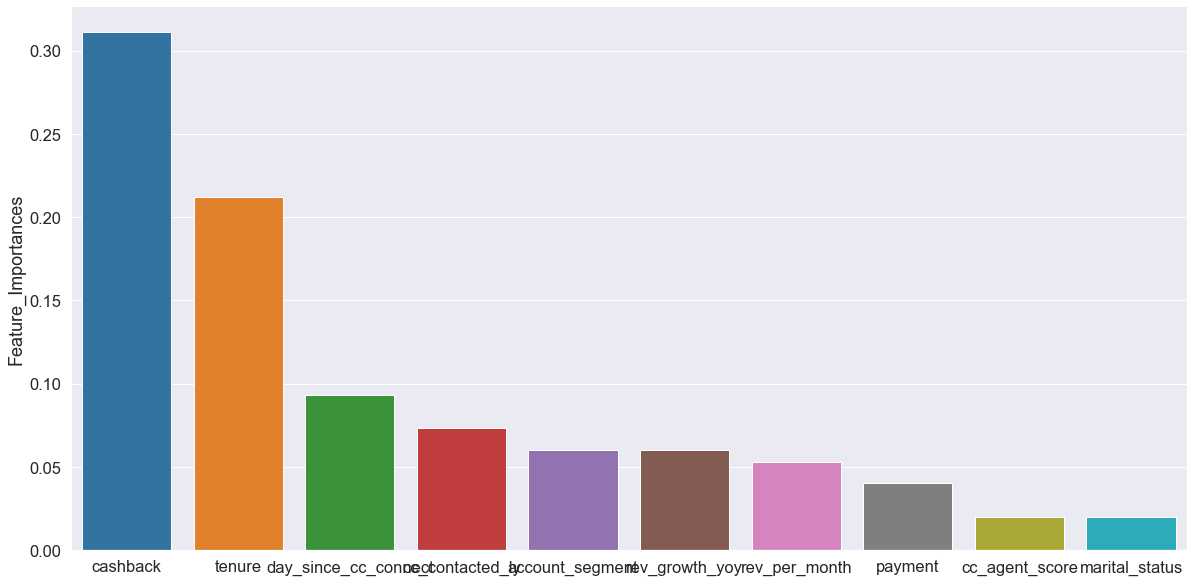

In [191]:
plt.figure(figsize=(20,10))
sns.barplot(fi_abmf.index,fi_abmf.Feature_Importances);

### Gradient Boosting Model

In [192]:
fi_gbmf=pd.DataFrame(gbmf.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,
                                             key=abs).round(3).head(10)
fi_gbm

Feature_Importances
tenure                              0.528
complain_ly                         0.134
day_since_cc_connect                0.067
rev_per_month                       0.045
cc_agent_score                      0.040
account_segment                     0.036
marital_status                      0.036
payment                             0.025
cc_contacted_ly                     0.020
cashback                            0.019

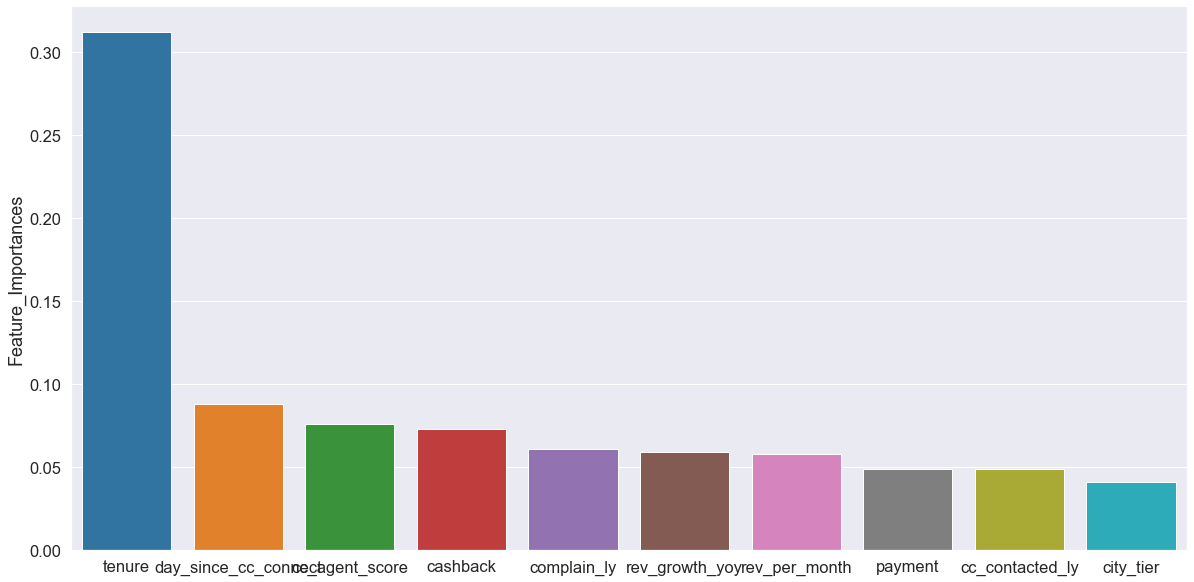

In [193]:
plt.figure(figsize=(20,10))
sns.barplot(fi_gbmf.index,fi_gbmf.Feature_Importances);

### Extreme Gradient Boosting Model

In [194]:
fi_xgbmf=pd.DataFrame(xgbmf.feature_importances_,index=xtrain_tree.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,
                                             key=abs).round(3).head(10)
fi_xgbmf

Feature_Importances
tenure                              0.204
complain_ly                         0.176
city_tier                           0.065
account_segment                     0.064
marital_status                      0.061
day_since_cc_connect                0.057
login_device                        0.055
cc_agent_score                      0.054
payment                             0.051
rev_per_month                       0.048

In [195]:
fi_xgbmf.to_excel('fi_xgbmf.xlsx')

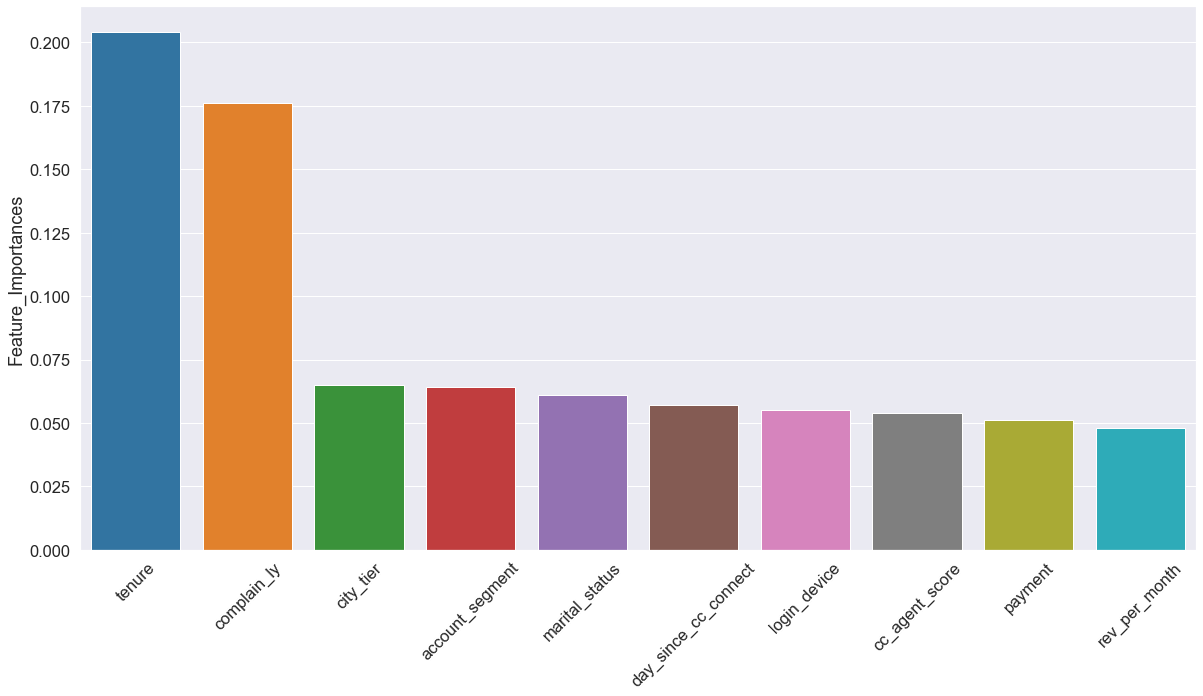

In [196]:
plt.figure(figsize=(20,10));
sns.barplot(fi_xgbmf.index,fi_xgbmf.Feature_Importances);
plt.xticks(rotation=45);

# Q5. Model validation

## How was the model validated? Just accuracy, or anything else too?

In [197]:
Performance_Metrics_After_Tuning.sort_values(['F1score_Test','Recall_Test','Precision_Test'],
                                             ascending=[False,False,False])

Accuracy_Train  Accuracy_Test  AUC_Train  AUC_Test  \
Gradient Boosting                    1.00           0.98       1.00      0.99   
ANN                                  1.00           0.97       1.00      0.99   
Extreme Gradient Boosting            1.00           0.97       1.00      0.99   
Random Forest                        1.00           0.97       1.00      0.99   
Bagging                              1.00           0.97       1.00      0.98   
KNN                                  0.98           0.96       1.00      0.98   
Decision Tree                        0.99           0.95       1.00      0.91   
AdaBoosting                          0.90           0.90       0.92      0.91   
Naive Bayes                          0.87           0.86       0.82      0.81   
Logistic Regression                  0.88           0.88       0.87      0.86   
LDA                                  0.88           0.88       0.86      0.85   

                           Precision_Train  Precision_Test  Recall_Train  \
Gradient Boosting                     1.00            0.98          1.00   
ANN                                   1.00            0.93          1.00   
Extreme Gradient Boosting             1.00            0.96          1.00   
Random Forest                         1.00            0.97          1.00   
Bagging                               1.00            0.94          1.00   
KNN                                   0.97            0.93          0.91   
Decision Tree                         0.99            0.85          0.97   
AdaBoosting                           0.76            0.75          0.59   
Naive Bayes                           0.61            0.59          0.55   
Logistic Regression                   0.74            0.74          0.45   
LDA                                   0.73            0.73          0.42   

                           Recall_Test  F1score_Train  F1score_Test  
Gradient Boosting                 0.90           1.00          0.94  
ANN                               0.91           1.00          0.92  
Extreme Gradient Boosting         0.88           1.00          0.91  
Random Forest                     0.85           1.00          0.91  
Bagging                           0.86           1.00          0.90  
KNN                               0.83           0.94          0.88  
Decision Tree                     0.82           0.98          0.83  
AdaBoosting                       0.58           0.66          0.66  
Naive Bayes                       0.53           0.58          0.56  
Logistic Regression               0.45           0.56          0.56  
LDA                               0.44           0.54          0.55

In [198]:
Performance_Metrics_After_Tuning.to_excel('Performance_Metrics_After_Tuning.xlsx')

In [199]:
pmbt = Performance_Metrics_Before_Tuning.iloc[:,[1,3,5,7,9]]
pmbt

Accuracy_Test  AUC_Test  Precision_Test  \
Decision Tree                       0.95      0.90            0.86   
Random Forest                       0.97      0.99            0.98   
ANN                                 0.95      0.97            0.88   
Logistic Regression                 0.88      0.86            0.74   
LDA                                 0.88      0.85            0.73   
Naive Bayes                         0.86      0.81            0.59   
KNN                                 0.96      0.98            0.93   
Bagging                             0.96      0.98            0.94   
AdaBoosting                         0.90      0.91            0.76   
Gradient Boosting                   0.91      0.93            0.83   
Extreme Gradient Boosting           0.97      0.99            0.94   

                           Recall_Test  F1score_Test  
Decision Tree                     0.84          0.85  
Random Forest                     0.84          0.90  
ANN                               0.79          0.84  
Logistic Regression               0.45          0.56  
LDA                               0.44          0.55  
Naive Bayes                       0.53          0.56  
KNN                               0.83          0.88  
Bagging                           0.80          0.87  
AdaBoosting                       0.56          0.65  
Gradient Boosting                 0.61          0.70  
Extreme Gradient Boosting         0.85          0.89

In [200]:
pmat=Performance_Metrics_After_Tuning.iloc[:,[1,3,5,7,9]]
pmat

Accuracy_Test  AUC_Test  Precision_Test  \
Decision Tree                       0.95      0.91            0.85   
Random Forest                       0.97      0.99            0.97   
ANN                                 0.97      0.99            0.93   
Logistic Regression                 0.88      0.86            0.74   
LDA                                 0.88      0.85            0.73   
Naive Bayes                         0.86      0.81            0.59   
KNN                                 0.96      0.98            0.93   
Bagging                             0.97      0.98            0.94   
AdaBoosting                         0.90      0.91            0.75   
Gradient Boosting                   0.98      0.99            0.98   
Extreme Gradient Boosting           0.97      0.99            0.96   

                           Recall_Test  F1score_Test  
Decision Tree                     0.82          0.83  
Random Forest                     0.85          0.91  
ANN                               0.91          0.92  
Logistic Regression               0.45          0.56  
LDA                               0.44          0.55  
Naive Bayes                       0.53          0.56  
KNN                               0.83          0.88  
Bagging                           0.86          0.90  
AdaBoosting                       0.58          0.66  
Gradient Boosting                 0.90          0.94  
Extreme Gradient Boosting         0.88          0.91

In [201]:
pmat.sort_values(['F1score_Test','Recall_Test','Precision_Test'],
                                             ascending=[False,False,False])

Accuracy_Test  AUC_Test  Precision_Test  \
Gradient Boosting                   0.98      0.99            0.98   
ANN                                 0.97      0.99            0.93   
Extreme Gradient Boosting           0.97      0.99            0.96   
Random Forest                       0.97      0.99            0.97   
Bagging                             0.97      0.98            0.94   
KNN                                 0.96      0.98            0.93   
Decision Tree                       0.95      0.91            0.85   
AdaBoosting                         0.90      0.91            0.75   
Naive Bayes                         0.86      0.81            0.59   
Logistic Regression                 0.88      0.86            0.74   
LDA                                 0.88      0.85            0.73   

                           Recall_Test  F1score_Test  
Gradient Boosting                 0.90          0.94  
ANN                               0.91          0.92  
Extreme Gradient Boosting         0.88          0.91  
Random Forest                     0.85          0.91  
Bagging                           0.86          0.90  
KNN                               0.83          0.88  
Decision Tree                     0.82          0.83  
AdaBoosting                       0.58          0.66  
Naive Bayes                       0.53          0.56  
Logistic Regression               0.45          0.56  
LDA                               0.44          0.55

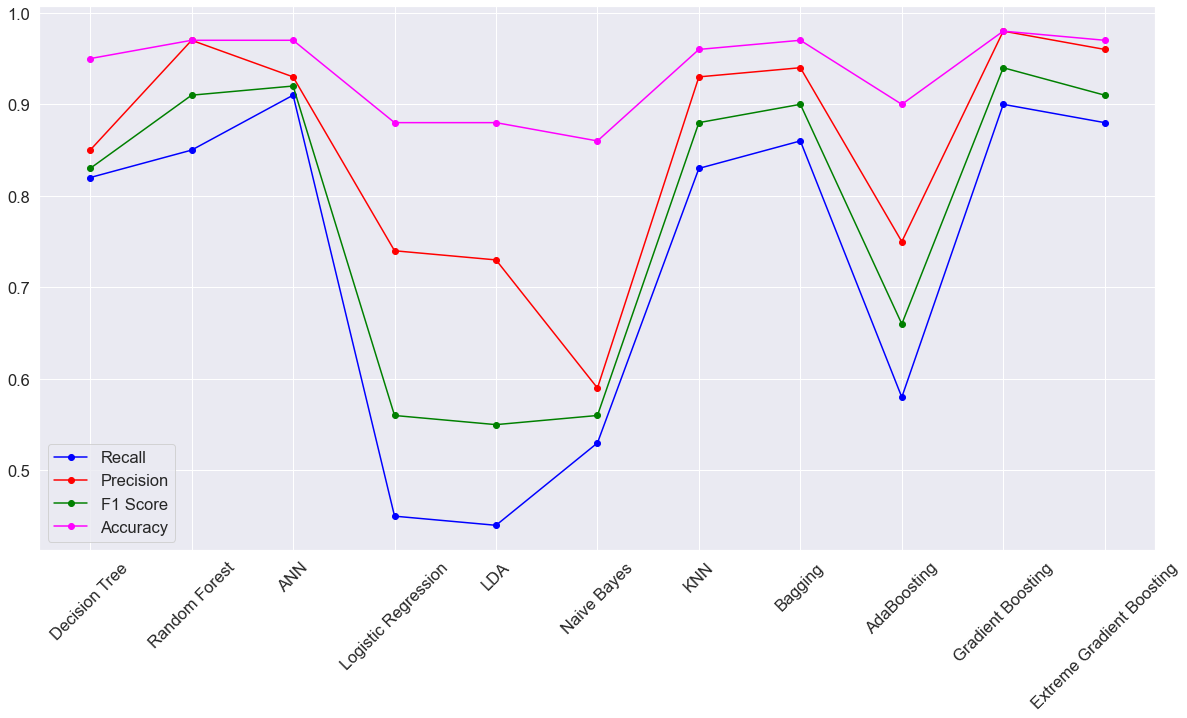

In [202]:
plt.figure(figsize=(20,10));
plt.plot(pmat.index,pmat.Recall_Test,color='blue',marker='o',label="Recall");
plt.plot(pmat.index,pmat.Precision_Test,color='red',marker='o',label="Precision");
plt.plot(pmat.index,pmat.F1score_Test,color='green',marker='o',label="F1 Score");
plt.plot(pmat.index,pmat.Accuracy_Test,color='magenta',marker='o',label="Accuracy");
plt.xticks(rotation=45);
plt.legend(loc='best');
plt.show();

## Changing Threshold

Model: DecisionTreeClassifier(max_depth=14, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6540           16
Actual 1           31         1295

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  1.00    1.00      1.00  6556.00
1                  0.99    0.98      0.98  1326.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.99    0.99      0.99  7882.00
weighted avg       0.99    0.99      0.99  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2724           84
Actual 1          102          468

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.96    0.97      0.97  2808.00
1                  0.85    0.82      0.83   570.00
accuracy           0.94    0.94      0.94     0.94
macro avg          0.91    0.90      0.90  3378.00
weighted avg       0.94    0.94      0.94  3378.00

*****************************************************************************************************
Model: RandomForestClassifier(max_depth=16, max_features=9, n_estimators=201,
                       random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2765           43
Actual 1           55          515

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.98    0.98      0.98  2808.00
1                  0.92    0.90      0.91   570.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.95    0.94      0.95  3378.00
weighted avg       0.97    0.97      0.97  3378.00

*****************************************************************************************************
Model: MLPClassifier(hidden_layer_sizes=350, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6548            8
Actual 1            3         1323

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  1.00     1.0       1.0   6556.0
1                  0.99     1.0       1.0   1326.0
accuracy           1.00     1.0       1.0      1.0
macro avg          1.00     1.0       1.0   7882.0
weighted avg       1.00     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2760           48
Actual 1           47          523

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.98    0.98      0.98  2808.00
1                  0.92    0.92      0.92   570.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.95    0.95      0.95  3378.00
weighted avg       0.97    0.97      0.97  3378.00

*******************************************************************************************************
Model: LogisticRegression(max_iter=10000, random_state=1, solver='newton-cg') 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6184          372
Actual 1          568          758

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.92    0.94      0.93  6556.00
1                  0.67    0.57      0.62  1326.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.79    0.76      0.77  7882.00
weighted avg       0.87    0.88      0.88  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2646          162
Actual 1          258          312

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.91    0.94      0.93  2808.00
1                  0.66    0.55      0.60   570.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.78    0.74      0.76  3378.00
weighted avg       0.87    0.88      0.87  3378.00

*******************************************************************************************************
Model: LinearDiscriminantAnalysis() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6183          373
Actual 1          619          707

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.91    0.94      0.93  6556.00
1                  0.65    0.53      0.59  1326.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.78    0.74      0.76  7882.00
weighted avg       0.87    0.87      0.87  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2635          173
Actual 1          275          295

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.91    0.94      0.92  2808.00
1                  0.63    0.52      0.57   570.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.77    0.73      0.75  3378.00
weighted avg       0.86    0.87      0.86  3378.00

*******************************************************************************************************
Model: GaussianNB() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         5785          771
Actual 1          461          865

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.93    0.88      0.90  6556.00
1                  0.53    0.65      0.58  1326.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.73    0.77      0.74  7882.00
weighted avg       0.86    0.84      0.85  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2464          344
Actual 1          214          356

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.92    0.88      0.90  2808.00
1                  0.51    0.62      0.56   570.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.71    0.75      0.73  3378.00
weighted avg       0.85    0.83      0.84  3378.00

*****************************************************************************************************
Model: KNeighborsClassifier() 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6515           41
Actual 1          119         1207

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.98    0.99      0.99  6556.00
1                  0.97    0.91      0.94  1326.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.97    0.95      0.96  7882.00
weighted avg       0.98    0.98      0.98  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2772           36
Actual 1           97          473

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.97    0.99      0.98  2808.00
1                  0.93    0.83      0.88   570.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.95    0.91      0.93  3378.00
weighted avg       0.96    0.96      0.96  3378.00

*******************************************************************************************************
Model: BaggingClassifier(n_estimators=25, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6553            3
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2749           59
Actual 1           62          508

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.98    0.98      0.98  2808.00
1                  0.90    0.89      0.89   570.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.94    0.94      0.94  3378.00
weighted avg       0.96    0.96      0.96  3378.00

*****************************************************************************************************
Model: AdaBoostClassifier(n_estimators=151, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0            0         6556
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                  0.00    0.00      0.00  6556.00
1                  0.17    1.00      0.29  1326.00
accuracy           0.17    0.17      0.17     0.17
macro avg          0.08    0.50      0.14  7882.00
weighted avg       0.03    0.17      0.05  7882.00

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0            0         2808
Actual 1            0          570

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.00    0.00      0.00  2808.00
1                  0.17    1.00      0.29   570.00
accuracy           0.17    0.17      0.17     0.17
macro avg          0.08    0.50      0.14  3378.00
weighted avg       0.03    0.17      0.05  3378.00

*****************************************************************************************************
Model: GradientBoostingClassifier(max_depth=10, n_estimators=351, random_state=1) 

Confusion matrix of Train Dataset


Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2793           15
Actual 1           55          515

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.98    0.99      0.99  2808.00
1                  0.97    0.90      0.94   570.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.98    0.95      0.96  3378.00
weighted avg       0.98    0.98      0.98  3378.00

*****************************************************************************************************
[22:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=201, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tre

Predicted 0  Predicted 1
Actual 0         6556            0
Actual 1            0         1326

 
Classification Report of Train Dataset


precision  recall  f1-score  support
0                   1.0     1.0       1.0   6556.0
1                   1.0     1.0       1.0   1326.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   7882.0
weighted avg        1.0     1.0       1.0   7882.0

 
Confusion matrix of Test Dataset


Predicted 0  Predicted 1
Actual 0         2791           17
Actual 1           48          522

 
Classification Report of Test Dataset


precision  recall  f1-score  support
0                  0.98    0.99      0.99  2808.00
1                  0.97    0.92      0.94   570.00
accuracy           0.98    0.98      0.98     0.98
macro avg          0.98    0.95      0.96  3378.00
weighted avg       0.98    0.98      0.98  3378.00

*******************************************************************************************************


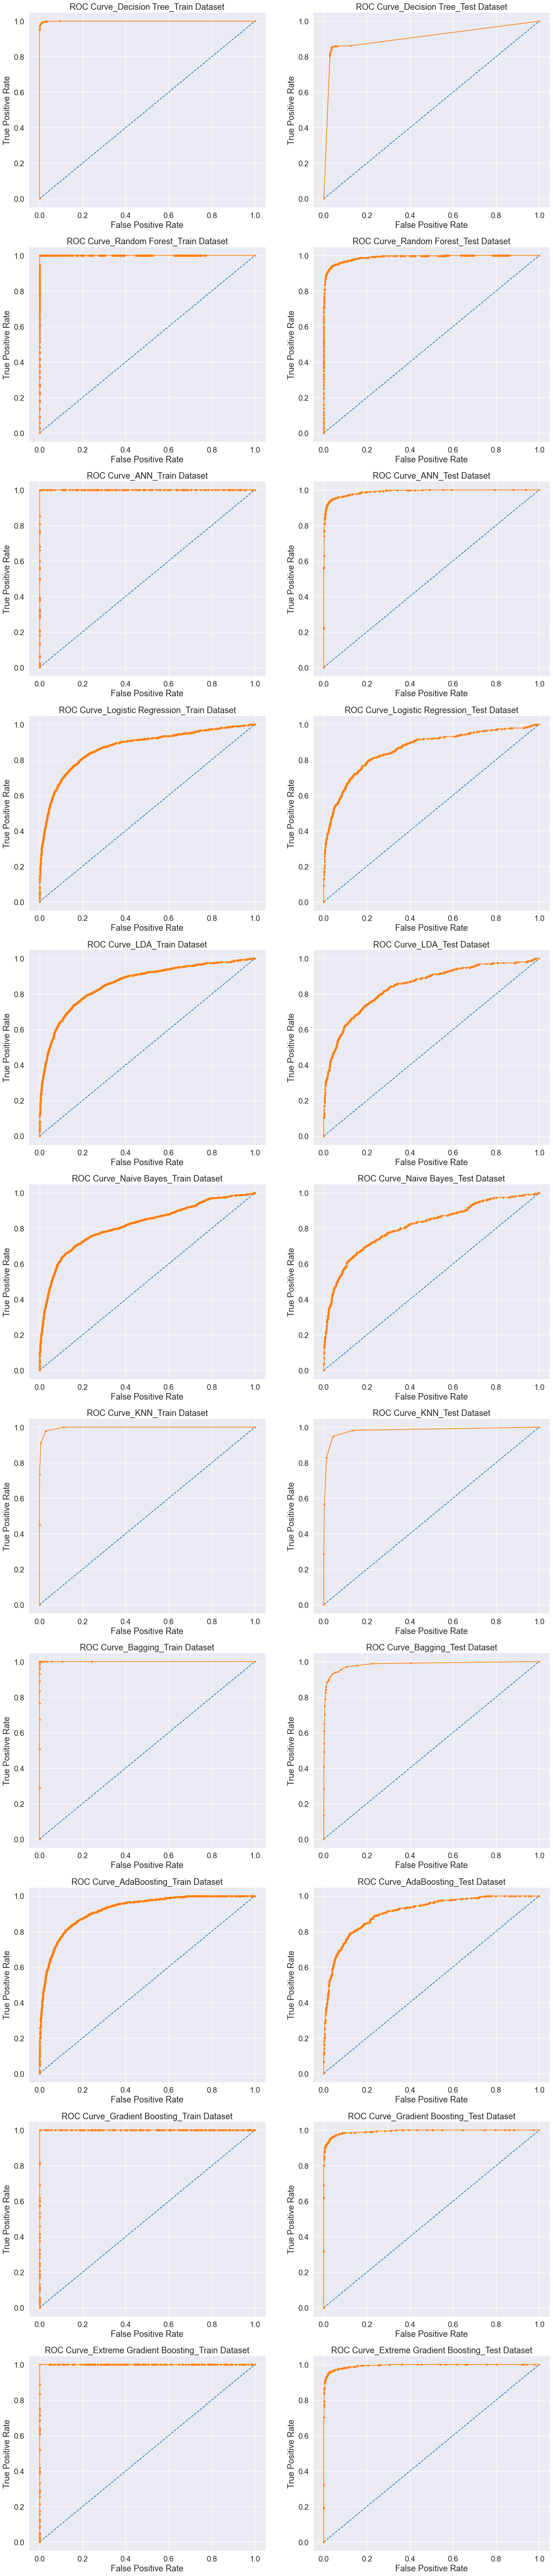

In [203]:
dtmf = gscv_dtm.best_estimator_
rfmf = gscv_rfm.best_estimator_
annmf = gscv_annm.best_estimator_
lgrmf = gscv_lgrm.best_estimator_
ldamf = gscv_ldam.best_estimator_
nbm = GaussianNB()
knnm = KNeighborsClassifier()
bgmf = gscv_bgm.best_estimator_
abmf = gscv_abm.best_estimator_
gbmf = gscv_gbm.best_estimator_
xgbmf = gscv_xgbm.best_estimator_

models = [dtmf, rfmf, annmf, lgrmf, ldamf, nbm, knnm, bgmf, abmf, gbmf, xgbmf]

titles = ['ROC Curve_Decision Tree_Train Dataset', 'ROC Curve_Decision Tree_Test Dataset', 
        'ROC Curve_Random Forest_Train Dataset','ROC Curve_Random Forest_Test Dataset',
        'ROC Curve_ANN_Train Dataset', 'ROC Curve_ANN_Test Dataset', 
        'ROC Curve_Logistic Regression_Train Dataset', 'ROC Curve_Logistic Regression_Test Dataset',
        'ROC Curve_LDA_Train Dataset', 'ROC Curve_LDA_Test Dataset',
        'ROC Curve_Naive Bayes_Train Dataset','ROC Curve_Naive Bayes_Test Dataset',
        'ROC Curve_KNN_Train Dataset','ROC Curve_KNN_Test Dataset',
        'ROC Curve_Bagging_Train Dataset', 'ROC Curve_Bagging_Test Dataset', 
        'ROC Curve_AdaBoosting_Train Dataset','ROC Curve_AdaBoosting_Test Dataset',
        'ROC Curve_Gradient Boosting_Train Dataset','ROC Curve_Gradient Boosting_Test Dataset',
       'ROC Curve_Extreme Gradient Boosting_Train Dataset','ROC Curve_Extreme Gradient Boosting_Test Dataset']

accuracy_train = []
auc_train = []
precision_train = []
recall_train = []
f1score_train = []

accuracy_test = []
auc_test = []
precision_test = []
recall_test = []
f1score_test = []

def performance_metrics_train(xtrue, ytrue, y_pred, y_prob1):
    accuracy_train.append(i.score(xtrue, ytrue))
    auc_train.append(roc_auc_score(ytrue,y_prob1))
    a = pd.DataFrame(classification_report(ytrue,y_pred,output_dict = True)).T
    precision_train.append(a.iloc[1,0])
    recall_train.append(a.iloc[1,1])
    f1score_train.append(a.iloc[1,2])

def performance_metrics_test(xtrue, ytrue, y_pred, y_prob1):
    accuracy_test.append(i.score(xtrue, ytrue))
    auc_test.append(roc_auc_score(ytrue,y_prob1))
    a = pd.DataFrame(classification_report(ytrue,y_pred,output_dict = True)).T
    precision_test.append(a.iloc[1,0])
    recall_test.append(a.iloc[1,1])
    f1score_test.append(a.iloc[1,2])

def ROC(true,prob,m):    
    fpr_train,tpr_train,thr_train = roc_curve(true,prob)
    plt.title(titles[m])
    plt.plot([0, 1], [0, 1], linestyle = '--');
    plt.plot(fpr_train,tpr_train,marker = '.');
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize = (20,100))
j = 1
for i in models:
    if i in [dtmf,nbm,bgmf,rfmf,abmf,gbmf,xgbm]:
        i.fit(xtrain_tree,ytrain)
        
        # Predictions_train
        ytrain_pred = i.predict(xtrain_tree)
        ytrain_prob1 = i.predict_proba(xtrain_tree)[:,1]
        ytrain_pred = np.where(ytrain_prob1>0.4,1,0)
        
        # Performance metrics_train
        performance_metrics_train(xtrain_tree, ytrain, ytrain_pred, ytrain_prob1)

        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index = ['Actual 0','Actual 1'],
                           columns = ['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(classification_report(ytrain,ytrain_pred,output_dict = True)).round(2).T)
        print(" ")
        
        # ROC-AUC curve_train
        plt.subplot(11,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        
        # Predictions_test
        ytest_pred = i.predict(xtest_tree)
        ytest_prob1 = i.predict_proba(xtest_tree)[:,1]
        ytest_pred = np.where(ytest_prob1>0.4,1,0)
        
        # Performance metrics_test
        performance_metrics_test(xtest_tree, ytest, ytest_pred, ytest_prob1)
        
        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index = ['Actual 0','Actual 1'],
                           columns = ['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(classification_report(ytest,ytest_pred,output_dict = True)).round(2).T)
        print('*****************************************************************************************************')
        
        # ROC-AUC curve_test
        k = j+1
        plt.subplot(11,2,k)
        ROC(ytest,ytest_prob1,(k-1))
      
        j = k+1

    else:
        i.fit(xtrain_scaled,ytrain)
        
        # Predictions_train
        ytrain_pred = i.predict(xtrain_scaled)
        ytrain_prob1 = i.predict_proba(xtrain_scaled)[:,1]
        ytrain_pred = np.where(ytrain_prob1>0.4,1,0)
        
        # Performance metrics_train
        performance_metrics_train(xtrain_scaled, ytrain, ytrain_pred, ytrain_prob1)        
        
        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index = ['Actual 0','Actual 1'],
                           columns = ['Predicted 0','Predicted 1']))
        print(" ")
        
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(classification_report(ytrain,ytrain_pred,output_dict = True)).round(2).T)
        print(" ")
        
        # ROC-AUC curve_train
        plt.subplot(11,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        
        # Predictions_test
        ytest_pred = i.predict(xtest_scaled)
        ytest_prob1 = i.predict_proba(xtest_scaled)[:,1]
        ytest_pred = np.where(ytest_prob1>0.4,1,0)
        
        # Performance metrics_test
        performance_metrics_test(xtest_scaled, ytest, ytest_pred, ytest_prob1)

        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index = ['Actual 0','Actual 1'],
                           columns = ['Predicted 0','Predicted 1']))
        print(" ")
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs = ['bold']))
        display(pd.DataFrame(classification_report(ytest,ytest_pred,output_dict = True)).round(2).T)
        print('*******************************************************************************************************')
        
        # ROC-AUC curve_test
        k = j+1
        plt.subplot(11,2,k)
        ROC(ytest,ytest_prob1,(k-1))
        j = k+1

Performance_Metrics_After_Tuning_thresh = pd.DataFrame(
    {'Accuracy_Train':accuracy_train,
     'Accuracy_Test':accuracy_test,
    'AUC_Train': auc_train,
     'AUC_Test': auc_test,
    'Precision_Train': precision_train,
     'Precision_Test': precision_test,
    'Recall_Train': recall_train,
     'Recall_Test': recall_test,
    'F1score_Train': f1score_train,
     'F1score_Test': f1score_test},
               
    index = ['Decision Tree','Random Forest','ANN','Logistic Regression', 'LDA','Naive Bayes','KNN',
            'Bagging','AdaBoosting','Gradient Boosting','Extreme Gradient Boosting']).round(2)

In [204]:
pmat

Accuracy_Test  AUC_Test  Precision_Test  \
Decision Tree                       0.95      0.91            0.85   
Random Forest                       0.97      0.99            0.97   
ANN                                 0.97      0.99            0.93   
Logistic Regression                 0.88      0.86            0.74   
LDA                                 0.88      0.85            0.73   
Naive Bayes                         0.86      0.81            0.59   
KNN                                 0.96      0.98            0.93   
Bagging                             0.97      0.98            0.94   
AdaBoosting                         0.90      0.91            0.75   
Gradient Boosting                   0.98      0.99            0.98   
Extreme Gradient Boosting           0.97      0.99            0.96   

                           Recall_Test  F1score_Test  
Decision Tree                     0.82          0.83  
Random Forest                     0.85          0.91  
ANN                               0.91          0.92  
Logistic Regression               0.45          0.56  
LDA                               0.44          0.55  
Naive Bayes                       0.53          0.56  
KNN                               0.83          0.88  
Bagging                           0.86          0.90  
AdaBoosting                       0.58          0.66  
Gradient Boosting                 0.90          0.94  
Extreme Gradient Boosting         0.88          0.91

In [205]:
pmat_thresh = Performance_Metrics_After_Tuning_thresh.iloc[:,[1,3,5,7,9]]
pmat_thresh

Accuracy_Test  AUC_Test  Precision_Test  \
Decision Tree                       0.95      0.91            0.85   
Random Forest                       0.97      0.99            0.92   
ANN                                 0.97      0.99            0.92   
Logistic Regression                 0.88      0.86            0.66   
LDA                                 0.88      0.85            0.63   
Naive Bayes                         0.86      0.81            0.51   
KNN                                 0.96      0.98            0.93   
Bagging                             0.97      0.98            0.90   
AdaBoosting                         0.90      0.91            0.17   
Gradient Boosting                   0.98      0.99            0.97   
Extreme Gradient Boosting           0.98      0.99            0.97   

                           Recall_Test  F1score_Test  
Decision Tree                     0.82          0.83  
Random Forest                     0.90          0.91  
ANN                               0.92          0.92  
Logistic Regression               0.55          0.60  
LDA                               0.52          0.57  
Naive Bayes                       0.62          0.56  
KNN                               0.83          0.88  
Bagging                           0.89          0.89  
AdaBoosting                       1.00          0.29  
Gradient Boosting                 0.90          0.94  
Extreme Gradient Boosting         0.92          0.94

In [206]:
pmat_thresh.to_excel('pmat_thresh.xlsx')

In [207]:
pmat_thresh.sort_values(['F1score_Test','Recall_Test','Precision_Test'],
                                             ascending=[False,False,False])

Accuracy_Test  AUC_Test  Precision_Test  \
Extreme Gradient Boosting           0.98      0.99            0.97   
Gradient Boosting                   0.98      0.99            0.97   
ANN                                 0.97      0.99            0.92   
Random Forest                       0.97      0.99            0.92   
Bagging                             0.97      0.98            0.90   
KNN                                 0.96      0.98            0.93   
Decision Tree                       0.95      0.91            0.85   
Logistic Regression                 0.88      0.86            0.66   
LDA                                 0.88      0.85            0.63   
Naive Bayes                         0.86      0.81            0.51   
AdaBoosting                         0.90      0.91            0.17   

                           Recall_Test  F1score_Test  
Extreme Gradient Boosting         0.92          0.94  
Gradient Boosting                 0.90          0.94  
ANN                               0.92          0.92  
Random Forest                     0.90          0.91  
Bagging                           0.89          0.89  
KNN                               0.83          0.88  
Decision Tree                     0.82          0.83  
Logistic Regression               0.55          0.60  
LDA                               0.52          0.57  
Naive Bayes                       0.62          0.56  
AdaBoosting                       1.00          0.29

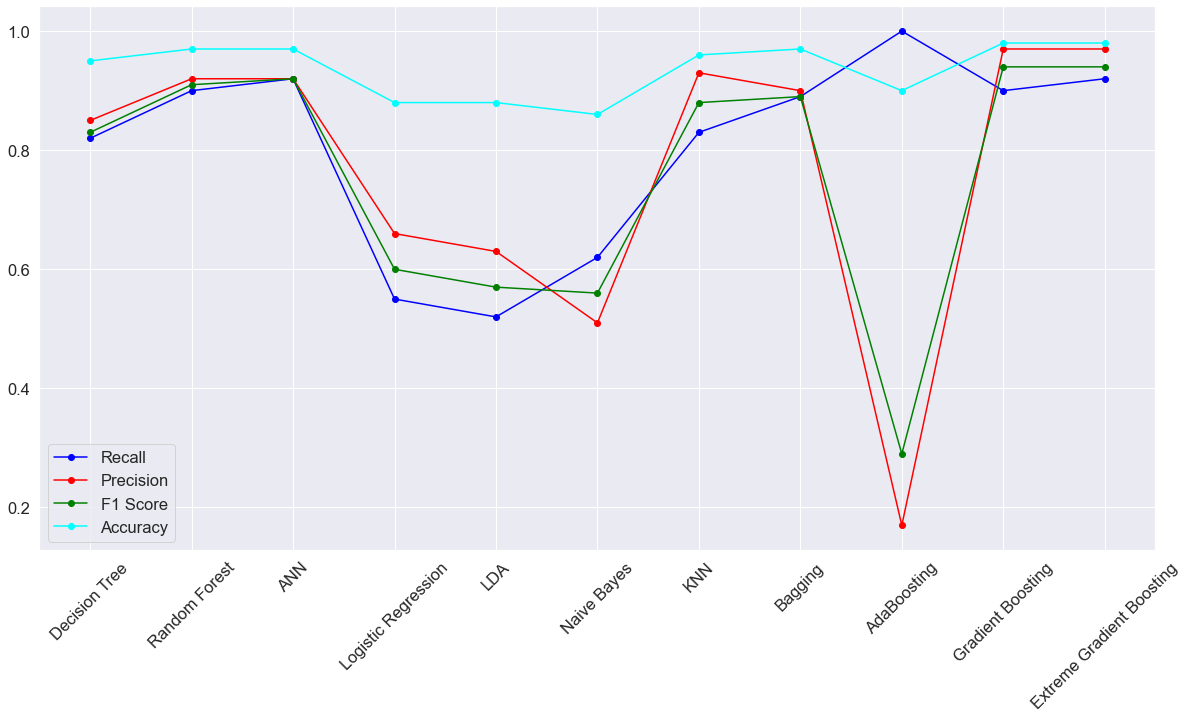

In [208]:
plt.figure(figsize=(20,10));
plt.plot(pmat_thresh.index,pmat_thresh.Recall_Test,color='blue',marker='o',label="Recall");
plt.plot(pmat_thresh.index,pmat_thresh.Precision_Test,color='red',marker='o',label="Precision");
plt.plot(pmat_thresh.index,pmat_thresh.F1score_Test,color='green',marker='o',label="F1 Score");
plt.plot(pmat_thresh.index,pmat_thresh.Accuracy_Test,color='cyan',marker='o',label="Accuracy");
plt.xticks(rotation=45);
plt.legend(loc='best');
plt.show();

# Q6. Final interpretation / recommendation